# BUILT Models

## Analisi esplorativa

In [1]:
# ===================================================================
# GRUPPO 1: LIBRERIE STANDARD E DI SISTEMA
# ===================================================================
import os

# ===================================================================
# GRUPPO 2: LIBRERIE DI DATA SCIENCE E PLOTTING
# ===================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===================================================================
# GRUPPO 3: LIBRERIE GEOSPAZIALI
# ===================================================================
import geopandas as gpd
from shapely.geometry import Point

# ===================================================================
# GRUPPO 4: LIBRERIE DI MACHINE LEARNING (SCIKIT-LEARN)
# ===================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    r2_score, 
    mean_squared_error,
    confusion_matrix # Importata qui per un uso generale se necessario
)
from sklearn.ensemble import RandomForestRegressor
# ===================================================================
# GRUPPO 5: LIBRERIE DI DEEP LEARNING (PYTORCH)
# ===================================================================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# ===================================================================
# GRUPPO 6: IMPORT DEGLI SCRIPT PERSONALIZZATI (.py)
# ===================================================================

# --- Script di utility e preprocessing ---
import nuovo_preprocessing
import analisi_funzioni

# --- Modelli Scikit-Learn Base ---
from models import (
    create_preprocessor,
    train_regression_model,
    train_classification_model
    # Le funzioni save/load model sono in entrambi i file, le importiamo da tuned
)

# --- Modelli Scikit-Learn con Tuning ---
from models_tuned import (
    train_tuned_regression_model,
    train_tuned_classification_model
)

# --- Modelli PyTorch Base ---
from pytorch_models import (
    TabularDataset,
    RegressionNN,
    ClassificationNN,
    train_model, # Funzione di addestramento generica per PyTorch
    evaluate_regression,
    evaluate_classification
)

# --- Modelli PyTorch Potenziati (Enhanced) ---
from pytorch_models_enhanced import (
    RegressionNN_v2,
    ClassificationNN_v2
)
# Nota: le funzioni di utility (TabularDataset, train_model, etc.) sono le stesse
# del file base, quindi non è necessario re-importarle da qui.

# --- Modelli Geospaziali ---
import geospatial_models as gm

print("Tutte le librerie e i moduli personalizzati sono stati importati con successo.")


Tutte le librerie e i moduli personalizzati sono stati importati con successo.


In [2]:
# Impostazioni di visualizzazione
pd.set_option('display.max_columns', 100)
plt.style.use('seaborn-v0_8-whitegrid')

### Caricamento dati

In [3]:
# Definisci il percorso alla cartella principale
cartella_dati = "C:/Users/emmal/Desktop/STAGE/PROGETTO/DatiOMI/VERONA_prov"

# Definisci la colonna di join (nome della zona)
colonna_join_geo = 'zona'

# Esegui la funzione per caricare i dati separatamente
df_tabulare, gdf_geospaziale = nuovo_preprocessing.carica_dati_separati(
    cartella_dati=cartella_dati,
    zona_col_name=colonna_join_geo
)

# --- PRIMA ISPEZIONE DEI DATI ---
print("\n--- Informazioni sul DataFrame Tabulare ---")
print(f"Shape: {df_tabulare.shape}")
print(df_tabulare.head())

if gdf_geospaziale is not None and not gdf_geospaziale.empty:
    print("\n--- Informazioni sul GeoDataFrame Geospaziale ---")
    print(f"Shape: {gdf_geospaziale.shape}")
    print(gdf_geospaziale.head())
    # Controlla che sia effettivamente un GeoDataFrame
    print(f"Tipo di oggetto geospaziale: {type(gdf_geospaziale)}")
else:
    print("\nNessun dato geospaziale è stato caricato.")

--- Inizio scansione della cartella dati: C:/Users/emmal/Desktop/STAGE/PROGETTO/DatiOMI/VERONA_prov ---
Trovati 10 file VALORI, 10 file ZONE, e 686 file KML.
Concatenazione di 686 geometrie KML...
Inizio pulizia dati su DataFrame di shape (11681, 37)...


c:\Users\emmal\Desktop\STAGE\PROGETTO\MatterOfDesign\BuiltModels\nuovo_preprocessing.py:47: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='ignore')
c:\Users\emmal\Desktop\STAGE\PROGETTO\MatterOfDesign\BuiltModels\nuovo_preprocessing.py:47: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='ignore')
c:\Users\emmal\Desktop\STAGE\PROGETTO\MatterOfDesign\BuiltModels\nuovo_preprocessing.py:47: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), 

Pulizia dati completata.
Colonne con valore unico rimosse (escluse quelle protette): ['area_territoriale_val', 'regione_val', 'prov_val', 'sez_val', 'sup_nl_compr', 'area_territoriale_zone', 'regione_zone', 'prov_zone', 'sez_zone']
Inizio pulizia dati su DataFrame di shape (2100, 4)...
Pulizia dati completata.


c:\Users\emmal\Desktop\STAGE\PROGETTO\MatterOfDesign\BuiltModels\nuovo_preprocessing.py:47: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='ignore')
c:\Users\emmal\Desktop\STAGE\PROGETTO\MatterOfDesign\BuiltModels\nuovo_preprocessing.py:47: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='ignore')
c:\Users\emmal\Desktop\STAGE\PROGETTO\MatterOfDesign\BuiltModels\nuovo_preprocessing.py:47: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), 


Preprocessing completato per entrambi i DataFrame.

--- Informazioni sul DataFrame Tabulare ---
Shape: (11681, 28)
   comune_istat_val comune_cat_val comune_amm_val comune_descrizione_val  \
0           5023091           D6AA           L781                 VERONA   
1           5023091           D6AA           L781                 VERONA   
2           5023091           D6AA           L781                 VERONA   
3           5023091           D6AA           L781                 VERONA   
4           5023091           D6AA           L781                 VERONA   

  fascia_val zona_val    linkzona  cod_tip               descr_tipologia  \
0          B       B2  VR00000844       20             Abitazioni civili   
1          B       B2  VR00000844       20             Abitazioni civili   
2          B       B2  VR00000844       21  Abitazioni di tipo economico   
3          B       B2  VR00000844        5                        Negozi   
4          B       B2  VR00000844        6     

### Statistiche Descrittive Iniziali

In [4]:
# --- STATISTICHE DESCRITTIVE ---

# Statistiche per le principali colonne numeriche (incluse quelle nuove geospaziali)
colonne_numeriche_chiave = [
    'compr_min', 'compr_max', 'loc_min', 'loc_max',
    'area_zona_mq', 'perimetro_zona_m', 'distanza_centro_m'
]
# Filtra per le colonne effettivamente presenti
colonne_numeriche_chiave = [col for col in colonne_numeriche_chiave if col in df_tabulare.columns]

print("\nStatistiche descrittive per le colonne numeriche chiave:")
print(df_tabulare[colonne_numeriche_chiave].describe().round(2))

# Conteggio per le principali colonne categoriche
print("\nConteggio per 'descr_tipologia':")
print(df_tabulare['descr_tipologia'].value_counts())

print("\nConteggio per 'stato':")
print(df_tabulare['stato'].value_counts())


Statistiche descrittive per le colonne numeriche chiave:
       compr_min  compr_max
count   11681.00   11681.00
mean      977.46    1370.32
std       518.78     755.31
min       280.00     370.00
25%       660.00     920.00
50%       890.00    1200.00
75%      1150.00    1600.00
max      5000.00    7300.00

Conteggio per 'descr_tipologia':
descr_tipologia
Abitazioni civili               2815
Ville e Villini                 2474
Uffici                          1713
Negozi                          1711
Capannoni tipici                1544
Abitazioni di tipo economico    1122
Box                              110
Magazzini                         81
Laboratori                        71
Capannoni industriali             40
Name: count, dtype: int64

Conteggio per 'stato':
stato
NORMALE     10222
OTTIMO       1439
SCADENTE       20
Name: count, dtype: int64


### Analisi Univariata - Distribuzione Feature Numeriche

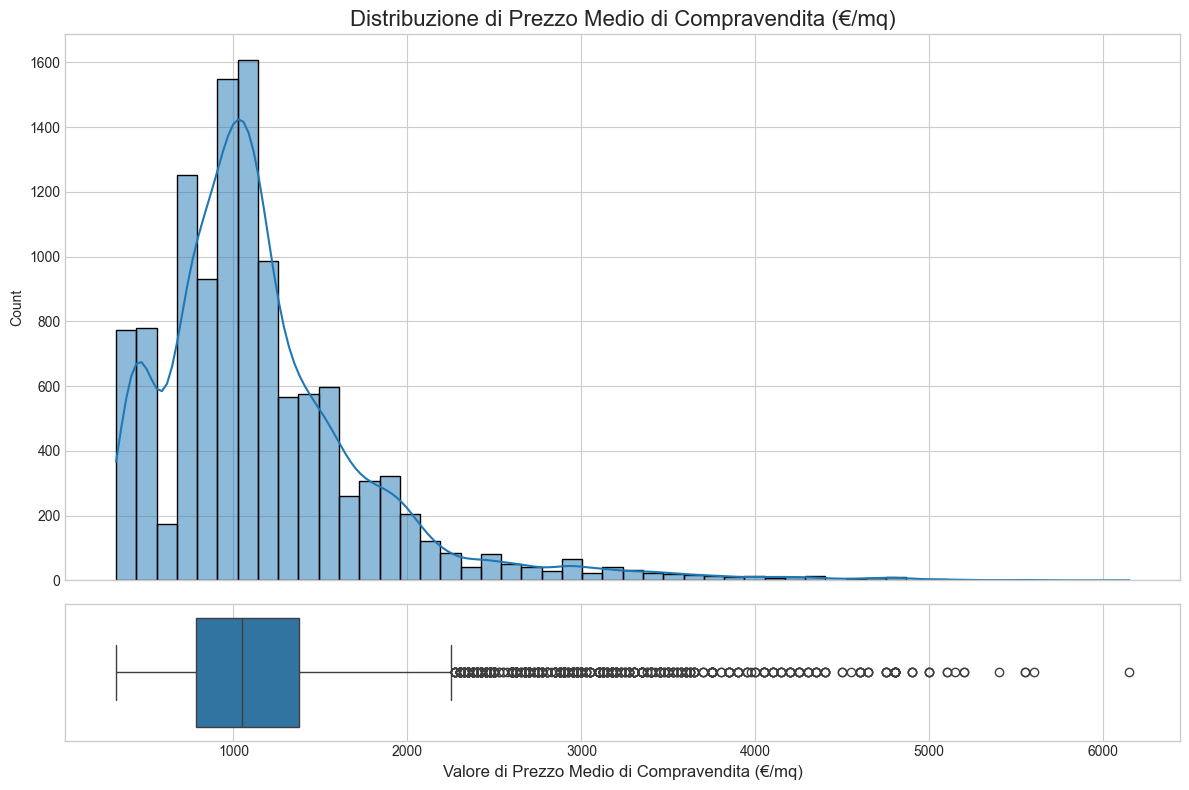

In [5]:
# --- ANALISI UNIVARIATA NUMERICA ---
# Usiamo la funzione creata in analisi_funzioni.py

# Aggiungi una colonna con il prezzo medio per mq per le analisi
df_tabulare['prezzo_medio_mq'] = (df_tabulare['compr_min'] + df_tabulare['compr_max']) / 2

# Visualizza la distribuzione del prezzo medio
analisi_funzioni.plot_distribuzione_numerica(
    df_tabulare,
    colonna='prezzo_medio_mq',
    titolo='Prezzo Medio di Compravendita (€/mq)'
)

# Visualizza la distribuzione della distanza dal centro
if 'distanza_centro_m' in df_tabulare.columns:
    analisi_funzioni.plot_distribuzione_numerica(
        df_tabulare.dropna(subset=['distanza_centro_m']), # Usa solo i dati con geometria
        colonna='distanza_centro_m',
        titolo='Distanza dal Centro (metri)'
    )

### Distribuzione Feature Categoriche

C:\Users\emmal\AppData\Local\Temp\ipykernel_14180\729812024.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_tabulare['descr_tipologia'], order=df_tabulare['descr_tipologia'].value_counts().index, palette='viridis')


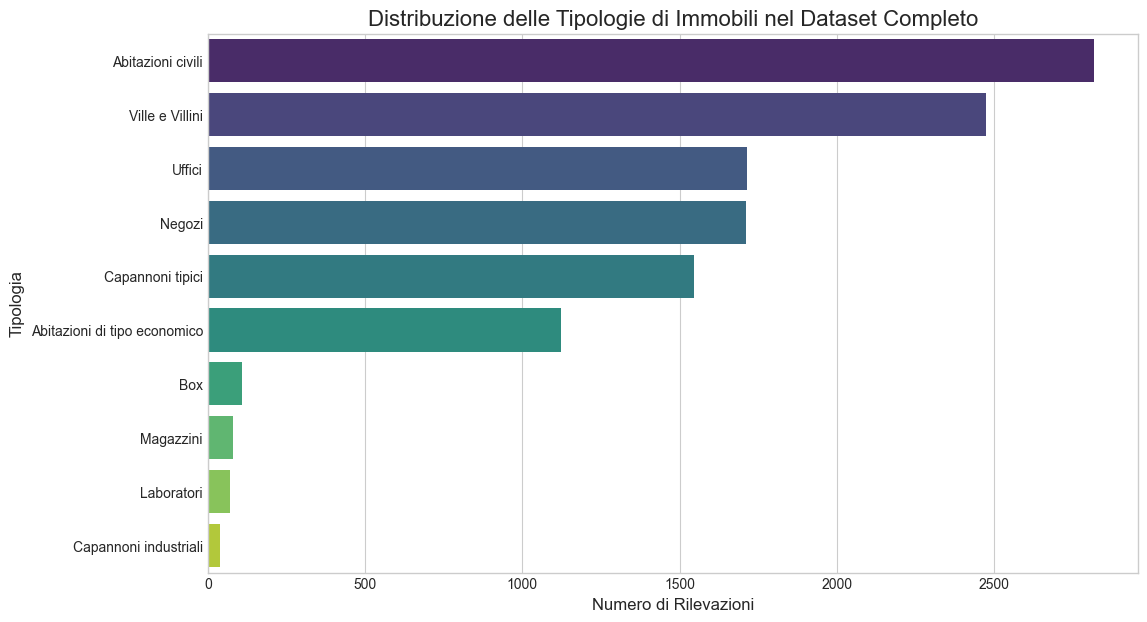

C:\Users\emmal\AppData\Local\Temp\ipykernel_14180\729812024.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_tabulare['stato'], order=df_tabulare['stato'].value_counts().index, palette='plasma')


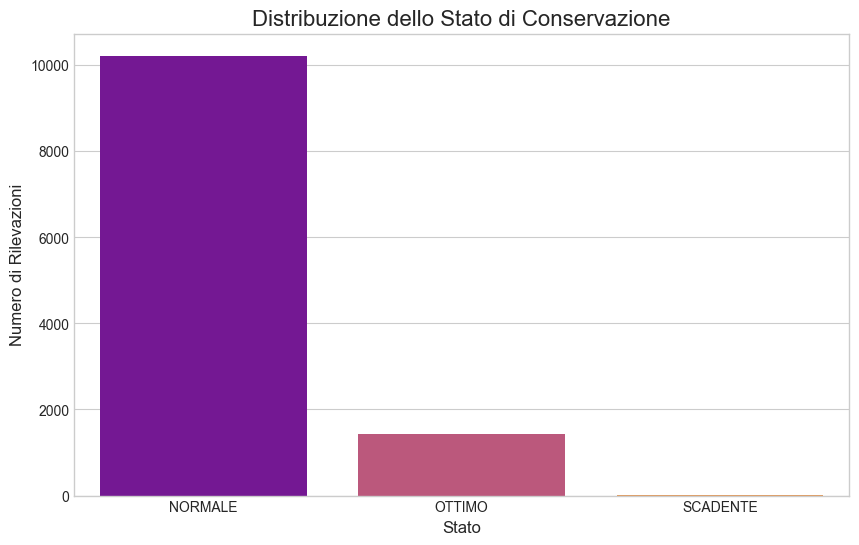

In [6]:
# --- ANALISI UNIVARIATA CATEGORICA ---

# Distribuzione delle Tipologie di Immobili
plt.figure(figsize=(12, 7))
sns.countplot(y=df_tabulare['descr_tipologia'], order=df_tabulare['descr_tipologia'].value_counts().index, palette='viridis')
plt.title('Distribuzione delle Tipologie di Immobili nel Dataset Completo', fontsize=16)
plt.xlabel('Numero di Rilevazioni', fontsize=12)
plt.ylabel('Tipologia', fontsize=12)
plt.show()

# Distribuzione dello Stato di Conservazione
plt.figure(figsize=(10, 6))
sns.countplot(x=df_tabulare['stato'], order=df_tabulare['stato'].value_counts().index, palette='plasma')
plt.title('Distribuzione dello Stato di Conservazione', fontsize=16)
plt.xlabel('Stato', fontsize=12)
plt.ylabel('Numero di Rilevazioni', fontsize=12)
plt.show()

### Analisi Bivariata e Temporale

C:\Users\emmal\AppData\Local\Temp\ipykernel_14180\2749846850.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='prezzo_medio_mq', y='descr_tipologia', data=df_tabulare, order=df_tabulare.groupby('descr_tipologia')['prezzo_medio_mq'].median().sort_values().index, palette='coolwarm')


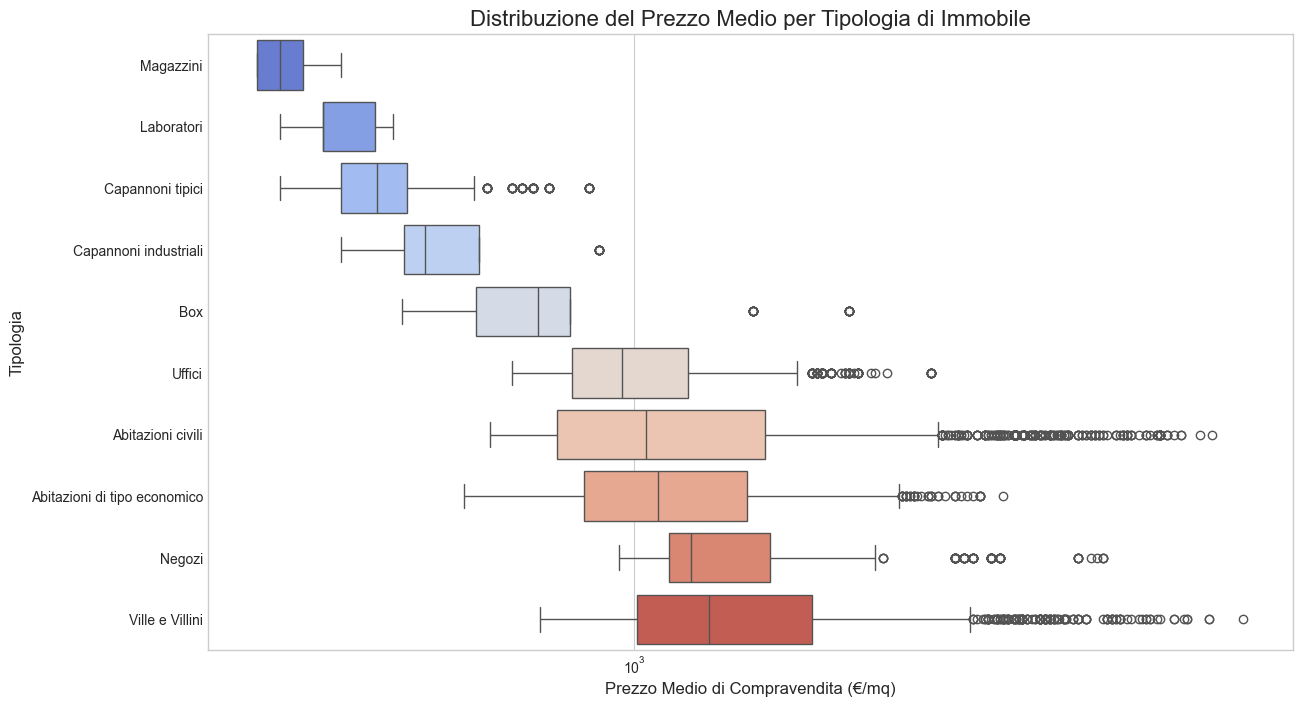

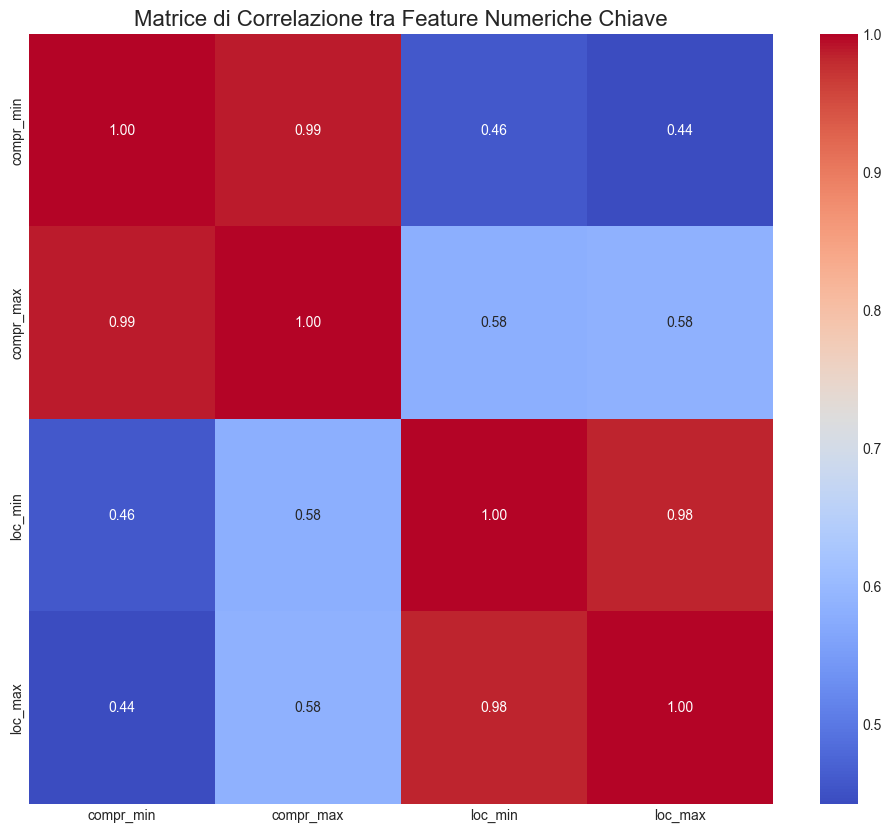

In [7]:
# --- ANALISI BIVARIATA E TEMPORALE ---

# Boxplot: Prezzo medio per tipologia di immobile
plt.figure(figsize=(14, 8))
sns.boxplot(x='prezzo_medio_mq', y='descr_tipologia', data=df_tabulare, order=df_tabulare.groupby('descr_tipologia')['prezzo_medio_mq'].median().sort_values().index, palette='coolwarm')
plt.title('Distribuzione del Prezzo Medio per Tipologia di Immobile', fontsize=16)
plt.xlabel('Prezzo Medio di Compravendita (€/mq)', fontsize=12)
plt.ylabel('Tipologia', fontsize=12)
plt.xscale('log') # Usa scala logaritmica se i valori sono molto schiacciati
plt.show()

# Analisi Temporale: Andamento del prezzo medio nel tempo
# Assicurati di avere le colonne 'anno' e 'semestre_num' dal preprocessing
if 'anno' in df_tabulare.columns and 'semestre_num' in df_tabulare.columns:
    df_tabulare['periodo'] = df_tabulare['anno'].astype(str) + ' - Semestre ' + df_tabulare['semestre_num'].astype(str)
    
    plt.figure(figsize=(15, 8))
    sns.lineplot(x='periodo', y='prezzo_medio_mq', data=df_tabulare, hue='descr_tipologia', marker='o', errorbar=None)
    plt.title('Andamento del Prezzo Medio (€/mq) nel Tempo per Tipologia', fontsize=16)
    plt.xlabel('Periodo', fontsize=12)
    plt.ylabel('Prezzo Medio (€/mq)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Tipologia', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Matrice di Correlazione per le feature numeriche
plt.figure(figsize=(12, 10))
matrice_correlazione = df_tabulare[colonne_numeriche_chiave].corr()
sns.heatmap(matrice_correlazione, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione tra Feature Numeriche Chiave', fontsize=16)
plt.show()

In [8]:
# Analisi Temporale: Andamento del prezzo medio nel tempo
# Assicurati di avere le colonne 'anno' e 'semestre_num' dal preprocessing
if 'anno' in df_tabulare.columns and 'semestre_num' in df_tabulare.columns:
    df_tabulare['periodo'] = df_tabulare['anno'].astype(str) + ' - Semestre ' + df_tabulare['semestre_num'].astype(str)
    
    plt.figure(figsize=(15, 8))
    sns.lineplot(x='periodo', y='prezzo_medio_mq', data=df_tabulare, hue='descr_tipologia', marker='o', errorbar=None)
    plt.title('Andamento del Prezzo Medio (€/mq) nel Tempo per Tipologia', fontsize=16)
    plt.xlabel('Periodo', fontsize=12)
    plt.ylabel('Prezzo Medio (€/mq)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Tipologia', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Analisi Geospaziale - Preparazione e Mappe

In [9]:
# --- CELLA DI DEBUG DEFINITIVA PER IL FILE SYSTEM ---

# Assicurati che questa variabile sia definita correttamente con il tuo percorso
cartella_dati = "C:/Users/emmal/Desktop/STAGE/PROGETTO/DatiOMI/VERONA_prov"
print(f"--- INIZIO DEBUG DETTAGLIATO DEL PERCORSO: '{cartella_dati}' ---")

# 1. Verifica che il percorso esista
if not os.path.exists(cartella_dati):
    print("\nERRORE FATALE: Il percorso specificato non esiste. Controlla che non ci siano errori di battitura.")
elif not os.path.isdir(cartella_dati):
    print(f"\nERRORE FATALE: Il percorso '{cartella_dati}' punta a un file, non a una cartella.")
else:
    print("\nSUCCESSO: Il percorso punta a una cartella esistente.")
    
    # 2. Lista tutto il contenuto della cartella principale
    print("\n--- Contenuto trovato nella cartella principale ---")
    elementi_trovati = os.listdir(cartella_dati)
    
    if not elementi_trovati:
        print("ATTENZIONE: La cartella è vuota!")
    else:
        for nome_elemento in elementi_trovati:
            path_elemento = os.path.join(cartella_dati, nome_elemento)
            
            # 3. Per ogni elemento, determina se è un file o una cartella
            if os.path.isdir(path_elemento):
                print(f"  -> [CARTELLA] {nome_elemento}")
                # Prova a vedere cosa c'è dentro
                try:
                    contenuto_sottocartella = os.listdir(path_elemento)
                    print(f"     Contenuto: {contenuto_sottocartella[:5]} {'...' if len(contenuto_sottocartella) > 5 else ''}")
                except Exception as e:
                    print(f"     Impossibile leggere il contenuto: {e}")

            elif os.path.isfile(path_elemento):
                print(f"  -> [FILE]     {nome_elemento}")
            else:
                print(f"  -> [SCONOSCIUTO] {nome_elemento}")

print("\n--- FINE DEBUG ---")

--- INIZIO DEBUG DETTAGLIATO DEL PERCORSO: 'C:/Users/emmal/Desktop/STAGE/PROGETTO/DatiOMI/VERONA_prov' ---

SUCCESSO: Il percorso punta a una cartella esistente.

--- Contenuto trovato nella cartella principale ---
  -> [FILE]     QIP_1201216_1_20232_VALORI.csv
  -> [FILE]     QIP_1201216_1_20232_ZONE.csv
  -> [FILE]     QIP_1201217_1_20222_VALORI.csv
  -> [FILE]     QIP_1201217_1_20222_ZONE.csv
  -> [FILE]     QIP_1201218_1_20221_VALORI.csv
  -> [FILE]     QIP_1201218_1_20221_ZONE.csv
  -> [FILE]     QIP_1201220_1_20212_VALORI.csv
  -> [FILE]     QIP_1201220_1_20212_ZONE.csv
  -> [FILE]     QIP_1201221_1_20211_VALORI.csv
  -> [FILE]     QIP_1201221_1_20211_ZONE.csv
  -> [FILE]     QIP_1201223_1_20202_VALORI.csv
  -> [FILE]     QIP_1201223_1_20202_ZONE.csv
  -> [FILE]     QIP_1201225_1_20201_VALORI.csv
  -> [FILE]     QIP_1201225_1_20201_ZONE.csv
  -> [FILE]     QI_1201235_1_20231_VALORI.csv
  -> [FILE]     QI_1201235_1_20231_ZONE.csv
  -> [FILE]     QI_1201237_1_20241_VALORI.csv
  -> 

Dati geospaziali caricati con successo.
Shape del GeoDataFrame: (2100, 4)

Semestri presenti nel GeoDataFrame:
['2020_1', '2020_2', '2021_1', '2021_2', '2022_1', '2022_2', '2023_2']

Controllo e correzione delle geometrie non valide in corso...
Correzione completata.
Aggregazione delle zone per la mappa di base...

Numero di zone uniche mappate: 347


<Figure size 1500x1500 with 0 Axes>

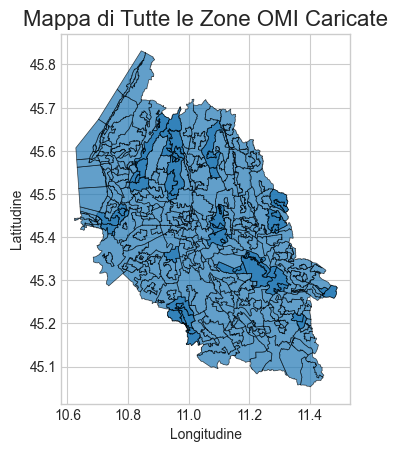

In [10]:
# --- ANALISI GEOSPAZIALE ---

if gdf_geospaziale is not None and not gdf_geospaziale.empty:
    print("Dati geospaziali caricati con successo.")
    print(f"Shape del GeoDataFrame: {gdf_geospaziale.shape}")
    print("\nSemestri presenti nel GeoDataFrame:")
    print(sorted(gdf_geospaziale['semestre'].unique()))

    # --- CORREZIONE DELLE GEOMETRIE NON VALIDE ---
    # L'operazione .buffer(0) è una tecnica standard per correggere errori topologici.
    # Applichiamola prima di operazioni complesse come .dissolve()
    print("\nControllo e correzione delle geometrie non valide in corso...")
    gdf_geospaziale['geometry'] = gdf_geospaziale.geometry.buffer(0)
    print("Correzione completata.")
    
    # --- Mappa di Base di TUTTE le Zone OMI Caricate ---
    # Ora che le geometrie sono pulite, il dissolve dovrebbe funzionare.
    print("Aggregazione delle zone per la mappa di base...")
    zone_unificate = gdf_geospaziale.dissolve(by='zona')
    
    print(f"\nNumero di zone uniche mappate: {len(zone_unificate)}")

    plt.figure(figsize=(15, 15))
    zone_unificate.plot(edgecolor='black', alpha=0.7, linewidth=0.5) # Aggiunto linewidth
    plt.title('Mappa di Tutte le Zone OMI Caricate', fontsize=16)
    plt.xlabel('Longitudine')
    plt.ylabel('Latitudine')
    plt.grid(True)
    plt.show()
else:
    print("Nessuna colonna 'geometry' valida trovata. Salto le analisi geospaziali.")

# Analisi Geospaziale - Mappe Tematiche (Choropleth)

## 1. COMPRAVENDITA

### Mappa di Previsione dei Prezzi

c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

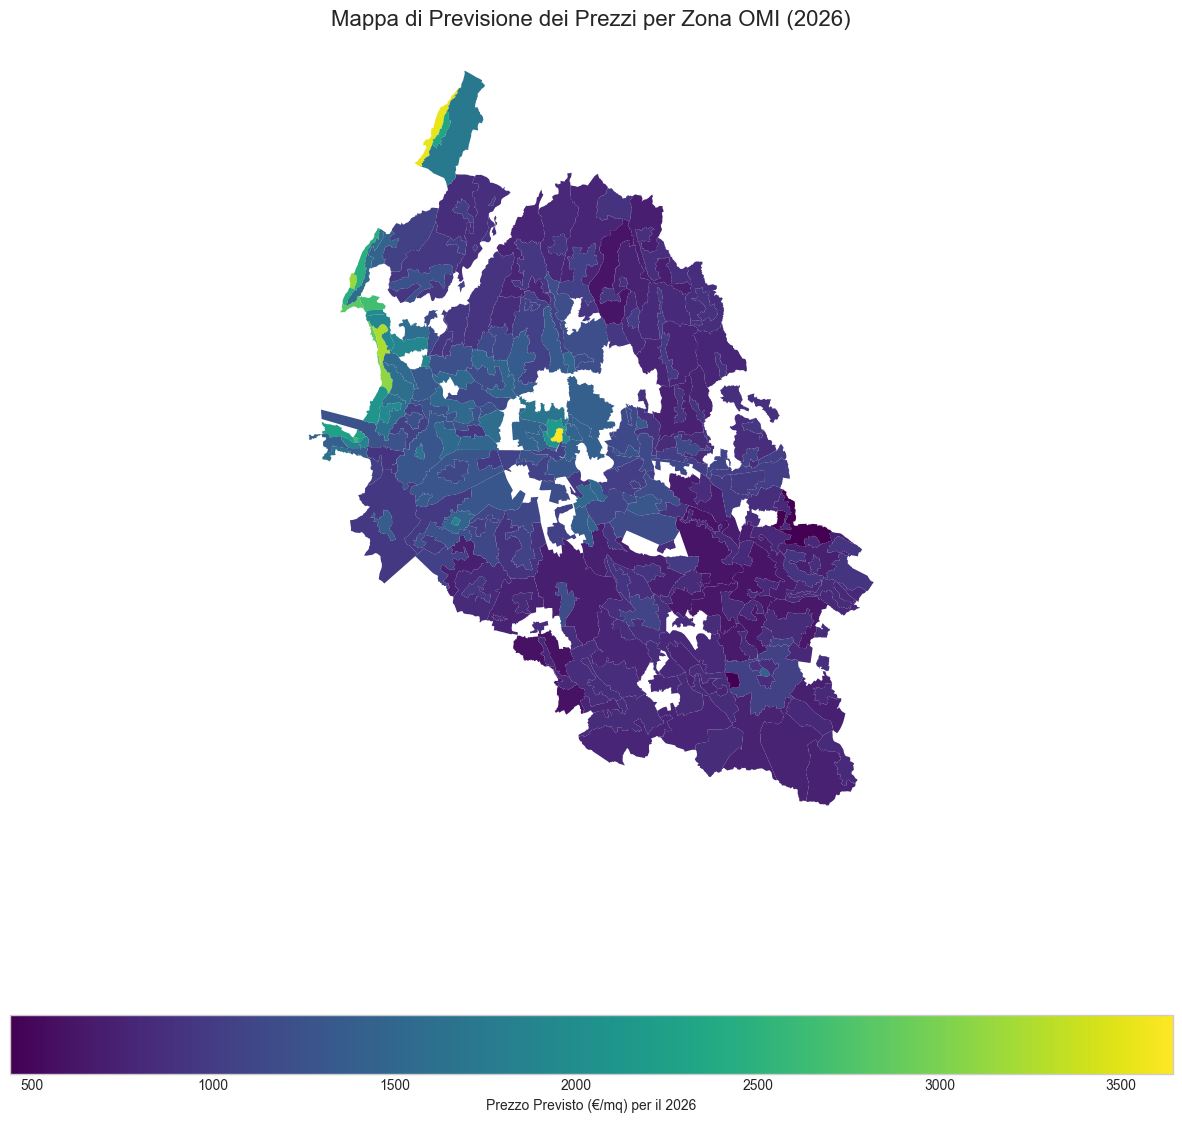

In [11]:
# --- MAPPA DI PREVISIONE DEI PREZZI MEDI ---
# Aggiungi una colonna con il prezzo medio per mq per le analisi
df_tabulare['prezzo_medio_mq'] = (df_tabulare['compr_min'] + df_tabulare['compr_max']) / 2

# Assicurati che 'df_tabulare' e 'gdf_geospaziale' siano caricati e pronti
if 'df_tabulare' in locals() and 'gdf_geospaziale' in locals():

    # 1. PREPARA E UNISCI I DATI
    # Aggiungi la colonna 'prezzo_medio_mq' se non esiste già
    if 'prezzo_medio_mq' not in df_tabulare.columns:
        df_tabulare['prezzo_medio_mq'] = (df_tabulare['compr_min'] + df_tabulare['compr_max']) / 2
    
    # Crea una colonna 'zona' in df_tabulare per il join, basandoti sulla struttura di gdf_geospaziale
    # Esempio: "VERONA - Zona OMI B2"
    df_tabulare['zona'] = df_tabulare['comune_descrizione_val'] + ' - Zona OMI ' + df_tabulare['zona_val']

    # Unisci i dati tabulari con quelli geospaziali
    # Questo è il passaggio chiave che mancava
    gdf_completo = gdf_geospaziale.merge(df_tabulare, on=['zona', 'semestre'], how='left')

    # Rimuovi eventuali righe senza dati sui prezzi
    gdf_completo.dropna(subset=['prezzo_medio_mq'], inplace=True)

    # 2. FUNZIONE DI PREPARAZIONE DATI E PREVISIONE
    # Funzione per convertire il semestre in un valore numerico (es. '2023_2' -> 2023.5)
    def semestre_a_numero(s):
        anno, sem = s.split('_')
        return float(anno) + (0.5 if sem == '2' else 0.0)

    gdf_completo['periodo_num'] = gdf_completo['semestre'].apply(semestre_a_numero)

    # Dizionario per salvare le previsioni
    previsioni = {}
    
    # Anno/semestre per cui fare la previsione (es. primo semestre 2025 -> 2025.0)
    periodo_futuro = 2026.0

    # 3. CREA IL MODELLO E PREVEDI PER OGNI ZONA
    for zona, gruppo in gdf_completo.groupby('zona'):
        # Assicurati ci siano abbastanza dati per una regressione
        if len(gruppo) < 2:
            continue

        X = gruppo[['periodo_num']]
        y = gruppo['prezzo_medio_mq']

        model = RandomForestRegressor(n_estimators=50, random_state=42)
        model.fit(X, y)
        
        # Prevedi il prezzo per il periodo futuro
        previsione = model.predict(np.array([[periodo_futuro]]))
        previsioni[zona] = previsione[0]

    # 4. CREA LA MAPPA CON I DATI PREVISTI
    # Prendi le geometrie uniche delle zone
    zone_geometrie = gdf_geospaziale.dissolve(by='zona')
    
    # Crea una Series con le previsioni per il merge
    s_previsioni = pd.Series(previsioni, name=f'prezzo_previsto_{int(periodo_futuro)}')
    
    # Unisci le geometrie con le previsioni
    mappa_previsione = zone_geometrie.join(s_previsioni, how='inner')

    # Creazione della mappa
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    mappa_previsione.plot(
        column=f'prezzo_previsto_{int(periodo_futuro)}',
        ax=ax,
        legend=True,
        cmap='viridis',
        legend_kwds={'label': f"Prezzo Previsto (€/mq) per il {int(periodo_futuro)}", 'orientation': "horizontal"},
        missing_kwds={"color": "lightgrey", "label": "Dati insufficienti"}
    )
    ax.set_title(f'Mappa di Previsione dei Prezzi per Zona OMI ({int(periodo_futuro)})', fontsize=16)
    ax.set_axis_off()
    plt.show()

else:
    print("DataFrame 'df_tabulare' o 'gdf_geospaziale' non trovati. Assicurati di aver eseguito le celle precedenti.")


### Mappa per Tipologia di Abitazione Prevalente

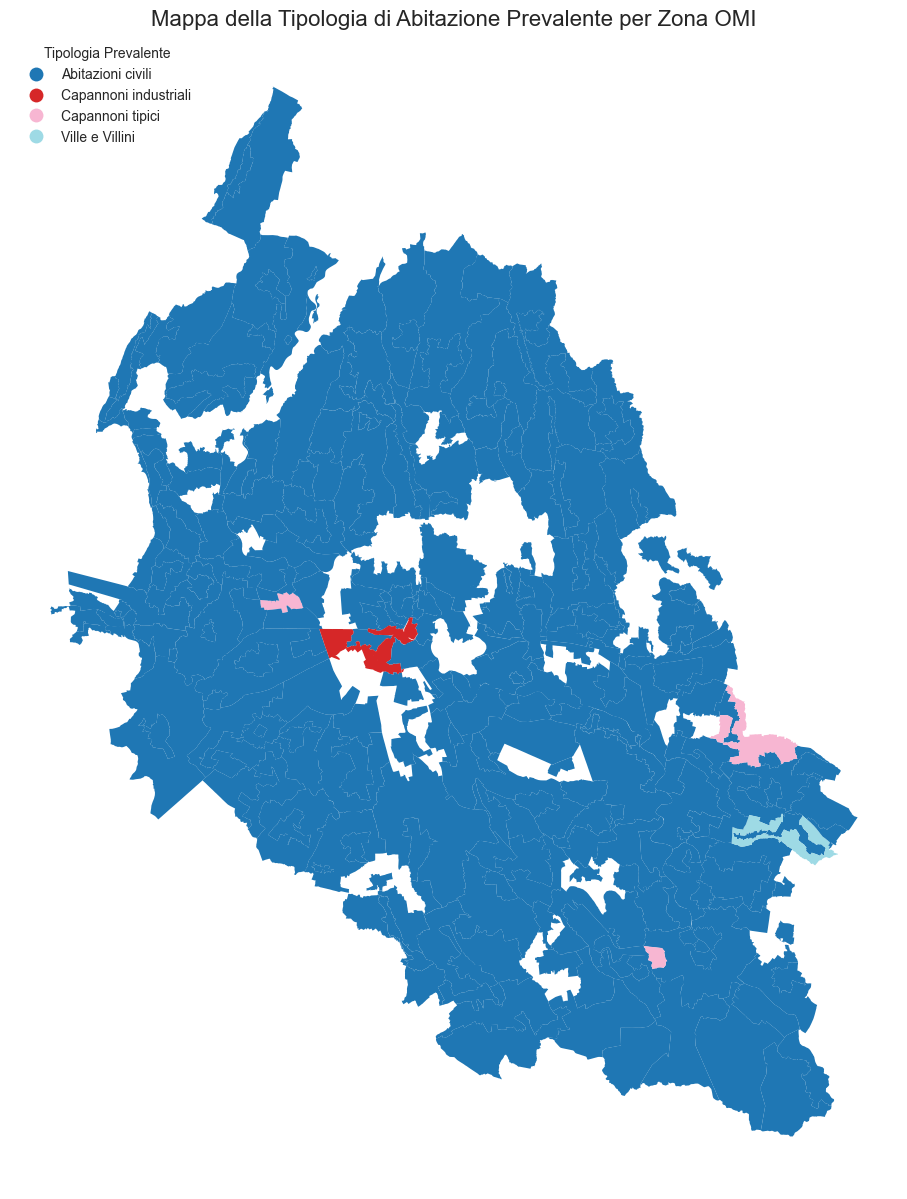

In [12]:
# Assicurati che il DataFrame unito 'gdf_completo' sia disponibile dalla cella precedente
if 'gdf_completo' in locals() and not gdf_completo.empty:

    # 1. AGGREGA I DATI PER TROVARE LA MODA
    # Per ogni zona, trova la tipologia di immobile più frequente (la moda)
    # Usiamo lambda perché la moda può restituire più valori; prendiamo il primo.
    dati_mappa_tipologia = gdf_completo.dissolve(
        by='zona',
        aggfunc={'descr_tipologia': lambda x: x.mode()[0] if not x.mode().empty else None}
    )
    dati_mappa_tipologia.dropna(subset=['descr_tipologia'], inplace=True)


    # 2. CREAZIONE DELLA MAPPA CATEGORICA
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    dati_mappa_tipologia.plot(
        column='descr_tipologia',
        ax=ax,
        legend=True,
        categorical=True,  # Impostazione chiave per dati testuali/categorici
        cmap='tab20',      # Colormap adatta a dati categorici
        legend_kwds={'title': "Tipologia Prevalente", 'loc': 'upper left'}
    )
    ax.set_title('Mappa della Tipologia di Abitazione Prevalente per Zona OMI', fontsize=16)
    ax.set_axis_off()
    plt.show()

else:
    print("DataFrame 'gdf_completo' non disponibile. Esegui la cella precedente per crearlo.")

### Mappa della Tipologia con la Maggior Crescita di Valore Prevista

c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

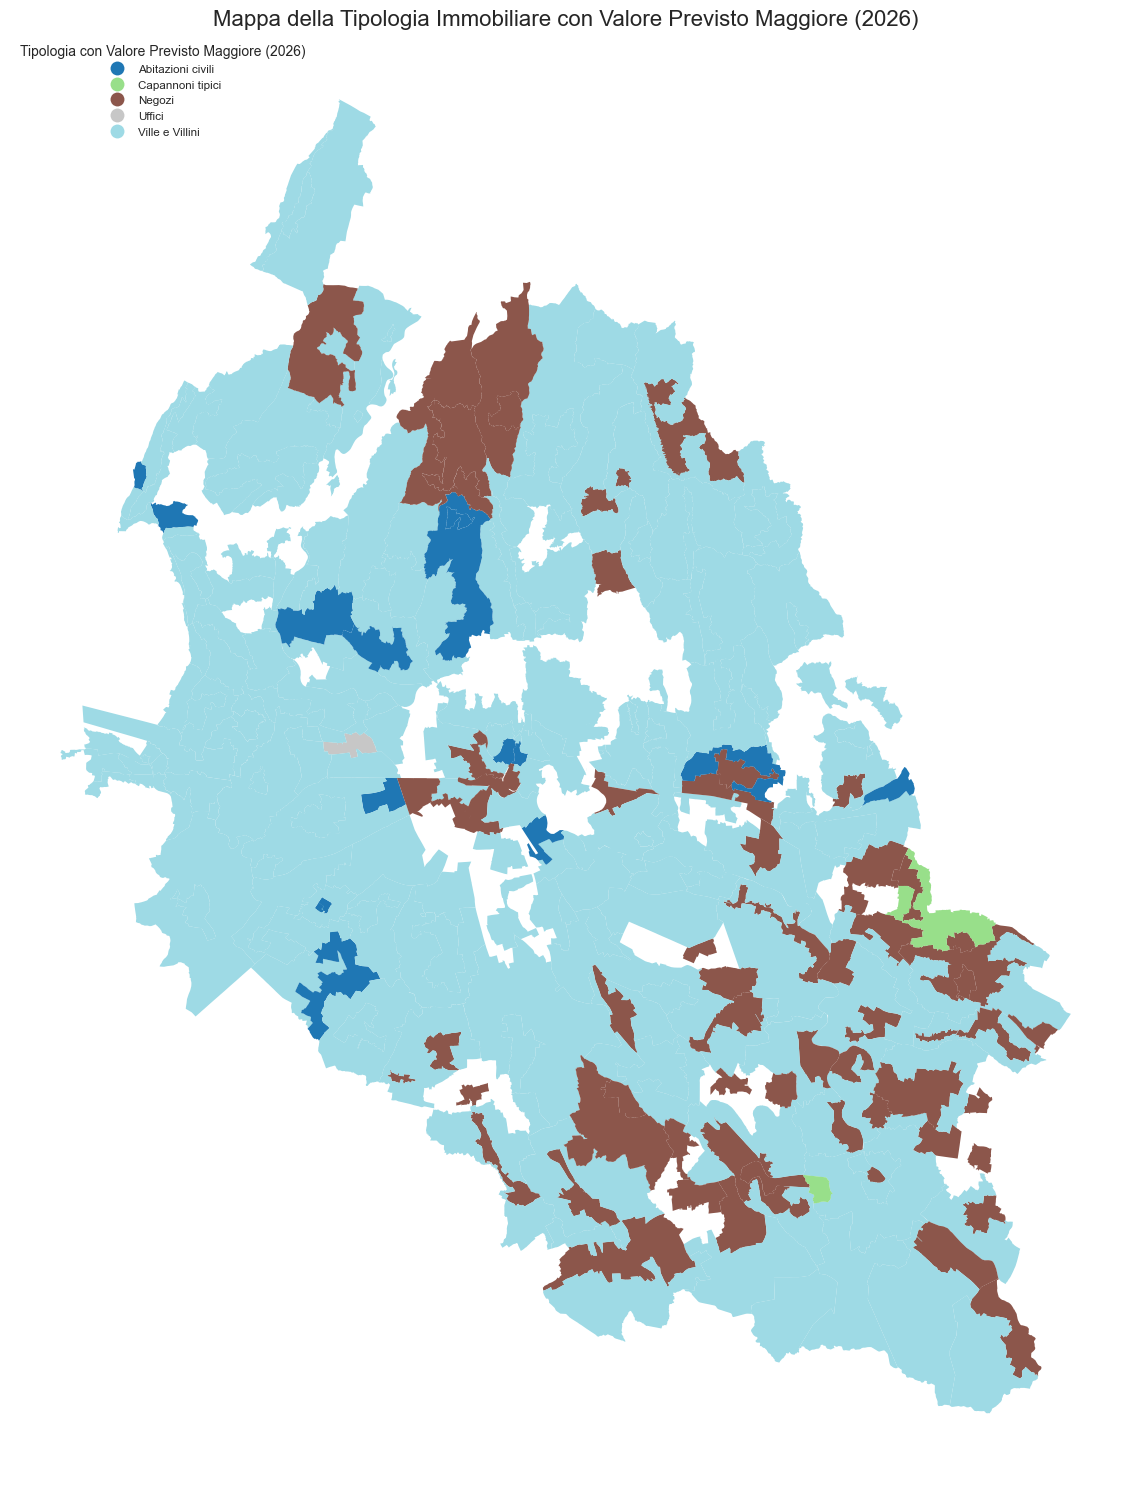

In [13]:
# --- MAPPA DELLA TIPOLOGIA CON IL VALORE PREVISTO PIÙ ALTO (2026) ---
# Assicurati che 'gdf_completo' dalla cella precedente sia disponibile
if 'gdf_completo' in locals() and not gdf_completo.empty:

    # 1. PREPARA I DATI E IL PERIODO DI PREVISIONE
    periodo_futuro_2026 = 2026.0
    previsioni_per_tipologia = {}

    # 2. RAGGRUPPA, MODELLA E PREVEDI PER OGNI ZONA E TIPOLOGIA
    # Usiamo un ciclo annidato: prima per zona, poi per tipologia all'interno della zona
    for zona, dati_zona in gdf_completo.groupby('zona'):
        
        previsioni_in_zona = {}
        for tipologia, dati_tipologia in dati_zona.groupby('descr_tipologia'):
            
            # Assicurati ci siano abbastanza dati per una regressione
            if len(dati_tipologia) < 2:
                continue

            X = dati_tipologia[['periodo_num']]
            y = dati_tipologia['prezzo_medio_mq']

            model = RandomForestRegressor(n_estimators=50, random_state=42)
            model.fit(X, y)
            
            # Prevedi il prezzo per il 2026 per questa specifica tipologia
            previsione = model.predict(np.array([[periodo_futuro_2026]]))
            previsioni_in_zona[tipologia] = previsione[0]
        
        # Se abbiamo previsioni per questa zona, le salviamo
        if previsioni_in_zona:
            previsioni_per_tipologia[zona] = previsioni_in_zona

    # 3. IDENTIFICA LA TIPOLOGIA CON LA PREVISIONE PIÙ ALTA PER ZONA
    tipologia_leader_valore = {}
    for zona, previsioni in previsioni_per_tipologia.items():
        if previsioni: # Se ci sono previsioni per questa zona
            # Trova la tipologia con il valore massimo previsto
            tipologia_leader = max(previsioni, key=previsioni.get)
            tipologia_leader_valore[zona] = tipologia_leader

    # 4. CREA LA MAPPA CATEGORICA
    # Prendi le geometrie uniche delle zone
    zone_geometrie = gdf_geospaziale.dissolve(by='zona')
    
    # Crea una Series con le tipologie leader per il merge
    s_tipologia_leader = pd.Series(tipologia_leader_valore, name='tipologia_leader_2026')
    
    # Unisci le geometrie con i risultati
    mappa_previsione_tipologia = zone_geometrie.join(s_tipologia_leader, how='inner')

    # Creazione della mappa
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    mappa_previsione_tipologia.plot(
        column='tipologia_leader_2026',
        ax=ax,
        legend=True,
        categorical=True,
        cmap='tab20', # Colormap adatta per dati categorici
        legend_kwds={'title': "Tipologia con Valore Previsto Maggiore (2026)", 'loc': 'upper left', 'fontsize': 'small'},
        missing_kwds={"color": "lightgrey", "label": "Dati insufficienti per previsione"}
    )
    ax.set_title('Mappa della Tipologia Immobiliare con Valore Previsto Maggiore (2026)', fontsize=16)
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

else:
    print("DataFrame 'gdf_completo' non disponibile. Esegui la cella precedente per crearlo.")

## 2. LOCAZIONE

### Mappa di Previsione dei Canoni di Locazione (2026)

c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

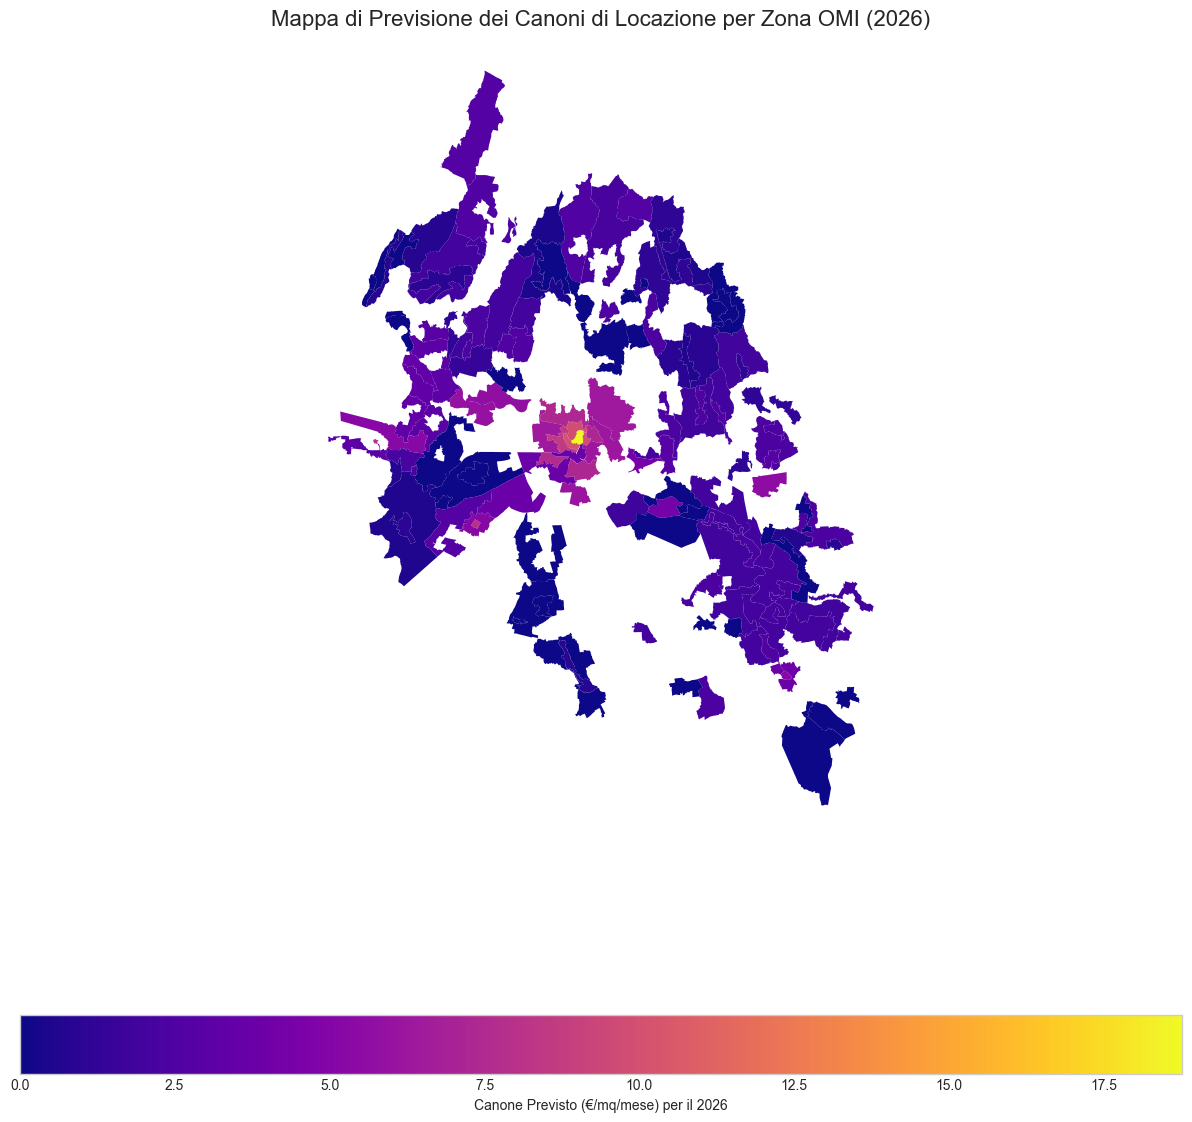

In [14]:
# --- MAPPA DI PREVISIONE DEI CANONI DI LOCAZIONE (2026) ---
if 'df_tabulare' in locals() and 'gdf_geospaziale' in locals():

    # 1. PREPARA E UNISCI I DATI PER LA LOCAZIONE
    # Aggiungi la colonna 'locazione_media_mq'
    # Assicura che le colonne di locazione siano numeriche, convertendo errori in NaN
    df_tabulare['loc_min'] = pd.to_numeric(df_tabulare['loc_min'], errors='coerce')
    df_tabulare['loc_max'] = pd.to_numeric(df_tabulare['loc_max'], errors='coerce')
    
    df_tabulare['locazione_media_mq'] = (df_tabulare['loc_min'] + df_tabulare['loc_max']) / 2
    
    # Crea la colonna 'zona' per il join se non esiste già
    if 'zona' not in df_tabulare.columns:
        df_tabulare['zona'] = df_tabulare['comune_descrizione_val'] + ' - Zona OMI ' + df_tabulare['zona_val']

    # Unisci i dati
    gdf_completo_loc = gdf_geospaziale.merge(df_tabulare, on=['zona', 'semestre'], how='left')
    
    # !!! IMPORTANTE: Rimuovi le righe dove non ci sono dati di locazione
    gdf_completo_loc.dropna(subset=['locazione_media_mq'], inplace=True)

    # Converti il semestre in un valore numerico
    if 'periodo_num' not in gdf_completo_loc.columns:
        def semestre_a_numero(s):
            anno, sem = s.split('_')
            return float(anno) + (0.5 if sem == '2' else 0.0)
        gdf_completo_loc['periodo_num'] = gdf_completo_loc['semestre'].apply(semestre_a_numero)

    # 2. MODELLA E PREVEDI IL CANONE DI LOCAZIONE
    previsioni_locazione = {}
    periodo_futuro_2026 = 2026.0

    for zona, gruppo in gdf_completo_loc.groupby('zona'):
        if len(gruppo) < 2:
            continue

        X = gruppo[['periodo_num']]
        y = gruppo['locazione_media_mq']

        model = RandomForestRegressor(n_estimators=50, random_state=42)
        model.fit(X, y)
        
        previsione = model.predict(np.array([[periodo_futuro_2026]]))
        previsioni_locazione[zona] = previsione[0]

    # 3. CREA LA MAPPA DI PREVISIONE
    zone_geometrie = gdf_geospaziale.dissolve(by='zona')
    s_previsioni_loc = pd.Series(previsioni_locazione, name=f'locazione_prevista_2026')
    mappa_previsione_loc = zone_geometrie.join(s_previsioni_loc, how='inner')

    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    mappa_previsione_loc.plot(
        column=f'locazione_prevista_2026',
        ax=ax,
        legend=True,
        cmap='plasma', # Cambiamo colormap per distinguerla
        legend_kwds={'label': "Canone Previsto (€/mq/mese) per il 2026", 'orientation': "horizontal"},
        missing_kwds={"color": "lightgrey", "label": "Dati insufficienti"}
    )
    ax.set_title('Mappa di Previsione dei Canoni di Locazione per Zona OMI (2026)', fontsize=16)
    ax.set_axis_off()
    plt.show()

else:
    print("DataFrame 'df_tabulare' o 'gdf_geospaziale' non trovati.")

### Mappa della Tipologia con il Canone di Locazione Previsto più Alto (2026)

c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

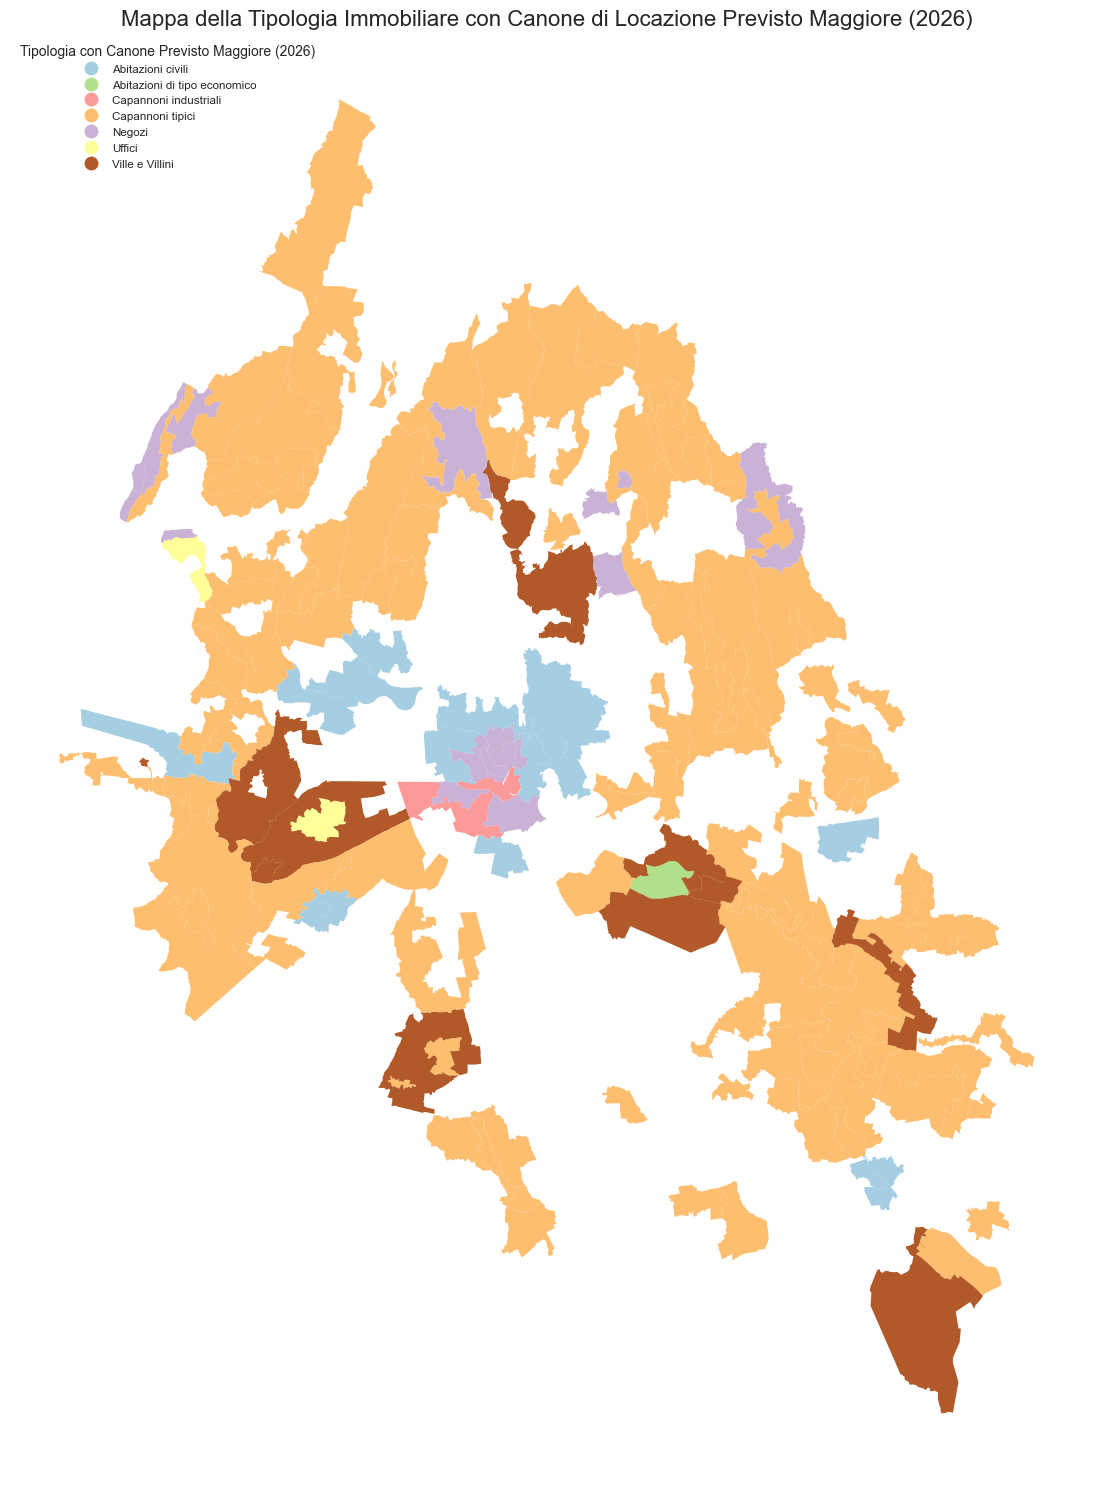

In [15]:
# --- MAPPA DELLA TIPOLOGIA CON IL CANONE DI LOCAZIONE PREVISTO PIÙ ALTO (2026) ---
# Assicurati che 'gdf_completo_loc' sia disponibile dalla prima cella di questo output
if 'gdf_completo_loc' in locals() and not gdf_completo_loc.empty:

    # 1. PREPARA I DATI E IL PERIODO DI PREVISIONE
    periodo_futuro_2026 = 2026.0
    previsioni_locazione_per_tipologia = {}

    # 2. RAGGRUPPA, MODELLA E PREVEDI PER OGNI ZONA E TIPOLOGIA
    for zona, dati_zona in gdf_completo_loc.groupby('zona'):
        
        previsioni_in_zona = {}
        for tipologia, dati_tipologia in dati_zona.groupby('descr_tipologia'):
            
            if len(dati_tipologia) < 2:
                continue

            X = dati_tipologia[['periodo_num']]
            y = dati_tipologia['locazione_media_mq']

            model = RandomForestRegressor(n_estimators=50, random_state=42)
            model.fit(X, y)
            
            previsione = model.predict(np.array([[periodo_futuro_2026]]))
            previsioni_in_zona[tipologia] = previsione[0]
        
        if previsioni_in_zona:
            previsioni_locazione_per_tipologia[zona] = previsioni_in_zona

    # 3. IDENTIFICA LA TIPOLOGIA CON IL VALORE PREVISTO PIÙ ALTO PER ZONA
    tipologia_leader_locazione = {}
    for zona, previsioni in previsioni_locazione_per_tipologia.items():
        if previsioni:
            tipologia_leader = max(previsioni, key=previsioni.get)
            tipologia_leader_locazione[zona] = tipologia_leader

    # 4. CREA LA MAPPA CATEGORICA
    zone_geometrie = gdf_geospaziale.dissolve(by='zona')
    s_tipologia_leader_loc = pd.Series(tipologia_leader_locazione, name='tipologia_leader_locazione_2026')
    mappa_previsione_tipologia_loc = zone_geometrie.join(s_tipologia_leader_loc, how='inner')

    # Creazione della mappa
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    mappa_previsione_tipologia_loc.plot(
        column='tipologia_leader_locazione_2026',
        ax=ax,
        legend=True,
        categorical=True,
        cmap='Paired', # Usiamo un'altra colormap per distinguerla
        legend_kwds={'title': "Tipologia con Canone Previsto Maggiore (2026)", 'loc': 'upper left', 'fontsize':'small'},
        missing_kwds={"color": "lightgrey", "label": "Dati insufficienti"}
    )
    ax.set_title('Mappa della Tipologia Immobiliare con Canone di Locazione Previsto Maggiore (2026)', fontsize=16)
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

else:
    print("DataFrame 'gdf_completo_loc' non disponibile. Esegui la prima cella di codice per crearlo.")

# MODELS

## Setup e Import

In [16]:
# Carica il tuo DataFrame
# Assumiamo che df_tabulare sia già stato caricato dalle celle precedenti del tuo notebook
# df = df_tabulare.copy() # Lavoriamo su una copia per sicurezza
df = df_tabulare

print("DataFrame caricato con successo.")
print(f"Shape iniziale: {df.shape}")

DataFrame caricato con successo.
Shape iniziale: (11681, 31)


## Feature Engineering e Pulizia Dati

In [17]:
# --- FEATURE ENGINEERING E PULIZIA ---

# 1. CREAZIONE DELLE VARIABILI TARGET
# Per la regressione (prezzo di compravendita)
df['prezzo_medio_mq'] = (df['compr_min'] + df['compr_max']) / 2

# Per la classificazione (tipologia di immobile)
# La nostra colonna target è 'descr_tipologia'
if 'target_class' not in df.columns:
    df = df.rename(columns={'descr_tipologia': 'target_class'})

# 2. CREAZIONE DELLE FEATURE
# Convertiamo il semestre in una feature numerica
def semestre_a_numero(s):
    try:
        anno, sem = s.split('_')
        return float(anno) + (0.5 if sem == '2' else 0.0)
    except:
        return np.nan

df['periodo_num'] = df['semestre'].apply(semestre_a_numero)

# 3. CONSOLIDAMENTO DELLE COLONNE DUPLICATE (CORRETTO)
# Usiamo i suffissi corretti '_val' e '_zone'
for col_name in ['fascia', 'comune_descrizione', 'stato_prev', 'comune_istat', 'comune_cat', 'comune_amm']:
    col_val = f'{col_name}_val'
    col_zone = f'{col_name}_zone'
    
    if col_val in df.columns and col_zone in df.columns:
        df[col_name] = df[col_val].fillna(df[col_zone])
        df.drop([col_val, col_zone], axis=1, inplace=True)
        print(f"Consolidata colonna: {col_name}")

# 4. PULIZIA FINALE
# Rimuoviamo le righe dove i nostri target principali sono nulli
df_reg = df.dropna(subset=['prezzo_medio_mq']).copy()
df_class = df.dropna(subset=['target_class']).copy()

print(f"\nShape per la regressione dopo pulizia: {df_reg.shape}")
print(f"Shape per la classificazione dopo pulizia: {df_class.shape}")

# DEBUG: Controlliamo che le colonne ora esistano
print("\nColonne nel DataFrame df_reg:")
print(df_reg.columns)

Consolidata colonna: fascia
Consolidata colonna: comune_descrizione
Consolidata colonna: stato_prev
Consolidata colonna: comune_istat
Consolidata colonna: comune_cat
Consolidata colonna: comune_amm

Shape per la regressione dopo pulizia: (11681, 26)
Shape per la classificazione dopo pulizia: (11681, 26)

Colonne nel DataFrame df_reg:
Index(['zona_val', 'linkzona', 'cod_tip', 'target_class', 'stato', 'compr_min',
       'compr_max', 'loc_min', 'loc_max', 'sup_nl_loc', 'semestre',
       'zona_descr', 'zona_zone', 'cod_tip_prev', 'descr_tip_prev',
       'microzona', 'prezzo_medio_mq', 'zona', 'locazione_media_mq',
       'periodo_num', 'fascia', 'comune_descrizione', 'stato_prev',
       'comune_istat', 'comune_cat', 'comune_amm'],
      dtype='object')


## Definizione delle Feature e Suddivisione dei Dati

In [18]:
# --- DEFINIZIONE FEATURE E SPLIT DEI DATI ---

# Definiamo le liste di colonne basandoci sulla loro tipologia
# Saranno usate dal preprocessor per applicare le trasformazioni corrette

# Feature numeriche
numerical_cols = [
    'periodo_num' # La nostra feature temporale
]

# Feature categoriche 
categorical_cols = [
    'fascia',              # Fascia dell'immobile
    'stato',               # Stato di conservazione
    'comune_descrizione',  # Nome del comune
    'descr_tip_prev',      # Tipologia prevalente nella zona
    'sup_nl_loc'           # Indicatore superficie per locazione
]

# Feature testuale 
text_col_name = 'zona_descr'

# Lista completa delle feature da usare
features = numerical_cols + categorical_cols + [text_col_name]

# --- PER IL MODELLO DI REGRESSIONE ---
X_reg = df_reg[features]
y_reg = df_reg['prezzo_medio_mq']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)

# --- PER IL MODELLO DI CLASSIFICAZIONE ---
X_class = df_class[features]
y_class = df_class['target_class']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.25, random_state=42)

print("Suddivisione dei dati in training e test completata.")

Suddivisione dei dati in training e test completata.


In [19]:
# Aggiungo questa riga per vedere la dimensione dell'input
print(X_train_class.shape)

(8760, 7)


# Addestramento Modelli base

In [20]:
# --- ADDESTRAMENTO DI TUTTI I MODELLI DI REGRESSIONE BASE ---

print("="*60)
print("MODELLI DI REGRESSIONE BASE (Previsione Prezzo dal file models.py)")
print("="*60)

# Lista dei modelli di regressione da addestrare
modelli_reg = ['linear_regression', 'random_forest', 'lightgbm']

# Ciclo per addestrare e valutare ogni modello
for model_type in modelli_reg:
    train_regression_model(
        X_train=X_train_reg, 
        y_train=y_train_reg, 
        X_test=X_test_reg, 
        y_test=y_test_reg,
        numerical_cols=numerical_cols,
        categorical_cols=categorical_cols,
        text_col_name=text_col_name,
        model_type=model_type
    )


MODELLI DI REGRESSIONE BASE (Previsione Prezzo dal file models.py)

--- Linear Regression ---
Mean Squared Error (MSE): 133805.7752
R2 Score: 0.6479

--- Random Forest Regressor ---
Mean Squared Error (MSE): 141058.0733
R2 Score: 0.6288

--- LightGBM Regressor ---
Mean Squared Error (MSE): 100906.4659
R2 Score: 0.7345


c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



MODELLI DI CLASSIFICAZIONE BASE (Previsione Tipologia dal file models.py)

--- Logistic Regression Classifier ---
Accuracy: 0.3249
Classification Report:
                               precision    recall  f1-score   support

           Abitazioni civili       0.40      0.22      0.28       709
Abitazioni di tipo economico       0.21      0.59      0.31       276
                         Box       0.29      1.00      0.45        28
       Capannoni industriali       0.19      1.00      0.32         9
            Capannoni tipici       0.72      0.78      0.75       386
                  Laboratori       0.09      0.37      0.15        19
                   Magazzini       0.12      0.45      0.19        22
                      Negozi       0.23      0.19      0.21       431
                      Uffici       0.21      0.14      0.17       455
             Ville e Villini       0.36      0.22      0.27       586

                    accuracy                           0.32      2921
  

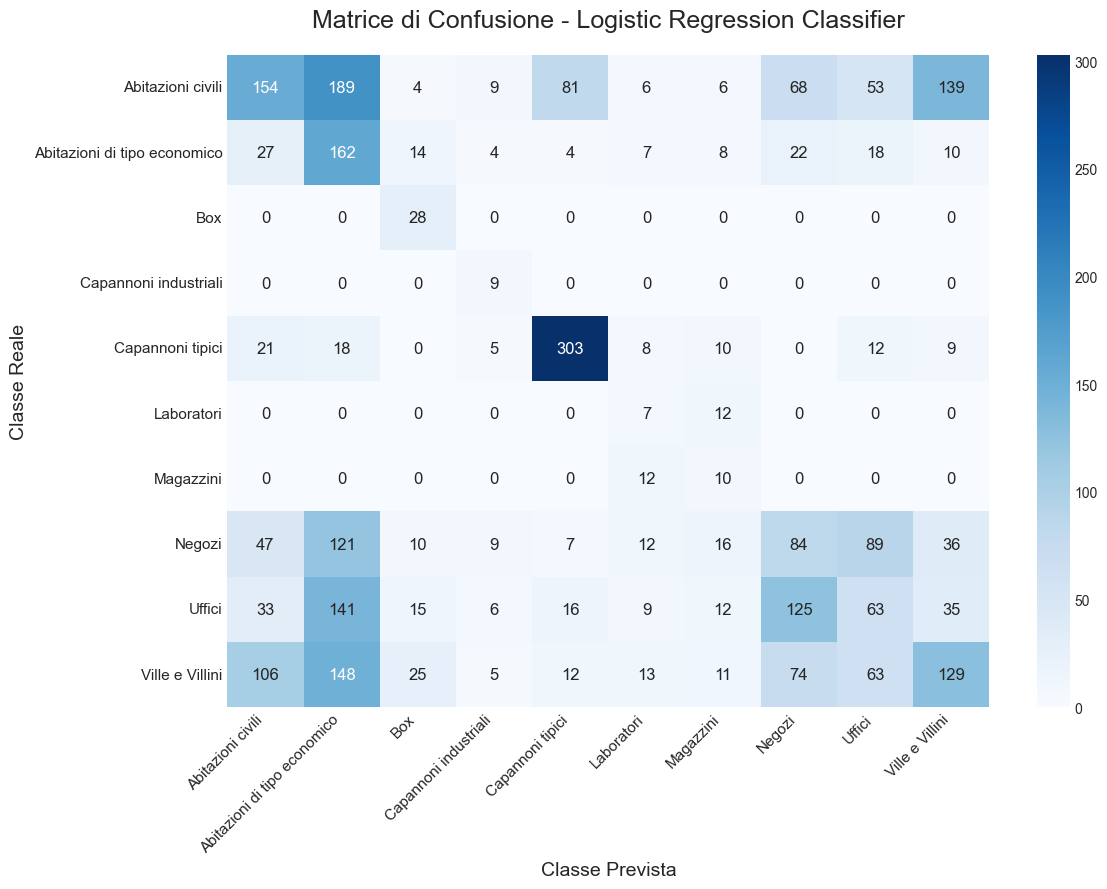


--- Random Forest Classifier ---
Accuracy: 0.1996
Classification Report:
                               precision    recall  f1-score   support

           Abitazioni civili       0.42      0.23      0.30       709
Abitazioni di tipo economico       0.02      0.04      0.02       276
                         Box       0.04      0.07      0.05        28
       Capannoni industriali       0.20      0.56      0.29         9
            Capannoni tipici       0.71      0.77      0.74       386
                  Laboratori       0.00      0.00      0.00        19
                   Magazzini       0.00      0.00      0.00        22
                      Negozi       0.05      0.05      0.05       431
                      Uffici       0.05      0.05      0.05       455
             Ville e Villini       0.16      0.10      0.13       586

                    accuracy                           0.20      2921
                   macro avg       0.16      0.19      0.16      2921
             

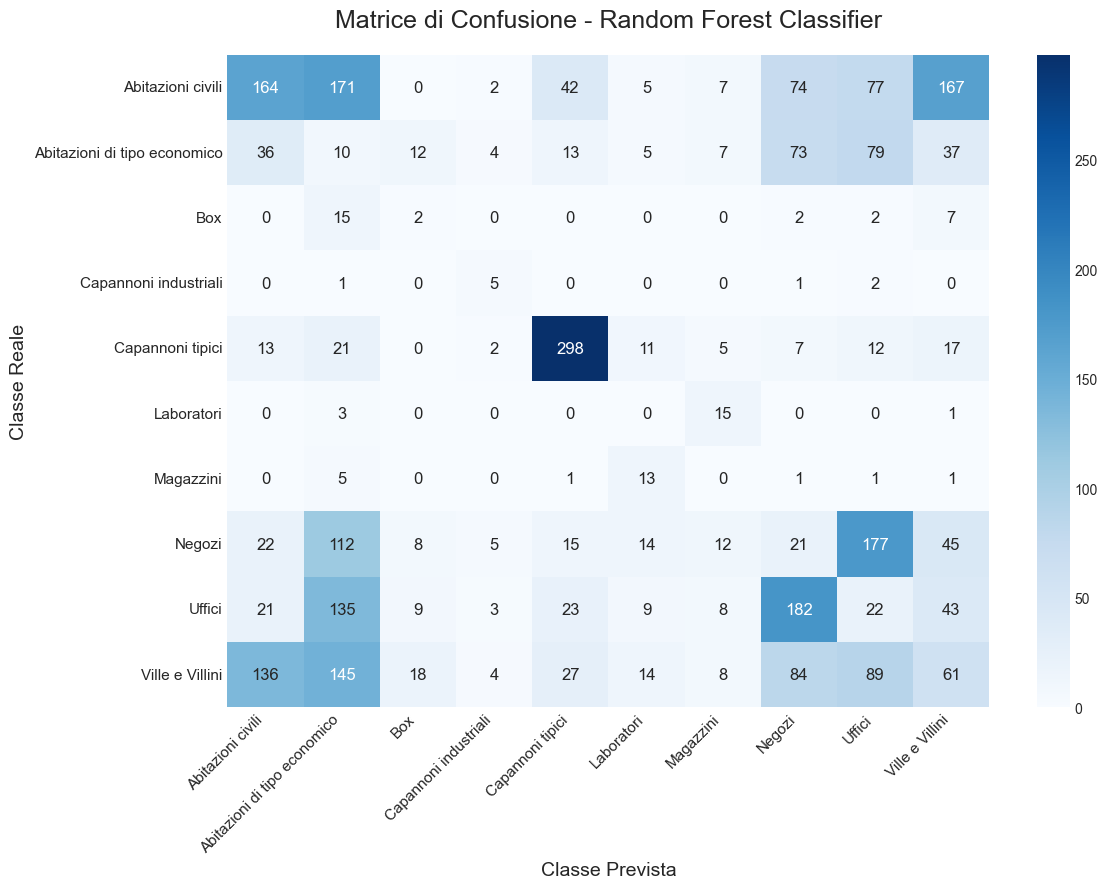

c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- LightGBM Classifier ---
Accuracy: 0.2390
Classification Report:
                               precision    recall  f1-score   support

           Abitazioni civili       0.32      0.32      0.32       709
Abitazioni di tipo economico       0.05      0.05      0.05       276
                         Box       0.02      0.04      0.03        28
       Capannoni industriali       0.21      0.56      0.30         9
            Capannoni tipici       0.76      0.76      0.76       386
                  Laboratori       0.00      0.00      0.00        19
                   Magazzini       0.00      0.00      0.00        22
                      Negozi       0.09      0.08      0.08       431
                      Uffici       0.08      0.06      0.07       455
             Ville e Villini       0.15      0.16      0.16       586

                    accuracy                           0.24      2921
                   macro avg       0.17      0.20      0.18      2921
                we

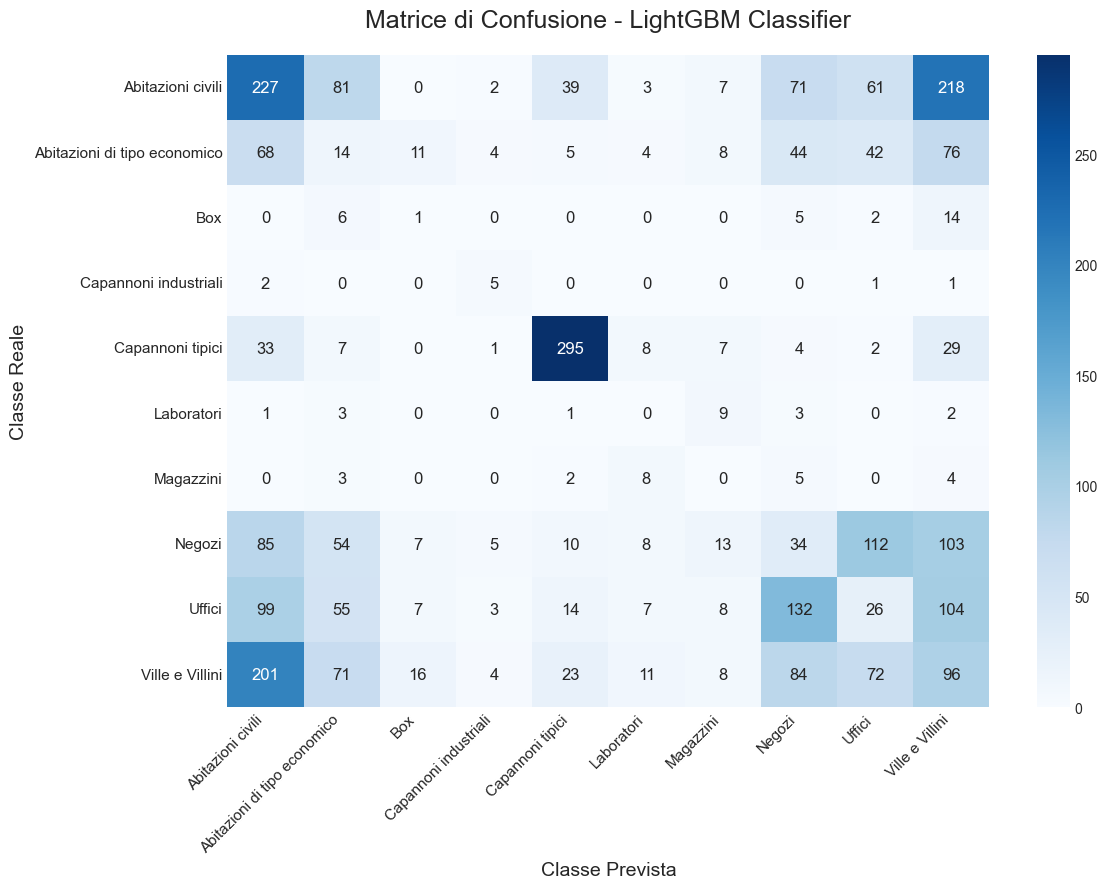

In [21]:
# --- ADDESTRAMENTO DI TUTTI I MODELLI DI CLASSIFICAZIONE BASE ---

print("\n" + "="*60)
print("MODELLI DI CLASSIFICAZIONE BASE (Previsione Tipologia dal file models.py)")
print("="*60)

# Lista dei modelli di classificazione da addestrare
modelli_class = ['logistic_regression', 'random_forest', 'lightgbm']

# Ciclo per addestrare e valutare ogni modello
for model_type in modelli_class:
    train_classification_model(
        X_train=X_train_class, 
        y_train=y_train_class, 
        X_test=X_test_class, 
        y_test=y_test_class,
        numerical_cols=numerical_cols,
        categorical_cols=categorical_cols,
        text_col_name=text_col_name,
        model_type=model_type
    )


## Rete neurale base

In [22]:
# --- ADDESTRAMENTO MODELLI PYTORCH BASE (da pytorch_models.py) ---
# Impostazioni generali
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Dispositivo utilizzato per PyTorch: {device}")


# ===================================================================
# 1. MODELLO DI REGRESSIONE (Previsione Prezzo)
# ===================================================================
print("\n" + "="*60)
print("RETE NEURALE DI REGRESSIONE (pytorch_models.py)")
print("="*60)

# 1.1 Preprocessing dei dati di regressione
preprocessor_reg = create_preprocessor(numerical_cols, categorical_cols, text_col_name)
X_train_reg_torch = preprocessor_reg.fit_transform(X_train_reg)
X_test_reg_torch = preprocessor_reg.transform(X_test_reg)
input_size_reg = X_train_reg_torch.shape[1]

# 1.2 Creazione Dataset e DataLoader
train_dataset_reg = TabularDataset(X_train_reg_torch, y_train_reg.values)
test_dataset_reg = TabularDataset(X_test_reg_torch, y_test_reg.values)
train_loader_reg = DataLoader(dataset=train_dataset_reg, batch_size=64, shuffle=True)
test_loader_reg = DataLoader(dataset=test_dataset_reg, batch_size=64, shuffle=False)

# 1.3 Inizializzazione e addestramento
model_reg_nn = RegressionNN(input_size=input_size_reg).to(device)
loss_fn_reg = nn.MSELoss()
optimizer_reg = torch.optim.Adam(model_reg_nn.parameters(), lr=0.001)

print("\n--- Inizio Addestramento Rete Neurale di Regressione ---")
for epoch in range(50): # Ridotto a 50 epoche per un'esecuzione più rapida
    loss = train_model(model_reg_nn, train_loader_reg, loss_fn_reg, optimizer_reg, device)
    if (epoch + 1) % 10 == 0:
        print(f"Epoca {epoch+1}/50, Loss: {loss:.4f}")

# 1.4 Valutazione
print("\n--- Valutazione Rete Neurale di Regressione ---")
mse_nn, r2_nn = evaluate_regression(model_reg_nn, test_loader_reg, device)
print(f"Mean Squared Error (MSE) sul test set: {mse_nn:.4f}")
print(f"R2 Score sul test set: {r2_nn:.4f}")

Dispositivo utilizzato per PyTorch: cpu

RETE NEURALE DI REGRESSIONE (pytorch_models.py)

--- Inizio Addestramento Rete Neurale di Regressione ---


c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([56])) that is different to the input size (torch.Size([56, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoca 10/50, Loss: 429951.3517
Epoca 20/50, Loss: 429292.6601
Epoca 30/50, Loss: 428618.9246
Epoca 40/50, Loss: 428444.6114
Epoca 50/50, Loss: 427977.6188

--- Valutazione Rete Neurale di Regressione ---
Mean Squared Error (MSE) sul test set: 373340.0625
R2 Score sul test set: 0.0175



RETE NEURALE DI CLASSIFICAZIONE (pytorch_models.py)
Trovate 10 classi: ['Abitazioni civili', 'Abitazioni di tipo economico', 'Box', 'Capannoni industriali', 'Capannoni tipici', 'Laboratori', 'Magazzini', 'Negozi', 'Uffici', 'Ville e Villini']

--- Inizio Addestramento Rete Neurale di Classificazione ---
Epoca 10/50, Loss: 1.2398
Epoca 20/50, Loss: 1.1701
Epoca 30/50, Loss: 1.1423
Epoca 40/50, Loss: 1.1251
Epoca 50/50, Loss: 1.1176

--- Valutazione Rete Neurale di Classificazione ---

--- Rete Neurale di Classificazione Base ---
Accuracy: 0.3372
Classification Report:
                               precision    recall  f1-score   support

           Abitazioni civili       0.41      0.27      0.33       709
Abitazioni di tipo economico       0.18      0.39      0.25       276
                         Box       0.31      0.39      0.34        28
       Capannoni industriali       1.00      0.56      0.71         9
            Capannoni tipici       0.83      0.78      0.81       386
   

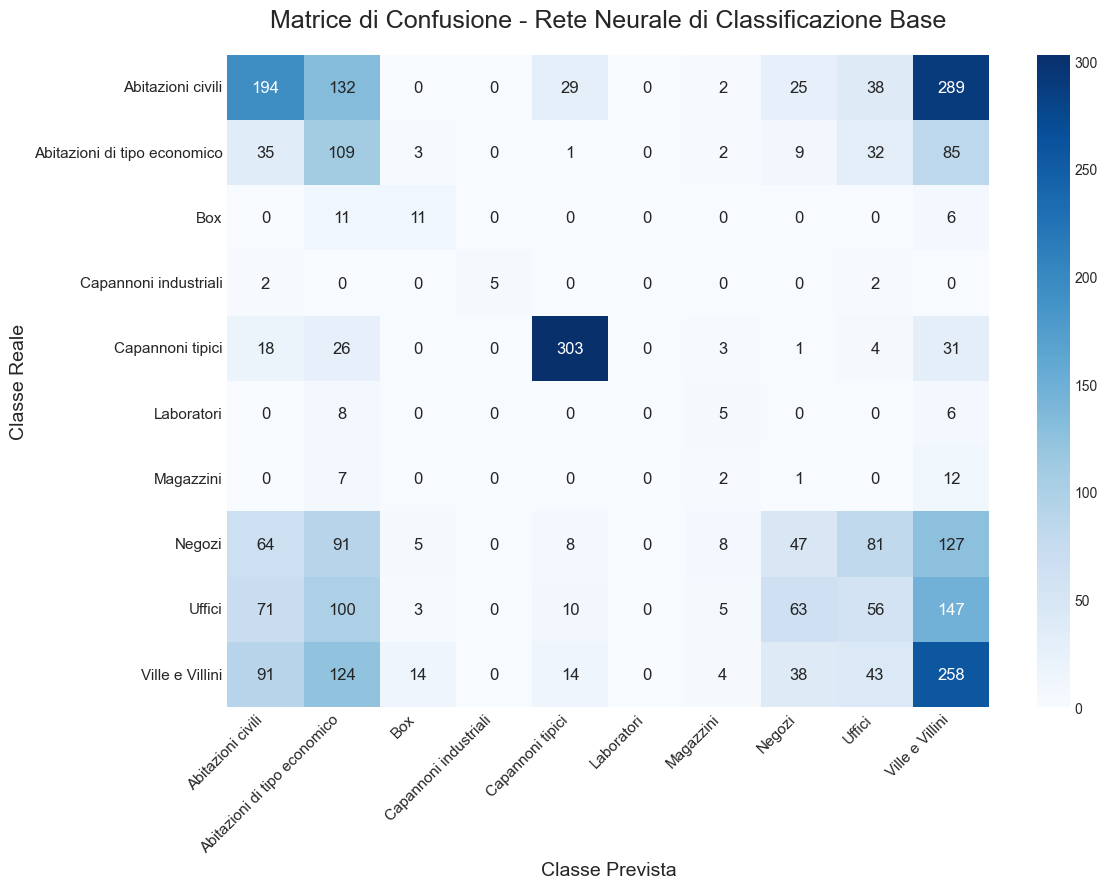

(0.33721328312221843,
 '                              precision    recall  f1-score   support\n\n           Abitazioni civili       0.41      0.27      0.33       709\nAbitazioni di tipo economico       0.18      0.39      0.25       276\n                         Box       0.31      0.39      0.34        28\n       Capannoni industriali       1.00      0.56      0.71         9\n            Capannoni tipici       0.83      0.78      0.81       386\n                  Laboratori       0.00      0.00      0.00        19\n                   Magazzini       0.06      0.09      0.08        22\n                      Negozi       0.26      0.11      0.15       431\n                      Uffici       0.22      0.12      0.16       455\n             Ville e Villini       0.27      0.44      0.33       586\n\n                    accuracy                           0.34      2921\n                   macro avg       0.35      0.32      0.32      2921\n                weighted avg       0.36      0.34

In [23]:
# =======================================================================
# 2. MODELLO DI CLASSIFICAZIONE (Previsione Tipologia)
# =======================================================================
print("\n" + "="*60)
print("RETE NEURALE DI CLASSIFICAZIONE (pytorch_models.py)")
print("="*60)

# 2.1 Preprocessing dei dati di classificazione
preprocessor_class = create_preprocessor(numerical_cols, categorical_cols, text_col_name)
X_train_class_torch = preprocessor_class.fit_transform(X_train_class)
X_test_class_torch = preprocessor_class.transform(X_test_class)
input_size_class = X_train_class_torch.shape[1]

# 2.2 Encoding delle etichette (da stringa a numero)
label_encoder = LabelEncoder()
y_train_class_enc = label_encoder.fit_transform(y_train_class)
y_test_class_enc = label_encoder.transform(y_test_class)
class_names = label_encoder.classes_
num_classes = len(class_names)
print(f"Trovate {num_classes} classi: {class_names.tolist()}")

# 2.3 Creazione Dataset e DataLoader
train_dataset_class = TabularDataset(X_train_class_torch, y_train_class_enc, is_classification=True)
test_dataset_class = TabularDataset(X_test_class_torch, y_test_class_enc, is_classification=True)
train_loader_class = DataLoader(dataset=train_dataset_class, batch_size=64, shuffle=True)
test_loader_class = DataLoader(dataset=test_dataset_class, batch_size=64, shuffle=False)

# 2.4 Inizializzazione e addestramento
model_class_nn = ClassificationNN(input_size=input_size_class, num_classes=num_classes).to(device)
loss_fn_class = nn.CrossEntropyLoss()
optimizer_class = torch.optim.Adam(model_class_nn.parameters(), lr=0.001)

print("\n--- Inizio Addestramento Rete Neurale di Classificazione ---")
for epoch in range(50):
    loss = train_model(model_class_nn, train_loader_class, loss_fn_class, optimizer_class, device)
    if (epoch + 1) % 10 == 0:
        print(f"Epoca {epoch+1}/50, Loss: {loss:.4f}")

# 2.5 Valutazione (la funzione aggiornata stamperà anche la matrice di confusione)
print("\n--- Valutazione Rete Neurale di Classificazione ---")

# --- CORREZIONE QUI ---
# Passiamo la lista completa delle classi, non un suo sottoinsieme.
evaluate_classification(
    model=model_class_nn, 
    data_loader=test_loader_class, 
    device=device,
    class_names=label_encoder.classes_, # <-- MODIFICA CHIAVE
    model_name="Rete Neurale di Classificazione Base"
)


## Tuning di tutti i modelli 

In [24]:
# --- TUNING DI TUTTI I MODELLI CLASSICI CON GRIDSEARCHCV ---
# ===================================================================
# 1. TUNING PER LA REGRESSIONE (Ridge, Random Forest, LightGBM)
# ===================================================================

# Definiamo le griglie di parametri per ogni modello di regressione
param_grids_reg = {
    'ridge': {
        'alpha': [0.1, 1.0, 10.0, 50.0, 100.0] # 'alpha' è il parametro di regolarizzazione per Ridge
    },
    'random_forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_leaf': [2, 4]
    },
    'lightgbm': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1],
        'num_leaves': [31, 40, 50]
    }
}

# Ciclo per avviare il tuning di ogni modello di regressione
for model_type, param_grid in param_grids_reg.items():
    print("\n" + "="*60)
    print(f"TUNING MODELLO DI REGRESSIONE: {model_type.upper()}")
    print("="*60)
    
    train_tuned_regression_model(
        X_train=X_train_reg, 
        y_train=y_train_reg,
        X_test=X_test_reg,
        y_test=y_test_reg,
        numerical_cols=numerical_cols, 
        categorical_cols=categorical_cols, 
        text_col_name=text_col_name,
        model_type=model_type,
        param_grid=param_grid,
        cv=3, 
        scoring='r2'
    )



TUNING MODELLO DI REGRESSIONE: RIDGE

--- Tuning Ridge Regression (Tuned) con GridSearchCV ---
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Migliori parametri trovati: {'regressor__alpha': 0.1}
Miglior punteggio CV (r2): 0.6572

--- Performance del miglior modello sul Test Set ---
Mean Squared Error (MSE): 133710.4094
R2 Score: 0.6481

TUNING MODELLO DI REGRESSIONE: RANDOM_FOREST

--- Tuning Random Forest Regressor (Tuned) con GridSearchCV ---
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Migliori parametri trovati: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 4, 'regressor__n_estimators': 200}
Miglior punteggio CV (r2): 0.7136

--- Performance del miglior modello sul Test Set ---
Mean Squared Error (MSE): 108918.2049
R2 Score: 0.7134

TUNING MODELLO DI REGRESSIONE: LIGHTGBM

--- Tuning LightGBM Regressor (Tuned) con GridSearchCV ---
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Migliori parametri trovati: {'regressor__lear

c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



TUNING MODELLO DI CLASSIFICAZIONE: LOGISTIC_REGRESSION

--- Tuning Logistic Regression Classifier (Tuned) con GridSearchCV ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Migliori parametri trovati: {'classifier__C': 10.0, 'classifier__penalty': 'l1'}
Miglior punteggio CV (f1_weighted): 0.3255

--- Valutazione del miglior modello sul Test Set ---
Accuracy sul Test Set: 0.3129
Classification Report sul Test Set:
                               precision    recall  f1-score   support

           Abitazioni civili       0.31      0.39      0.34       709
Abitazioni di tipo economico       0.18      0.19      0.18       276
                         Box       0.29      0.39      0.33        28
       Capannoni industriali       1.00      0.56      0.71         9
            Capannoni tipici       0.75      0.77      0.76       386
                  Laboratori       0.00      0.00      0.00        19
                   Magazzini       0.05      0.05      0.05        22
     

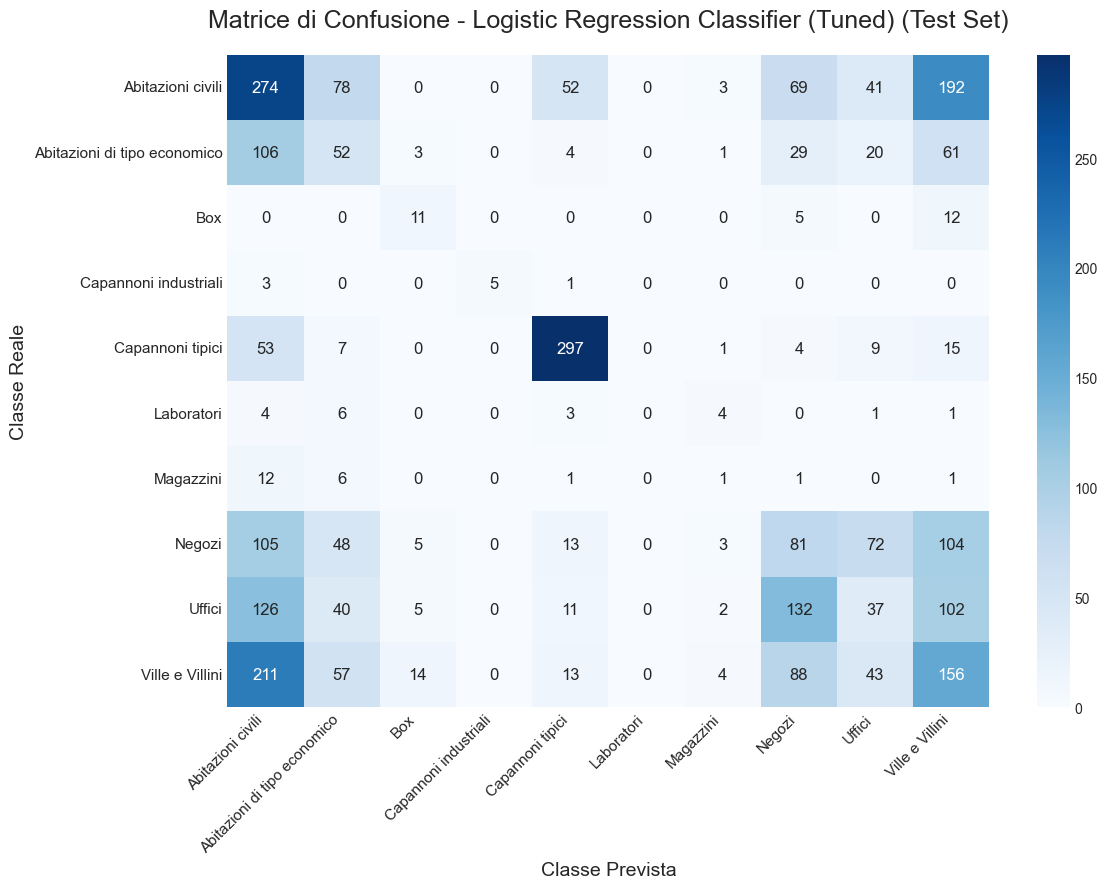


TUNING MODELLO DI CLASSIFICAZIONE: RANDOM_FOREST

--- Tuning Random Forest Classifier (Tuned) con GridSearchCV ---
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Migliori parametri trovati: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Miglior punteggio CV (f1_weighted): 0.3236

--- Valutazione del miglior modello sul Test Set ---
Accuracy sul Test Set: 0.3047
Classification Report sul Test Set:
                               precision    recall  f1-score   support

           Abitazioni civili       0.47      0.29      0.36       709
Abitazioni di tipo economico       0.18      0.64      0.28       276
                         Box       0.27      1.00      0.43        28
       Capannoni industriali       0.25      0.78      0.38         9
            Capannoni tipici       0.85      0.75      0.80       386
                  Laboratori       0.03      0.11      0.04        19
                   Magazzini       0

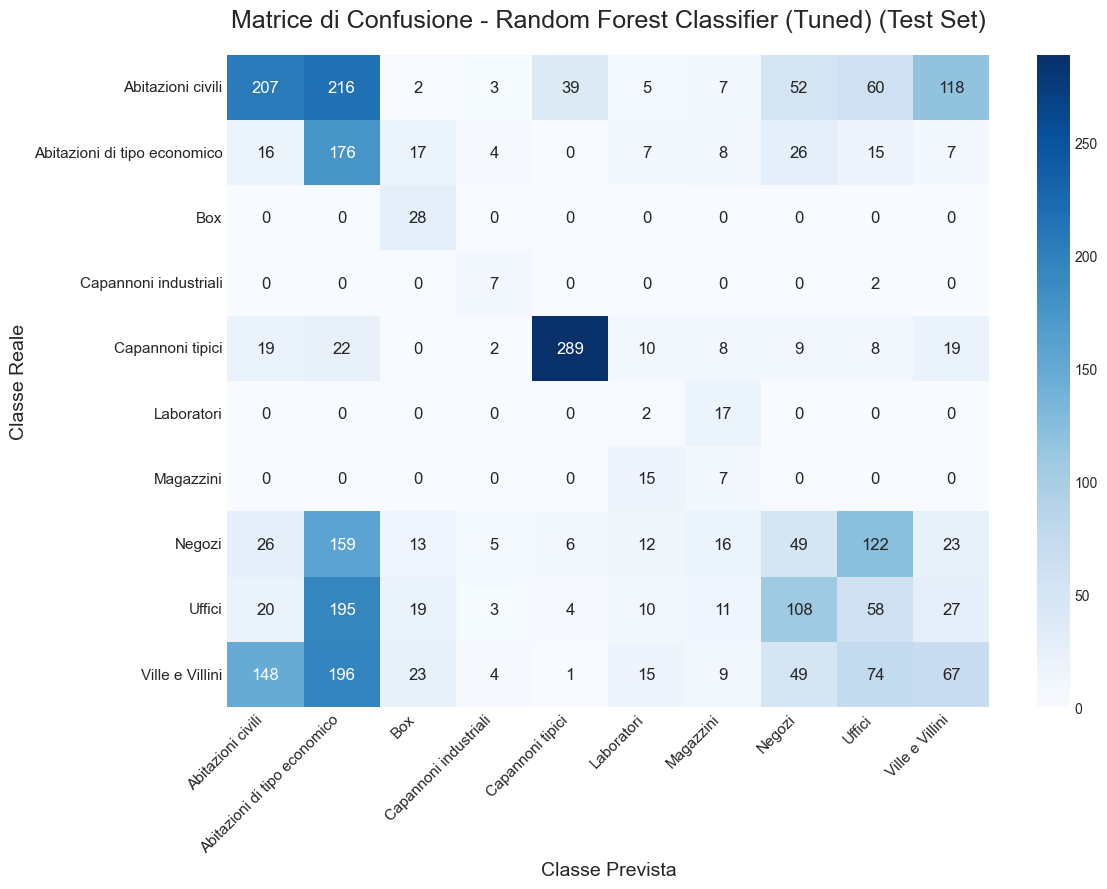


TUNING MODELLO DI CLASSIFICAZIONE: LIGHTGBM

--- Tuning LightGBM Classifier (Tuned) con GridSearchCV ---
Fitting 3 folds for each of 16 candidates, totalling 48 fits

Migliori parametri trovati: {'classifier__class_weight': 'balanced', 'classifier__learning_rate': 0.05, 'classifier__n_estimators': 100, 'classifier__num_leaves': 31}
Miglior punteggio CV (f1_weighted): 0.3410

--- Valutazione del miglior modello sul Test Set ---


c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy sul Test Set: 0.3427
Classification Report sul Test Set:
                               precision    recall  f1-score   support

           Abitazioni civili       0.67      0.27      0.39       709
Abitazioni di tipo economico       0.21      0.71      0.32       276
                         Box       0.29      1.00      0.46        28
       Capannoni industriali       0.28      1.00      0.44         9
            Capannoni tipici       0.74      0.83      0.78       386
                  Laboratori       0.02      0.11      0.04        19
                   Magazzini       0.09      0.27      0.13        22
                      Negozi       0.20      0.17      0.19       431
                      Uffici       0.21      0.17      0.19       455
             Ville e Villini       0.42      0.16      0.24       586

                    accuracy                           0.34      2921
                   macro avg       0.31      0.47      0.32      2921
                weigh

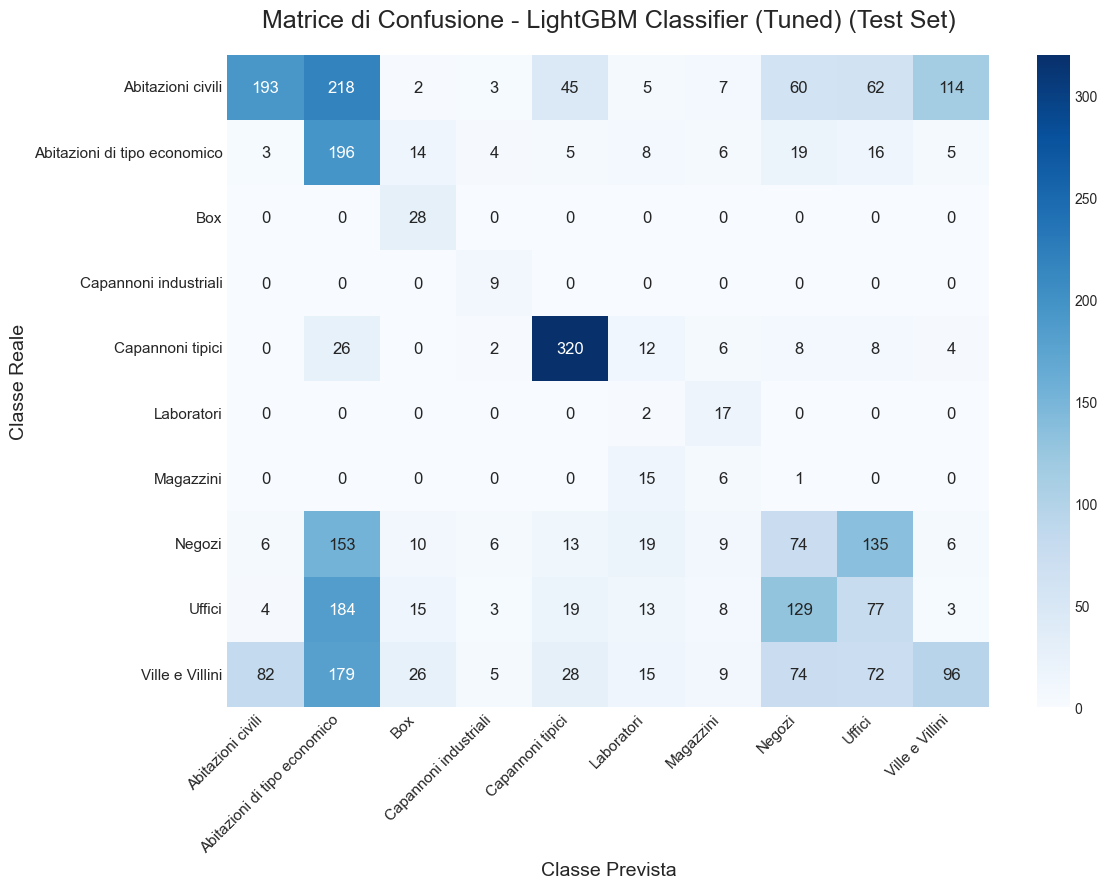

In [25]:
# =======================================================================
# 2. TUNING PER LA CLASSIFICAZIONE (Logistic, Random Forest, LightGBM)
# =======================================================================

# Definiamo le griglie di parametri per ogni modello di classificazione
param_grids_class = {
    'logistic_regression': {
        'C': [0.1, 1.0, 10.0], # 'C' è l'inverso della forza di regolarizzazione
        'penalty': ['l1', 'l2']
    },
    'random_forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'class_weight': ['balanced', None]
    },
    'lightgbm': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'num_leaves': [31, 40],
        'class_weight': ['balanced', None]
    }
}

# Ciclo per avviare il tuning di ogni modello di classificazione
for model_type, param_grid in param_grids_class.items():
    print("\n" + "="*60)
    print(f"TUNING MODELLO DI CLASSIFICAZIONE: {model_type.upper()}")
    print("="*60)
    
    train_tuned_classification_model(
        X_train=X_train_class, 
        y_train=y_train_class,
        X_test=X_test_class,
        y_test=y_test_class,
        numerical_cols=numerical_cols, 
        categorical_cols=categorical_cols, 
        text_col_name=text_col_name,
        model_type=model_type,
        param_grid=param_grid,
        cv=3,
        scoring='f1_weighted'
    )

## Tuning rete neurale

In [26]:
# --- POTENZIAMENTO E TUNING DELLA RETE NEURALE (v2) ---

# Riusiamo i dati già preprocessati e splittati dalle celle precedenti
# (X_train_reg_torch, X_test_reg_torch, ecc.)

# --- REGRESSIONE: TUNING MANUALE ---
print("\n" + "="*50)
print("TUNING RETE NEURALE DI REGRESSIONE (v2)")
print("="*50)

# Iperparametri da testare
learning_rates = [0.001, 0.0005]
dropout_rates = [0.3, 0.5]
best_r2_reg = -1
best_params_reg_nn = {}

for lr in learning_rates:
    for dr in dropout_rates:
        print(f"\nTraining con LR={lr}, Dropout={dr}")
        
        # Inizializzazione
        model_reg_v2 = RegressionNN_v2(input_size=input_size_reg, dropout_rate=dr).to(device)
        loss_fn_reg = nn.MSELoss()
        optimizer_reg = torch.optim.Adam(model_reg_v2.parameters(), lr=lr)

        # Addestramento con più epoche
        for epoch in range(100):  # Aumentato a 100 epoche per un training più robusto
            print(f"Epoca {epoch+1}/100")
            train_model(model_reg_v2, train_loader_reg, loss_fn_reg, optimizer_reg, device)

        # Valutazione
        mse, r2 = evaluate_regression(model_reg_v2, test_loader_reg, device)
        print(f"Risultato: R2={r2:.4f}, MSE={mse:.4f}")

        if r2 > best_r2_reg:
            best_r2_reg = r2
            best_params_reg_nn = {'learning_rate': lr, 'dropout_rate': dr}

print("\n--- Risultati Tuning Regressione NN ---")
print(f"Miglior R2 Score: {best_r2_reg:.4f}")
print(f"Migliori Iperparametri: {best_params_reg_nn}")


TUNING RETE NEURALE DI REGRESSIONE (v2)

Training con LR=0.001, Dropout=0.3
Epoca 1/100


c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([56])) that is different to the input size (torch.Size([56, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoca 2/100
Epoca 3/100
Epoca 4/100
Epoca 5/100
Epoca 6/100
Epoca 7/100
Epoca 8/100
Epoca 9/100
Epoca 10/100
Epoca 11/100
Epoca 12/100
Epoca 13/100
Epoca 14/100
Epoca 15/100
Epoca 16/100
Epoca 17/100
Epoca 18/100
Epoca 19/100
Epoca 20/100
Epoca 21/100
Epoca 22/100
Epoca 23/100
Epoca 24/100
Epoca 25/100
Epoca 26/100
Epoca 27/100
Epoca 28/100
Epoca 29/100
Epoca 30/100
Epoca 31/100
Epoca 32/100
Epoca 33/100
Epoca 34/100
Epoca 35/100
Epoca 36/100
Epoca 37/100
Epoca 38/100
Epoca 39/100
Epoca 40/100
Epoca 41/100
Epoca 42/100
Epoca 43/100
Epoca 44/100
Epoca 45/100
Epoca 46/100
Epoca 47/100
Epoca 48/100
Epoca 49/100
Epoca 50/100
Epoca 51/100
Epoca 52/100
Epoca 53/100
Epoca 54/100
Epoca 55/100
Epoca 56/100
Epoca 57/100
Epoca 58/100
Epoca 59/100
Epoca 60/100
Epoca 61/100
Epoca 62/100
Epoca 63/100
Epoca 64/100
Epoca 65/100
Epoca 66/100
Epoca 67/100
Epoca 68/100
Epoca 69/100
Epoca 70/100
Epoca 71/100
Epoca 72/100
Epoca 73/100
Epoca 74/100
Epoca 75/100
Epoca 76/100
Epoca 77/100
Epoca 78/100
Epoca 7

c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([56])) that is different to the input size (torch.Size([56, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoca 2/100
Epoca 3/100
Epoca 4/100
Epoca 5/100
Epoca 6/100
Epoca 7/100
Epoca 8/100
Epoca 9/100
Epoca 10/100
Epoca 11/100
Epoca 12/100
Epoca 13/100
Epoca 14/100
Epoca 15/100
Epoca 16/100
Epoca 17/100
Epoca 18/100
Epoca 19/100
Epoca 20/100
Epoca 21/100
Epoca 22/100
Epoca 23/100
Epoca 24/100
Epoca 25/100
Epoca 26/100
Epoca 27/100
Epoca 28/100
Epoca 29/100
Epoca 30/100
Epoca 31/100
Epoca 32/100
Epoca 33/100
Epoca 34/100
Epoca 35/100
Epoca 36/100
Epoca 37/100
Epoca 38/100
Epoca 39/100
Epoca 40/100
Epoca 41/100
Epoca 42/100
Epoca 43/100
Epoca 44/100
Epoca 45/100
Epoca 46/100
Epoca 47/100
Epoca 48/100
Epoca 49/100
Epoca 50/100
Epoca 51/100
Epoca 52/100
Epoca 53/100
Epoca 54/100
Epoca 55/100
Epoca 56/100
Epoca 57/100
Epoca 58/100
Epoca 59/100
Epoca 60/100
Epoca 61/100
Epoca 62/100
Epoca 63/100
Epoca 64/100
Epoca 65/100
Epoca 66/100
Epoca 67/100
Epoca 68/100
Epoca 69/100
Epoca 70/100
Epoca 71/100
Epoca 72/100
Epoca 73/100
Epoca 74/100
Epoca 75/100
Epoca 76/100
Epoca 77/100
Epoca 78/100
Epoca 7

c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([56])) that is different to the input size (torch.Size([56, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoca 2/100
Epoca 3/100
Epoca 4/100
Epoca 5/100
Epoca 6/100
Epoca 7/100
Epoca 8/100
Epoca 9/100
Epoca 10/100
Epoca 11/100
Epoca 12/100
Epoca 13/100
Epoca 14/100
Epoca 15/100
Epoca 16/100
Epoca 17/100
Epoca 18/100
Epoca 19/100
Epoca 20/100
Epoca 21/100
Epoca 22/100
Epoca 23/100
Epoca 24/100
Epoca 25/100
Epoca 26/100
Epoca 27/100
Epoca 28/100
Epoca 29/100
Epoca 30/100
Epoca 31/100
Epoca 32/100
Epoca 33/100
Epoca 34/100
Epoca 35/100
Epoca 36/100
Epoca 37/100
Epoca 38/100
Epoca 39/100
Epoca 40/100
Epoca 41/100
Epoca 42/100
Epoca 43/100
Epoca 44/100
Epoca 45/100
Epoca 46/100
Epoca 47/100
Epoca 48/100
Epoca 49/100
Epoca 50/100
Epoca 51/100
Epoca 52/100
Epoca 53/100
Epoca 54/100
Epoca 55/100
Epoca 56/100
Epoca 57/100
Epoca 58/100
Epoca 59/100
Epoca 60/100
Epoca 61/100
Epoca 62/100
Epoca 63/100
Epoca 64/100
Epoca 65/100
Epoca 66/100
Epoca 67/100
Epoca 68/100
Epoca 69/100
Epoca 70/100
Epoca 71/100
Epoca 72/100
Epoca 73/100
Epoca 74/100
Epoca 75/100
Epoca 76/100
Epoca 77/100
Epoca 78/100
Epoca 7

c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([56])) that is different to the input size (torch.Size([56, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoca 2/100
Epoca 3/100
Epoca 4/100
Epoca 5/100
Epoca 6/100
Epoca 7/100
Epoca 8/100
Epoca 9/100
Epoca 10/100
Epoca 11/100
Epoca 12/100
Epoca 13/100
Epoca 14/100
Epoca 15/100
Epoca 16/100
Epoca 17/100
Epoca 18/100
Epoca 19/100
Epoca 20/100
Epoca 21/100
Epoca 22/100
Epoca 23/100
Epoca 24/100
Epoca 25/100
Epoca 26/100
Epoca 27/100
Epoca 28/100
Epoca 29/100
Epoca 30/100
Epoca 31/100
Epoca 32/100
Epoca 33/100
Epoca 34/100
Epoca 35/100
Epoca 36/100
Epoca 37/100
Epoca 38/100
Epoca 39/100
Epoca 40/100
Epoca 41/100
Epoca 42/100
Epoca 43/100
Epoca 44/100
Epoca 45/100
Epoca 46/100
Epoca 47/100
Epoca 48/100
Epoca 49/100
Epoca 50/100
Epoca 51/100
Epoca 52/100
Epoca 53/100
Epoca 54/100
Epoca 55/100
Epoca 56/100
Epoca 57/100
Epoca 58/100
Epoca 59/100
Epoca 60/100
Epoca 61/100
Epoca 62/100
Epoca 63/100
Epoca 64/100
Epoca 65/100
Epoca 66/100
Epoca 67/100
Epoca 68/100
Epoca 69/100
Epoca 70/100
Epoca 71/100
Epoca 72/100
Epoca 73/100
Epoca 74/100
Epoca 75/100
Epoca 76/100
Epoca 77/100
Epoca 78/100
Epoca 7


TUNING RETE NEURALE DI CLASSIFICAZIONE (v2)

Training con LR=0.001, Dropout=0.3
Epoca 1/100
Epoca 2/100
Epoca 3/100
Epoca 4/100
Epoca 5/100
Epoca 6/100
Epoca 7/100
Epoca 8/100
Epoca 9/100
Epoca 10/100
Epoca 11/100
Epoca 12/100
Epoca 13/100
Epoca 14/100
Epoca 15/100
Epoca 16/100
Epoca 17/100
Epoca 18/100
Epoca 19/100
Epoca 20/100
Epoca 21/100
Epoca 22/100
Epoca 23/100
Epoca 24/100
Epoca 25/100
Epoca 26/100
Epoca 27/100
Epoca 28/100
Epoca 29/100
Epoca 30/100
Epoca 31/100
Epoca 32/100
Epoca 33/100
Epoca 34/100
Epoca 35/100
Epoca 36/100
Epoca 37/100
Epoca 38/100
Epoca 39/100
Epoca 40/100
Epoca 41/100
Epoca 42/100
Epoca 43/100
Epoca 44/100
Epoca 45/100
Epoca 46/100
Epoca 47/100
Epoca 48/100
Epoca 49/100
Epoca 50/100
Epoca 51/100
Epoca 52/100
Epoca 53/100
Epoca 54/100
Epoca 55/100
Epoca 56/100
Epoca 57/100
Epoca 58/100
Epoca 59/100
Epoca 60/100
Epoca 61/100
Epoca 62/100
Epoca 63/100
Epoca 64/100
Epoca 65/100
Epoca 66/100
Epoca 67/100
Epoca 68/100
Epoca 69/100
Epoca 70/100
Epoca 71/100
Epoca

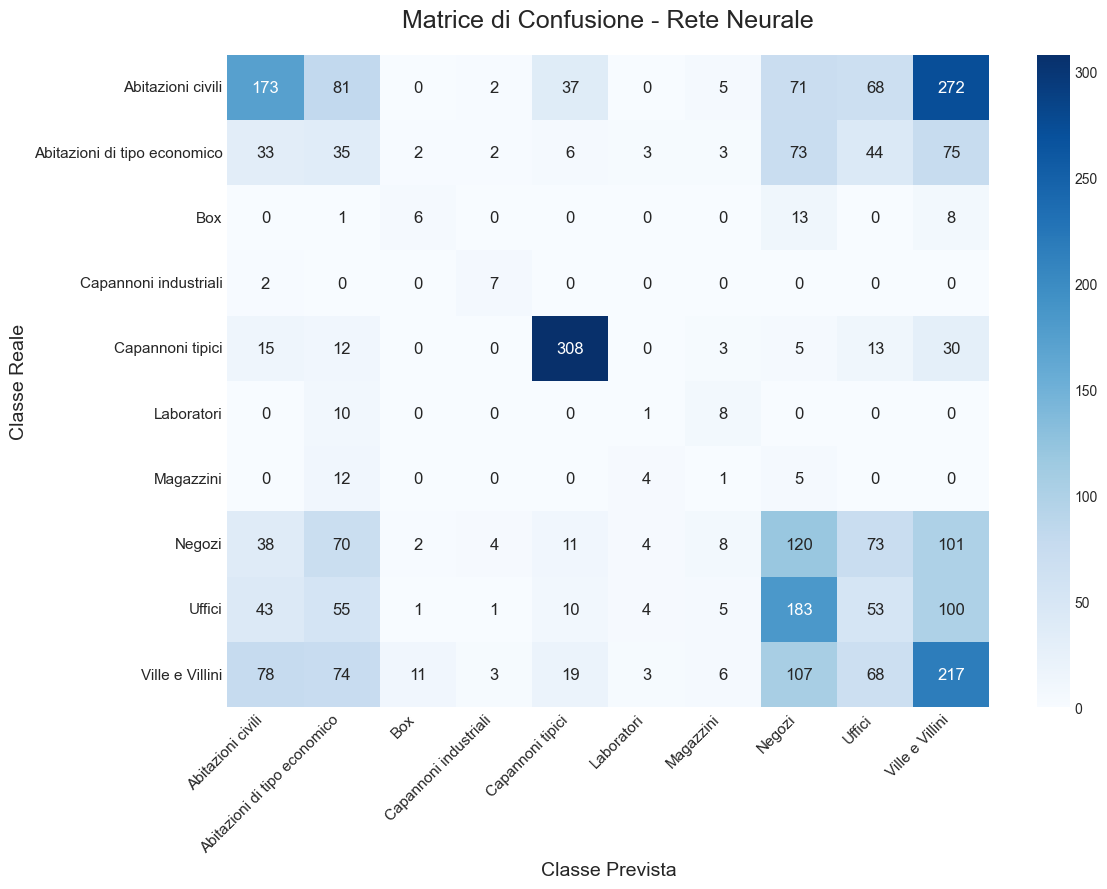

Risultato: Accuracy=0.3153

Training con LR=0.001, Dropout=0.5
Epoca 1/100
Epoca 2/100
Epoca 3/100
Epoca 4/100
Epoca 5/100
Epoca 6/100
Epoca 7/100
Epoca 8/100
Epoca 9/100
Epoca 10/100
Epoca 11/100
Epoca 12/100
Epoca 13/100
Epoca 14/100
Epoca 15/100
Epoca 16/100
Epoca 17/100
Epoca 18/100
Epoca 19/100
Epoca 20/100
Epoca 21/100
Epoca 22/100
Epoca 23/100
Epoca 24/100
Epoca 25/100
Epoca 26/100
Epoca 27/100
Epoca 28/100
Epoca 29/100
Epoca 30/100
Epoca 31/100
Epoca 32/100
Epoca 33/100
Epoca 34/100
Epoca 35/100
Epoca 36/100
Epoca 37/100
Epoca 38/100
Epoca 39/100
Epoca 40/100
Epoca 41/100
Epoca 42/100
Epoca 43/100
Epoca 44/100
Epoca 45/100
Epoca 46/100
Epoca 47/100
Epoca 48/100
Epoca 49/100
Epoca 50/100
Epoca 51/100
Epoca 52/100
Epoca 53/100
Epoca 54/100
Epoca 55/100
Epoca 56/100
Epoca 57/100
Epoca 58/100
Epoca 59/100
Epoca 60/100
Epoca 61/100
Epoca 62/100
Epoca 63/100
Epoca 64/100
Epoca 65/100
Epoca 66/100
Epoca 67/100
Epoca 68/100
Epoca 69/100
Epoca 70/100
Epoca 71/100
Epoca 72/100
Epoca 73/1

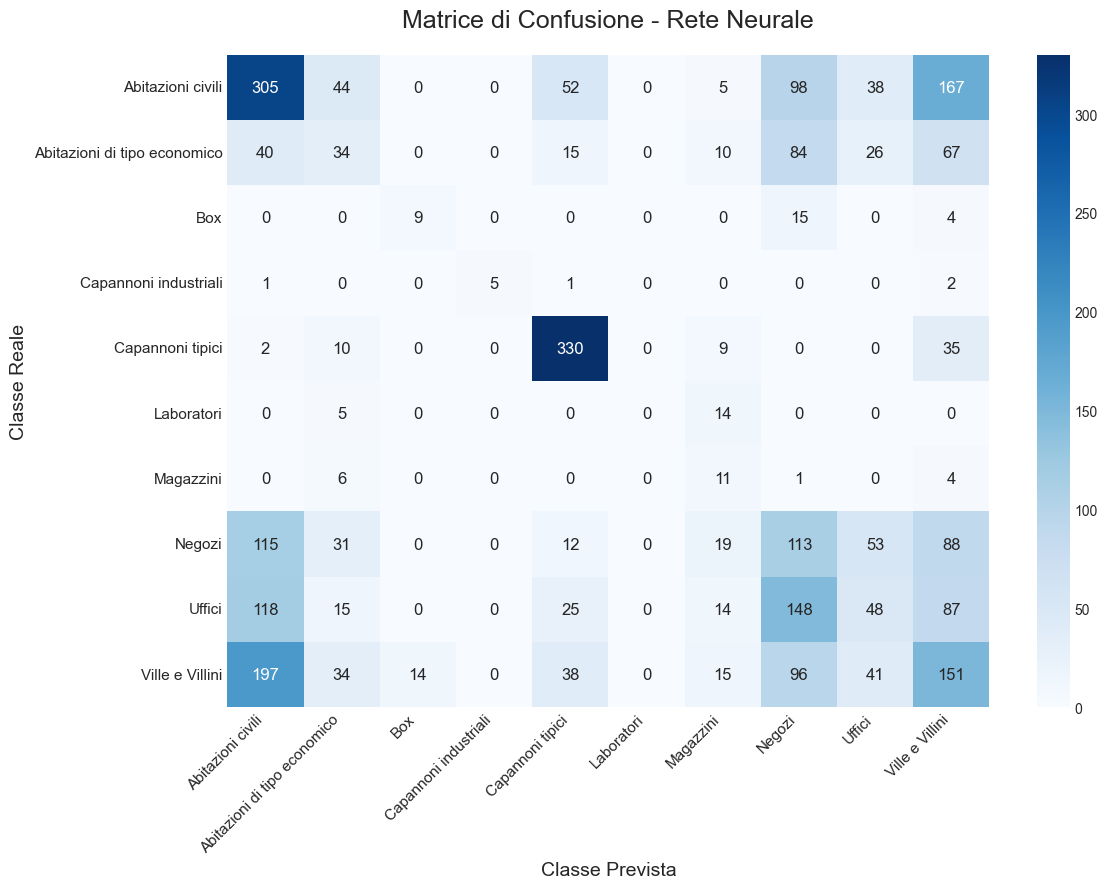

Risultato: Accuracy=0.3444

Training con LR=0.0005, Dropout=0.3
Epoca 1/100
Epoca 2/100
Epoca 3/100
Epoca 4/100
Epoca 5/100
Epoca 6/100
Epoca 7/100
Epoca 8/100
Epoca 9/100
Epoca 10/100
Epoca 11/100
Epoca 12/100
Epoca 13/100
Epoca 14/100
Epoca 15/100
Epoca 16/100
Epoca 17/100
Epoca 18/100
Epoca 19/100
Epoca 20/100
Epoca 21/100
Epoca 22/100
Epoca 23/100
Epoca 24/100
Epoca 25/100
Epoca 26/100
Epoca 27/100
Epoca 28/100
Epoca 29/100
Epoca 30/100
Epoca 31/100
Epoca 32/100
Epoca 33/100
Epoca 34/100
Epoca 35/100
Epoca 36/100
Epoca 37/100
Epoca 38/100
Epoca 39/100
Epoca 40/100
Epoca 41/100
Epoca 42/100
Epoca 43/100
Epoca 44/100
Epoca 45/100
Epoca 46/100
Epoca 47/100
Epoca 48/100
Epoca 49/100
Epoca 50/100
Epoca 51/100
Epoca 52/100
Epoca 53/100
Epoca 54/100
Epoca 55/100
Epoca 56/100
Epoca 57/100
Epoca 58/100
Epoca 59/100
Epoca 60/100
Epoca 61/100
Epoca 62/100
Epoca 63/100
Epoca 64/100
Epoca 65/100
Epoca 66/100
Epoca 67/100
Epoca 68/100
Epoca 69/100
Epoca 70/100
Epoca 71/100
Epoca 72/100
Epoca 73/

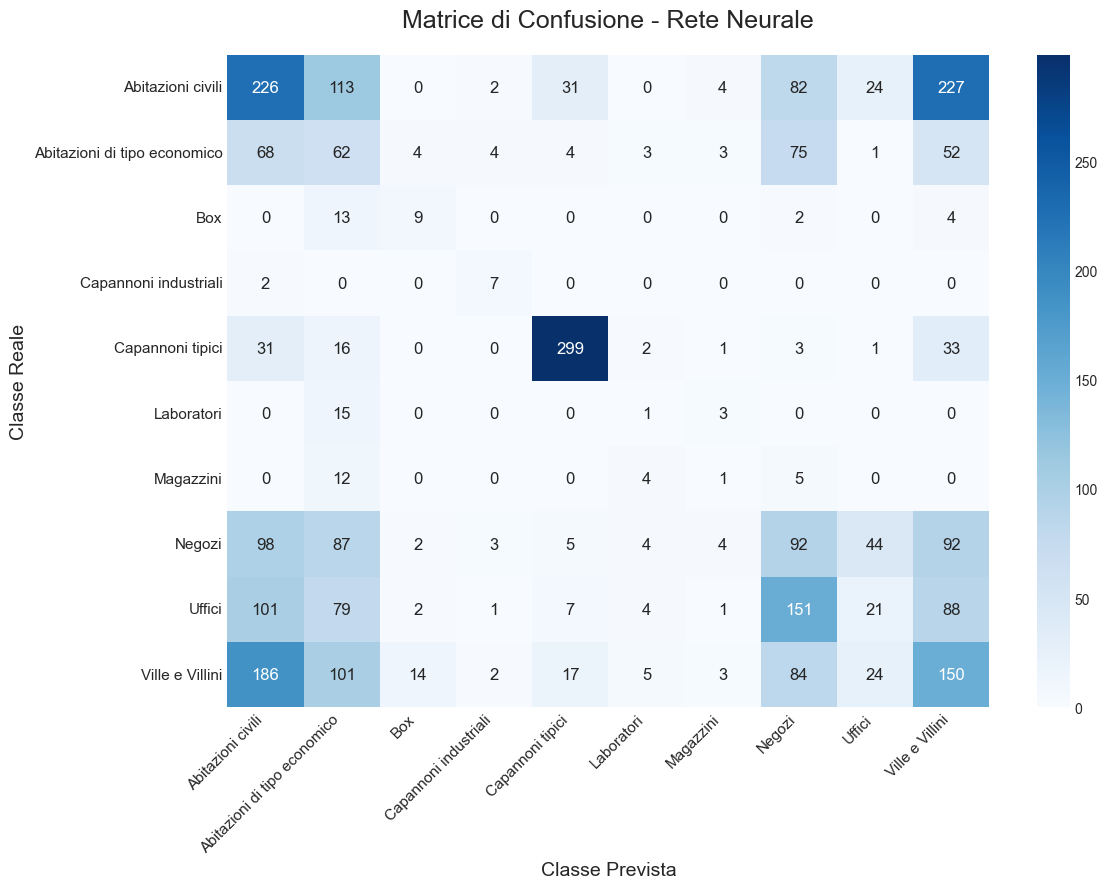

Risultato: Accuracy=0.2972

Training con LR=0.0005, Dropout=0.5
Epoca 1/100
Epoca 2/100
Epoca 3/100
Epoca 4/100
Epoca 5/100
Epoca 6/100
Epoca 7/100
Epoca 8/100
Epoca 9/100
Epoca 10/100
Epoca 11/100
Epoca 12/100
Epoca 13/100
Epoca 14/100
Epoca 15/100
Epoca 16/100
Epoca 17/100
Epoca 18/100
Epoca 19/100
Epoca 20/100
Epoca 21/100
Epoca 22/100
Epoca 23/100
Epoca 24/100
Epoca 25/100
Epoca 26/100
Epoca 27/100
Epoca 28/100
Epoca 29/100
Epoca 30/100
Epoca 31/100
Epoca 32/100
Epoca 33/100
Epoca 34/100
Epoca 35/100
Epoca 36/100
Epoca 37/100
Epoca 38/100
Epoca 39/100
Epoca 40/100
Epoca 41/100
Epoca 42/100
Epoca 43/100
Epoca 44/100
Epoca 45/100
Epoca 46/100
Epoca 47/100
Epoca 48/100
Epoca 49/100
Epoca 50/100
Epoca 51/100
Epoca 52/100
Epoca 53/100
Epoca 54/100
Epoca 55/100
Epoca 56/100
Epoca 57/100
Epoca 58/100
Epoca 59/100
Epoca 60/100
Epoca 61/100
Epoca 62/100
Epoca 63/100
Epoca 64/100
Epoca 65/100
Epoca 66/100
Epoca 67/100
Epoca 68/100
Epoca 69/100
Epoca 70/100
Epoca 71/100
Epoca 72/100
Epoca 73/

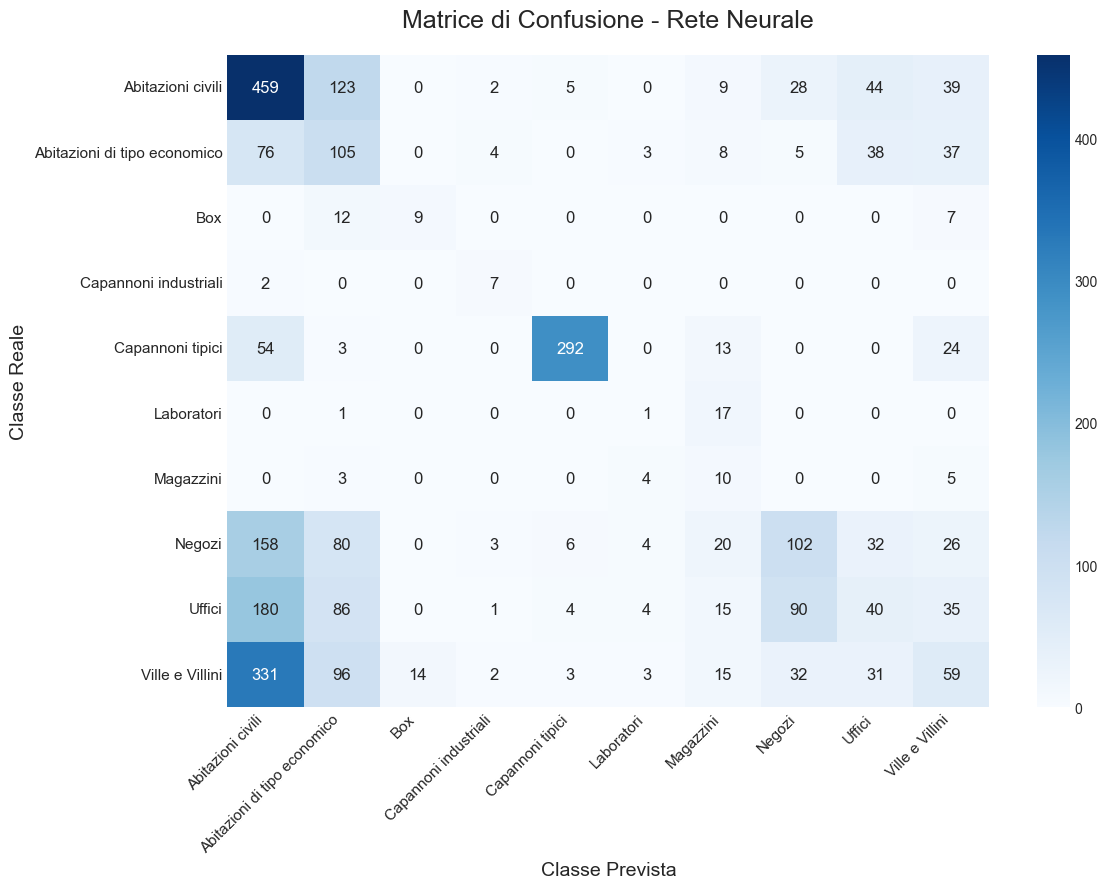

Risultato: Accuracy=0.3711

--- Risultati Tuning Classificazione NN ---
Miglior Accuracy: 0.3711
Migliori Iperparametri: {'learning_rate': 0.0005, 'dropout_rate': 0.5}


In [27]:
# --- CLASSIFICAZIONE: TUNING MANUALE ---
print("\n" + "="*50)
print("TUNING RETE NEURALE DI CLASSIFICAZIONE (v2)")
print("="*50)

best_acc_class = -1
best_params_class_nn = {}

for lr in learning_rates:
    for dr in dropout_rates:
        print(f"\nTraining con LR={lr}, Dropout={dr}")
        
        # Inizializzazione
        model_class_v2 = ClassificationNN_v2(input_size=input_size_class, num_classes=num_classes, dropout_rate=dr).to(device)
        loss_fn_class = nn.CrossEntropyLoss()
        optimizer_class = torch.optim.Adam(model_class_v2.parameters(), lr=lr)

        # Addestramento
        for epoch in range(100):
            print(f"Epoca {epoch+1}/100")
            # Aumentiamo le epoche per un training più robusto
            train_model(model_class_v2, train_loader_class, loss_fn_class, optimizer_class, device)

        # Valutazione
        acc, _ = evaluate_classification(model_class_v2, test_loader_class, device, class_names)
        print(f"Risultato: Accuracy={acc:.4f}")

        if acc > best_acc_class:
            best_acc_class = acc
            best_params_class_nn = {'learning_rate': lr, 'dropout_rate': dr}

print("\n--- Risultati Tuning Classificazione NN ---")
print(f"Miglior Accuracy: {best_acc_class:.4f}")
print(f"Migliori Iperparametri: {best_params_class_nn}")

### Data pre-processing per classificazione - miglioramento risultati

In [28]:
# --- PREPARAZIONE DATI SPECIFICA PER IL MODELLO DI CLASSIFICAZIONE ---

print("Preparo i dati per la classificazione...")

# 1. PREPROCESSING DELLE FEATURE (usa i dati splittati per la classificazione)
preprocessor_class = create_preprocessor(numerical_cols, categorical_cols, text_col_name)
X_train_class_torch = preprocessor_class.fit_transform(X_train_class)
X_test_class_torch = preprocessor_class.transform(X_test_class)
input_size_class = X_train_class_torch.shape[1] # <-- Definizione di input_size_class

# 2. LABEL ENCODING DEL TARGET
# Le reti neurali richiedono target numerici, quindi convertiamo le stringhe (es. 'Abitazioni') in numeri (0, 1, 2...)
label_encoder = LabelEncoder()
y_train_class_enc = label_encoder.fit_transform(y_train_class)
y_test_class_enc = label_encoder.transform(y_test_class)
num_classes = len(label_encoder.classes_)

# 3. CREAZIONE DEI DATALOADER
BATCH_SIZE = 64
train_dataset_class = TabularDataset(X_train_class_torch, y_train_class_enc, is_classification=True)
test_dataset_class = TabularDataset(X_test_class_torch, y_test_class_enc, is_classification=True)

# <-- Definizione di train_loader_class e test_loader_class
train_loader_class = DataLoader(dataset=train_dataset_class, batch_size=BATCH_SIZE, shuffle=True)
test_loader_class = DataLoader(dataset=test_dataset_class, batch_size=BATCH_SIZE, shuffle=False)

print("\nDati per la classificazione pronti.")
print(f"Input size: {input_size_class}, Numero di classi: {num_classes}")

Preparo i dati per la classificazione...

Dati per la classificazione pronti.
Input size: 215, Numero di classi: 10


A causa della disparità presente tra le classi ne sono state aggregate alcune...

In [29]:
print(df_class.columns)

Index(['zona_val', 'linkzona', 'cod_tip', 'target_class', 'stato', 'compr_min',
       'compr_max', 'loc_min', 'loc_max', 'sup_nl_loc', 'semestre',
       'zona_descr', 'zona_zone', 'cod_tip_prev', 'descr_tip_prev',
       'microzona', 'prezzo_medio_mq', 'zona', 'locazione_media_mq',
       'periodo_num', 'fascia', 'comune_descrizione', 'stato_prev',
       'comune_istat', 'comune_cat', 'comune_amm'],
      dtype='object')


In [30]:
print(y_class.value_counts())

target_class
Abitazioni civili               2815
Ville e Villini                 2474
Uffici                          1713
Negozi                          1711
Capannoni tipici                1544
Abitazioni di tipo economico    1122
Box                              110
Magazzini                         81
Laboratori                        71
Capannoni industriali             40
Name: count, dtype: int64


In [31]:
# --- AGGREGAZIONE PERSONALIZZATA E RI-ADDESTRAMENTO DI TUTTI I MODELLI BASE ---
# 1. DEFINIZIONE DELLA NUOVA MAPPATURA PERSONALIZZATA
mapping_tipologie_personalizzato = {
    'Abitazioni civili': 'Abitazioni civili',
    'Ville e Villini': 'Ville e Villini',
    'Uffici': 'Uffici/Negozi/Economico',
    'Negozi': 'Uffici/Negozi/Economico',
    'Abitazioni di tipo economico': 'Uffici/Negozi/Economico',
    'Capannoni tipici': 'Industriale',
    'Capannoni industriali': 'Industriale',
    'Box': 'Box/Magazzini/Laboratori',
    'Magazzini': 'Box/Magazzini/Laboratori',
    'Laboratori': 'Box/Magazzini/Laboratori'
}

# 2. APPLICAZIONE DELLA MAPPATURA
# Usiamo il DataFrame 'df_class' creato in precedenza
df_class_pers = df_class.copy()
df_class_pers['target_class_agg'] = df_class_pers['target_class'].map(mapping_tipologie_personalizzato)
df_class_pers.dropna(subset=['target_class_agg'], inplace=True)

print("Distribuzione delle nuove 5 tipologie aggregate:")
print(df_class_pers['target_class_agg'].value_counts())
print("-" * 50)

# 3. SUDDIVISIONE DEI DATI CON IL NUOVO TARGET
features = numerical_cols + categorical_cols + [text_col_name]
X_class_pers = df_class_pers[features]
y_class_pers = df_class_pers['target_class_agg']

X_train_pers, X_test_pers, y_train_pers, y_test_pers = train_test_split(
    X_class_pers, y_class_pers, 
    test_size=0.25, 
    random_state=42,
    stratify=y_class_pers
)


Distribuzione delle nuove 5 tipologie aggregate:
target_class_agg
Uffici/Negozi/Economico     4546
Abitazioni civili           2815
Ville e Villini             2474
Industriale                 1584
Box/Magazzini/Laboratori     262
Name: count, dtype: int64
--------------------------------------------------



RI-ADDESTRAMENTO MODELLI BASE (CON 5 CLASSI AGGREGATE)

--- Logistic Regression Classifier ---
Accuracy: 0.5389
Classification Report:
                           precision    recall  f1-score   support

       Abitazioni civili       0.49      0.22      0.30       704
Box/Magazzini/Laboratori       0.28      1.00      0.44        65
             Industriale       0.74      0.83      0.78       396
 Uffici/Negozi/Economico       0.58      0.77      0.66      1137
         Ville e Villini       0.36      0.23      0.28       619

                accuracy                           0.54      2921
               macro avg       0.49      0.61      0.49      2921
            weighted avg       0.52      0.54      0.51      2921



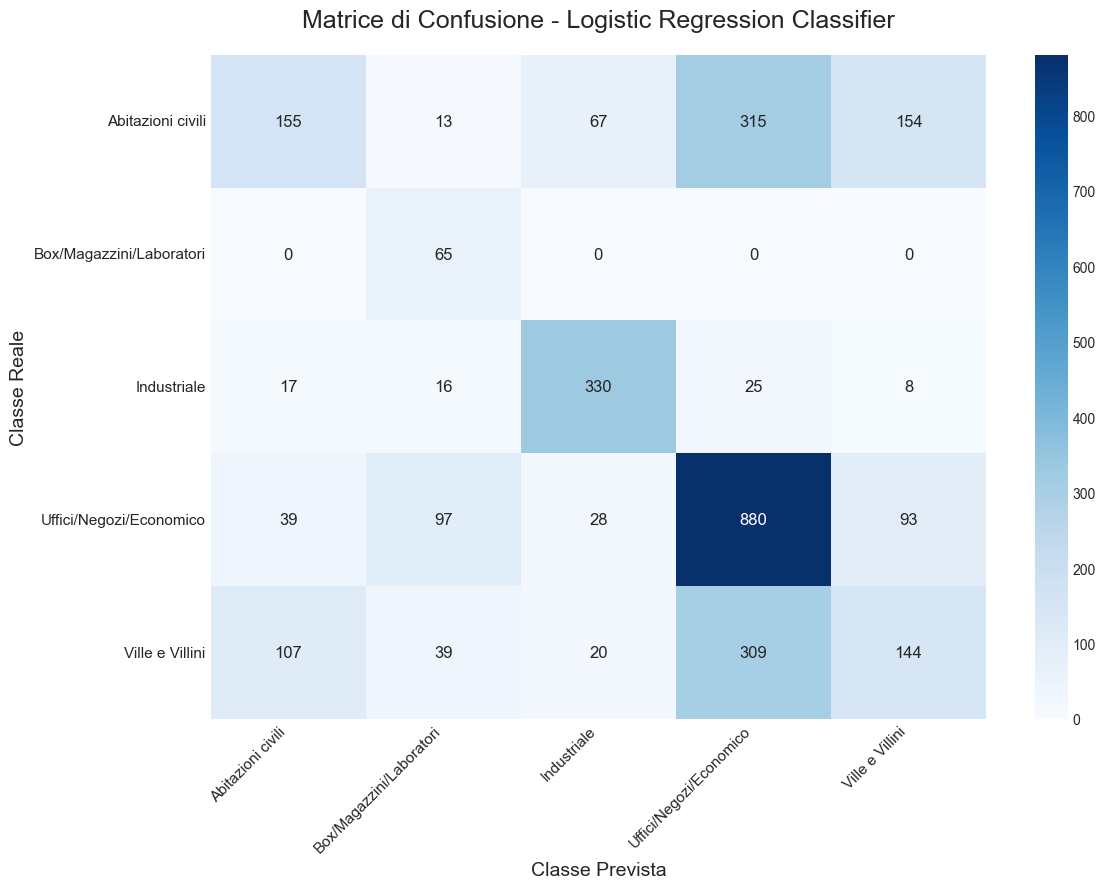


--- Random Forest Classifier ---
Accuracy: 0.3605
Classification Report:
                           precision    recall  f1-score   support

       Abitazioni civili       0.24      0.20      0.22       704
Box/Magazzini/Laboratori       0.18      0.49      0.26        65
             Industriale       0.65      0.78      0.71       396
 Uffici/Negozi/Economico       0.47      0.44      0.45      1137
         Ville e Villini       0.12      0.11      0.12       619

                accuracy                           0.36      2921
               macro avg       0.33      0.41      0.35      2921
            weighted avg       0.36      0.36      0.36      2921



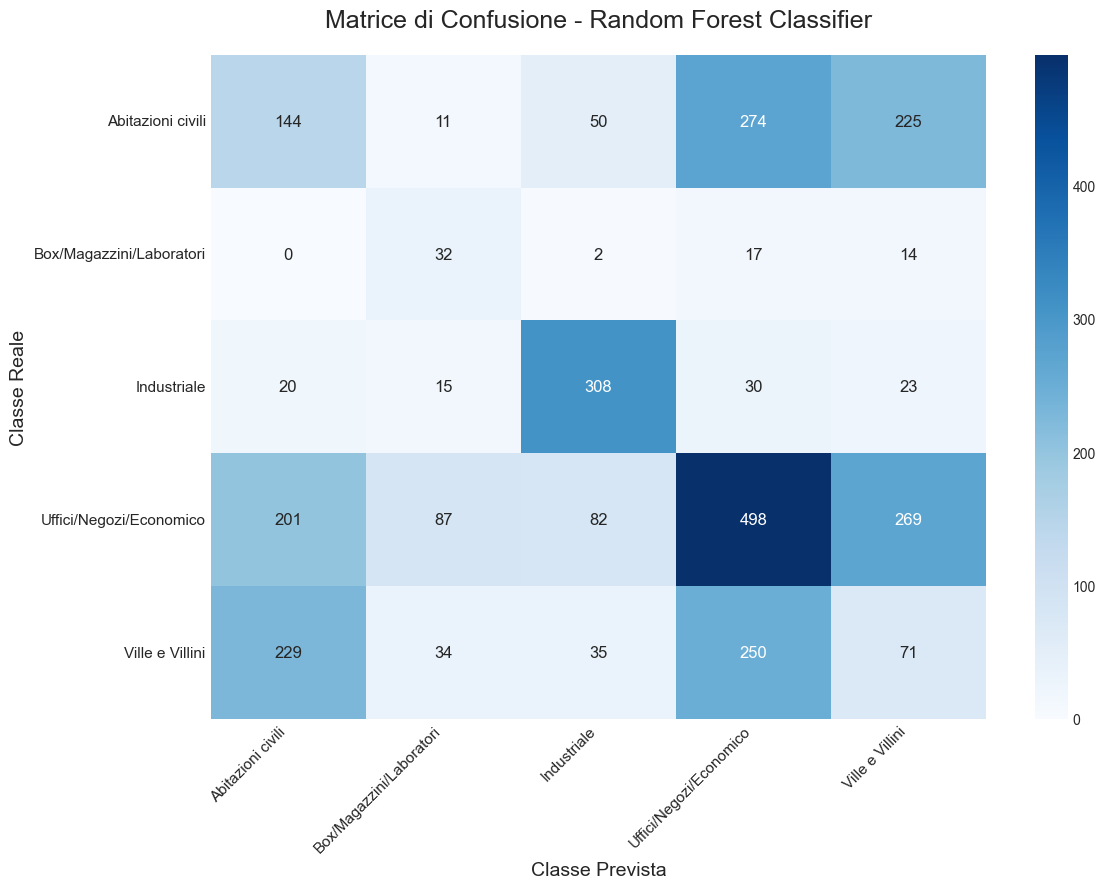

c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- LightGBM Classifier ---
Accuracy: 0.5484
Classification Report:
                           precision    recall  f1-score   support

       Abitazioni civili       0.47      0.26      0.34       704
Box/Magazzini/Laboratori       0.09      0.08      0.08        65
             Industriale       0.80      0.77      0.78       396
 Uffici/Negozi/Economico       0.56      0.90      0.69      1137
         Ville e Villini       0.33      0.14      0.20       619

                accuracy                           0.55      2921
               macro avg       0.45      0.43      0.42      2921
            weighted avg       0.51      0.55      0.50      2921



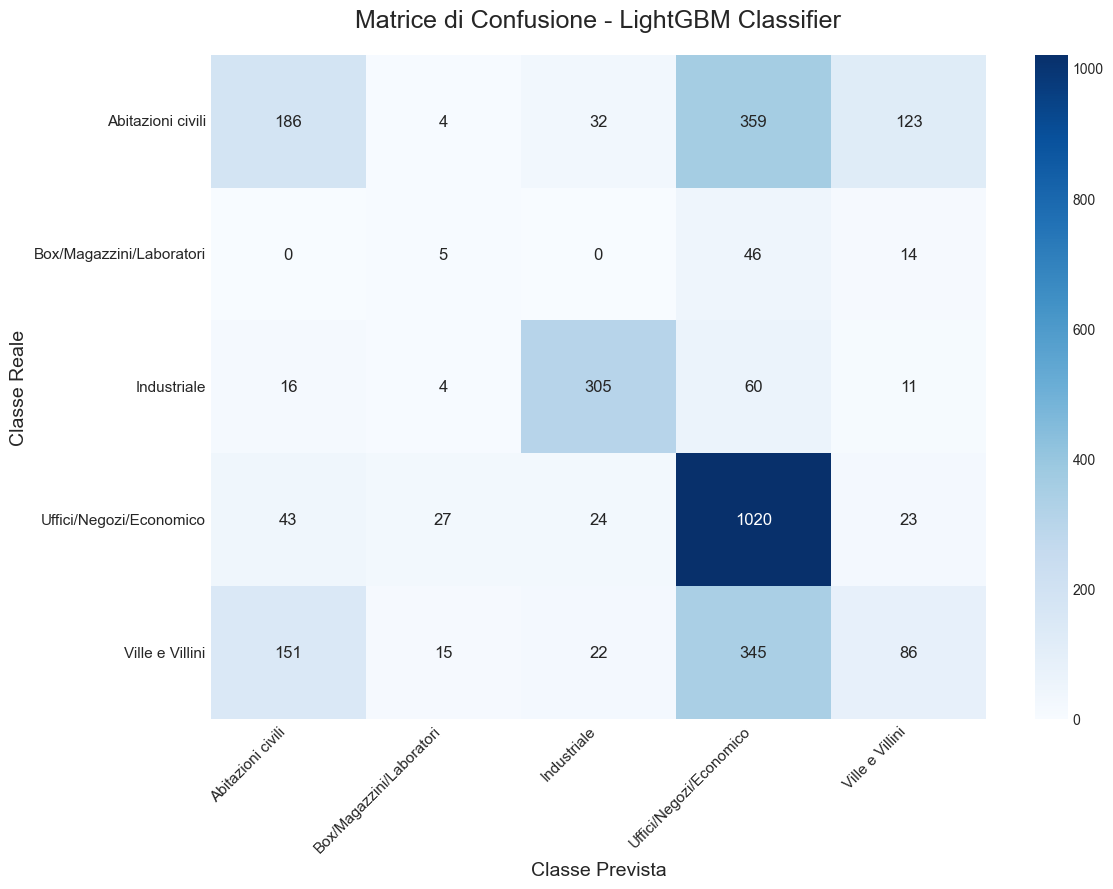

In [32]:
# 4. RI-ADDESTRAMENTO DI TUTTI I MODELLI DI CLASSIFICAZIONE BASE
print("\n" + "="*60)
print("RI-ADDESTRAMENTO MODELLI BASE (CON 5 CLASSI AGGREGATE)")
print("="*60)

# Lista dei modelli di classificazione da addestrare
modelli_class_base = ['logistic_regression', 'random_forest', 'lightgbm']

# Ciclo per addestrare e valutare ogni modello sui nuovi dati aggregati
for model_type in modelli_class_base:
    train_classification_model(
        X_train=X_train_pers, 
        y_train=y_train_pers, 
        X_test=X_test_pers, 
        y_test=y_test_pers,
        numerical_cols=numerical_cols,
        categorical_cols=categorical_cols,
        text_col_name=text_col_name,
        model_type=model_type
    )


RI-ADDESTRAMENTO RETE NEURALE BASE (CON 5 CLASSI AGGREGATE)
Numero di nuove classi: 5 - ['Abitazioni civili', 'Box/Magazzini/Laboratori', 'Industriale', 'Uffici/Negozi/Economico', 'Ville e Villini']

--- Inizio Addestramento Rete Neurale Base (5 Classi Aggregate) ---
Epoca 10/50, Loss: 0.8398
Epoca 20/50, Loss: 0.8011
Epoca 30/50, Loss: 0.7866
Epoca 40/50, Loss: 0.7777
Epoca 50/50, Loss: 0.7720

--- Valutazione Rete Neurale Base (5 Classi Aggregate) ---

--- Rete Neurale Base (5 Classi) ---
Accuracy: 0.5892
Classification Report:
                           precision    recall  f1-score   support

       Abitazioni civili       0.58      0.25      0.35       704
Box/Magazzini/Laboratori       0.55      0.28      0.37        65
             Industriale       0.87      0.78      0.82       396
 Uffici/Negozi/Economico       0.55      0.96      0.70      1137
         Ville e Villini       0.49      0.21      0.29       619

                accuracy                           0.59      292

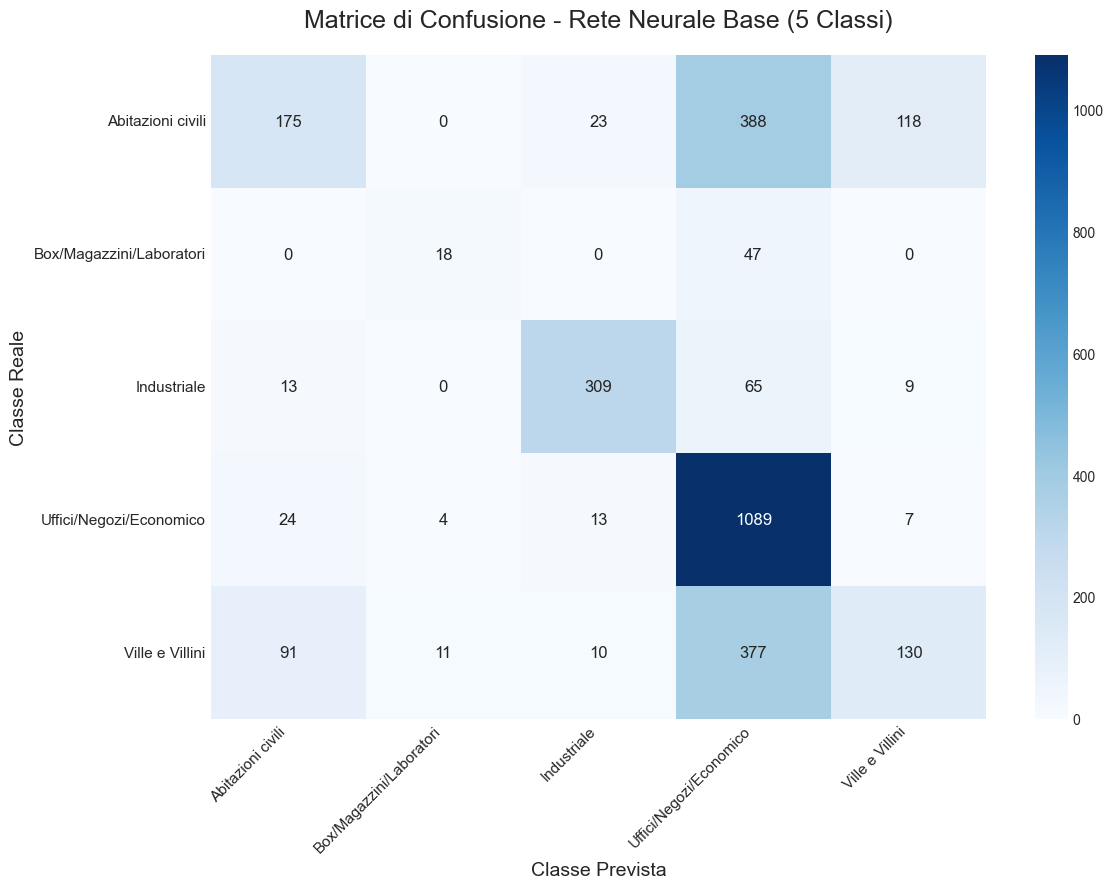

(0.5891817870592263,
 '                          precision    recall  f1-score   support\n\n       Abitazioni civili       0.58      0.25      0.35       704\nBox/Magazzini/Laboratori       0.55      0.28      0.37        65\n             Industriale       0.87      0.78      0.82       396\n Uffici/Negozi/Economico       0.55      0.96      0.70      1137\n         Ville e Villini       0.49      0.21      0.29       619\n\n                accuracy                           0.59      2921\n               macro avg       0.61      0.49      0.51      2921\n            weighted avg       0.59      0.59      0.54      2921\n')

In [33]:
# --- RI-ADDESTRAMENTO RETE NEURALE BASE (CON 5 CLASSI AGGREGATE) ---

print("\n" + "="*60)
print("RI-ADDESTRAMENTO RETE NEURALE BASE (CON 5 CLASSI AGGREGATE)")
print("="*60)

# 1. Preprocessing (invariato)
preprocessor_pers = create_preprocessor(numerical_cols, categorical_cols, text_col_name)
X_train_pers_torch = preprocessor_pers.fit_transform(X_train_pers)
X_test_pers_torch = preprocessor_pers.transform(X_test_pers)
input_size_pers = X_train_pers_torch.shape[1]

# 2. Label Encoding (invariato)
label_encoder_pers = LabelEncoder()
y_train_pers_enc = label_encoder_pers.fit_transform(y_train_pers)
y_test_pers_enc = label_encoder_pers.transform(y_test_pers)
class_names_pers = label_encoder_pers.classes_
num_classes_pers = len(class_names_pers)
print(f"Numero di nuove classi: {num_classes_pers} - {class_names_pers.tolist()}")

# 3. DataLoaders (invariato)
train_dataset_pers = TabularDataset(X_train_pers_torch, y_train_pers_enc, is_classification=True)
test_dataset_pers = TabularDataset(X_test_pers_torch, y_test_pers_enc, is_classification=True)
train_loader_pers = DataLoader(dataset=train_dataset_pers, batch_size=64, shuffle=True)
test_loader_pers = DataLoader(dataset=test_dataset_pers, batch_size=64, shuffle=False)

# 4. Inizializzazione e addestramento
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- CORREZIONE QUI: Usiamo ClassificationNN (il modello base) ---
model_class_pers_nn = ClassificationNN(input_size=input_size_pers, num_classes=num_classes_pers).to(device)
# ----------------------------------------------------------------

loss_fn_pers = nn.CrossEntropyLoss()
optimizer_pers = torch.optim.Adam(model_class_pers_nn.parameters(), lr=0.001) # Usiamo un learning rate standard

print("\n--- Inizio Addestramento Rete Neurale Base (5 Classi Aggregate) ---")
for epoch in range(50): # 50 epoche sono un buon punto di partenza
    loss = train_model(model_class_pers_nn, train_loader_pers, loss_fn_pers, optimizer_pers, device)
    if (epoch + 1) % 10 == 0:
        print(f"Epoca {epoch+1}/50, Loss: {loss:.4f}")

# 5. Valutazione 
# --- CORREZIONE QUI: La funzione evaluate_classification fa già tutto ---
print("\n--- Valutazione Rete Neurale Base (5 Classi Aggregate) ---")
evaluate_classification(
    model=model_class_pers_nn, 
    data_loader=test_loader_pers, 
    device=device,
    class_names=class_names_pers,
    model_name="Rete Neurale Base (5 Classi)"
)


## Riaddestramento modelli tuned 


TUNING MODELLO LOGISTIC_REGRESSION (CON 5 CLASSI AGGREGATE)

--- Tuning Logistic Regression Classifier (Tuned) con GridSearchCV ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Migliori parametri trovati: {'classifier__C': 10.0, 'classifier__penalty': 'l1'}
Miglior punteggio CV (f1_weighted): 0.5240

--- Valutazione del miglior modello sul Test Set ---
Accuracy sul Test Set: 0.5676
Classification Report sul Test Set:
                           precision    recall  f1-score   support

       Abitazioni civili       0.51      0.25      0.34       704
Box/Magazzini/Laboratori       0.20      0.12      0.15        65
             Industriale       0.81      0.79      0.80       396
 Uffici/Negozi/Economico       0.55      0.92      0.69      1137
         Ville e Villini       0.46      0.19      0.27       619

                accuracy                           0.57      2921
               macro avg       0.51      0.45      0.45      2921
            weighted avg       

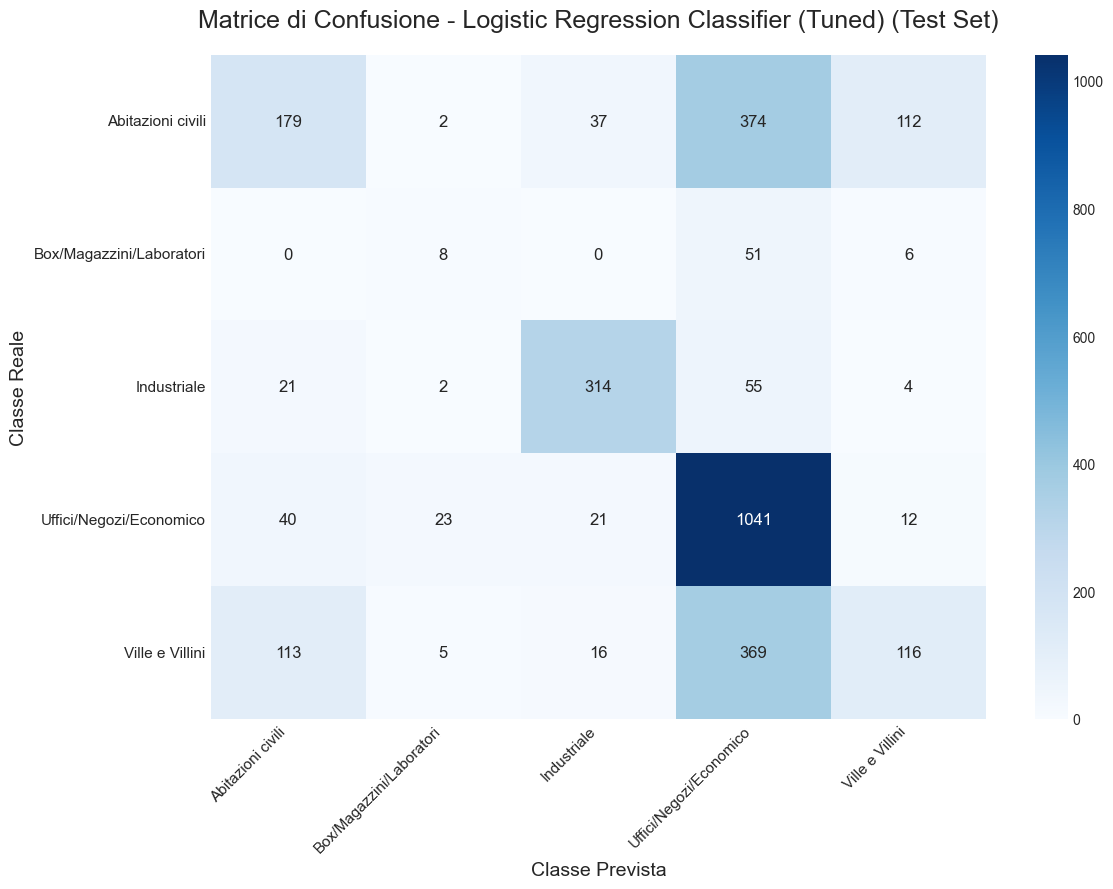


TUNING MODELLO RANDOM_FOREST (CON 5 CLASSI AGGREGATE)

--- Tuning Random Forest Classifier (Tuned) con GridSearchCV ---
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Migliori parametri trovati: {'classifier__class_weight': None, 'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Miglior punteggio CV (f1_weighted): 0.5087

--- Valutazione del miglior modello sul Test Set ---
Accuracy sul Test Set: 0.5690
Classification Report sul Test Set:
                           precision    recall  f1-score   support

       Abitazioni civili       0.51      0.31      0.39       704
Box/Magazzini/Laboratori       0.00      0.00      0.00        65
             Industriale       0.97      0.77      0.86       396
 Uffici/Negozi/Economico       0.53      0.95      0.68      1137
         Ville e Villini       0.43      0.09      0.15       619

                accuracy                           0.57      2921
               macro avg       0.49      0.42      0.41      292

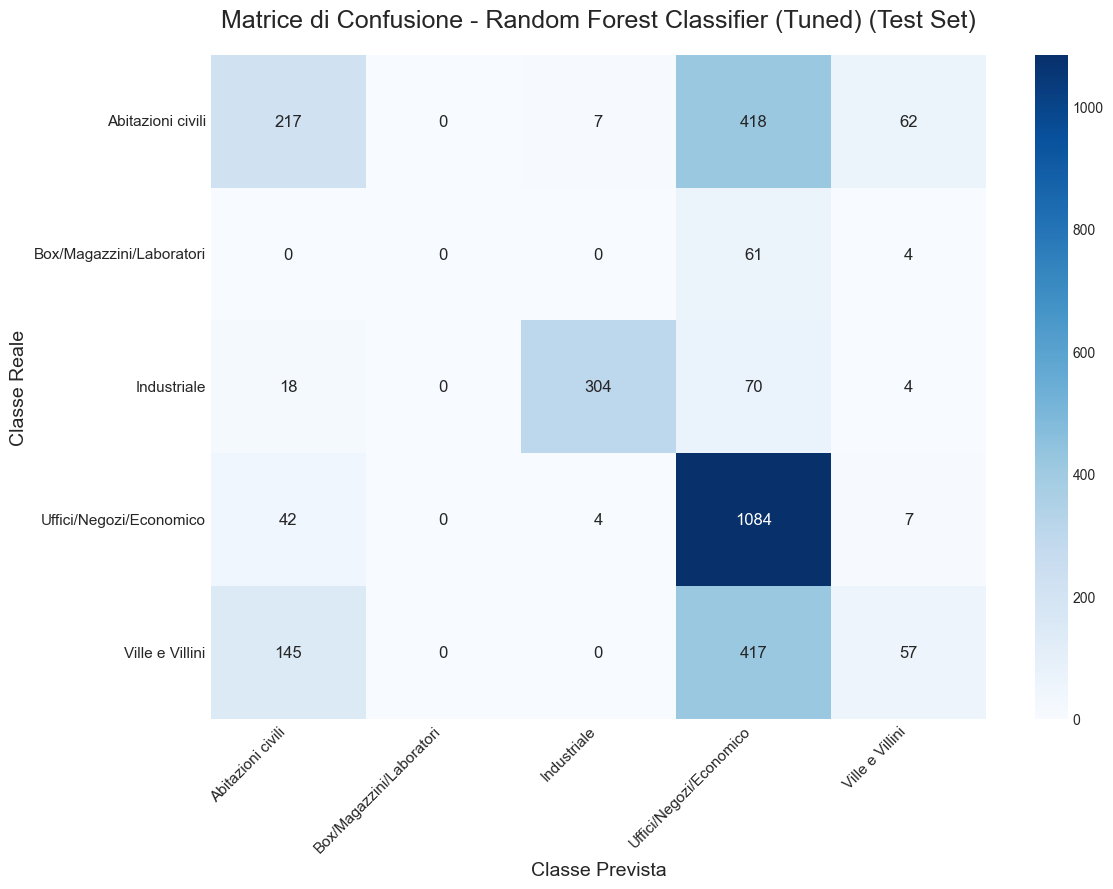


TUNING MODELLO LIGHTGBM (CON 5 CLASSI AGGREGATE)

--- Tuning LightGBM Classifier (Tuned) con GridSearchCV ---
Fitting 3 folds for each of 16 candidates, totalling 48 fits

Migliori parametri trovati: {'classifier__class_weight': None, 'classifier__learning_rate': 0.05, 'classifier__n_estimators': 100, 'classifier__num_leaves': 31}
Miglior punteggio CV (f1_weighted): 0.5460

--- Valutazione del miglior modello sul Test Set ---


c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy sul Test Set: 0.5782
Classification Report sul Test Set:
                           precision    recall  f1-score   support

       Abitazioni civili       0.54      0.32      0.40       704
Box/Magazzini/Laboratori       0.14      0.08      0.10        65
             Industriale       0.89      0.77      0.83       396
 Uffici/Negozi/Economico       0.56      0.94      0.70      1137
         Ville e Villini       0.39      0.14      0.20       619

                accuracy                           0.58      2921
               macro avg       0.50      0.45      0.45      2921
            weighted avg       0.55      0.58      0.53      2921



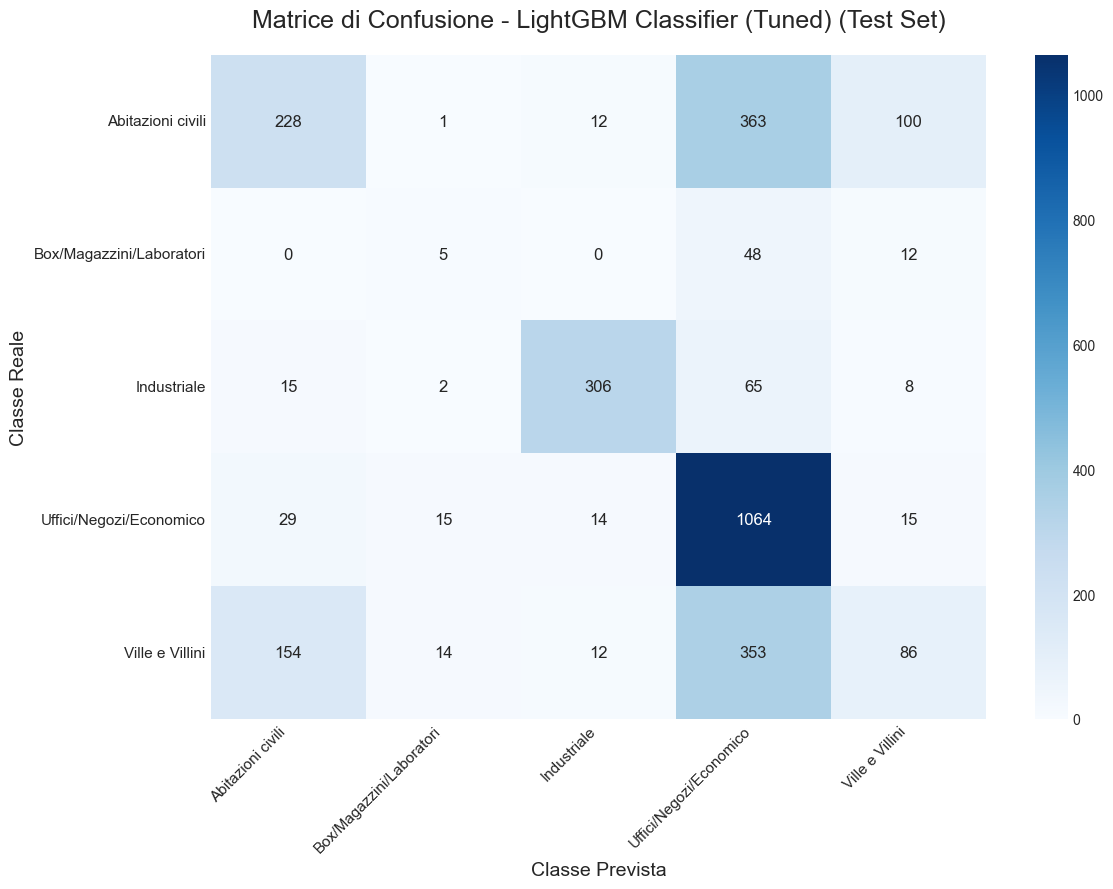

In [34]:
# --- RI-ADDESTRAMENTO MODELLI TUNED E PYTORCH ENHANCED SULLE CLASSI AGGREGATE ---
# =======================================================================
# 2. RI-ADDESTRAMENTO E TUNING DEI MODELLI SCIKIT-LEARN
# =======================================================================

# 2.1 Definizione delle griglie di parametri
param_grids_class = {
    'logistic_regression': {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l1', 'l2']
    },
    'random_forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'class_weight': ['balanced', None]
    },
    'lightgbm': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'num_leaves': [31, 40],
        'class_weight': ['balanced', None]
    }
}

# 2.2 Ciclo per avviare il tuning di ogni modello
for model_type, param_grid in param_grids_class.items():
    print("\n" + "="*60)
    print(f"TUNING MODELLO {model_type.upper()} (CON 5 CLASSI AGGREGATE)")
    print("="*60)
    
    train_tuned_classification_model(
        X_train=X_train_pers, 
        y_train=y_train_pers,
        X_test=X_test_pers,
        y_test=y_test_pers,
        numerical_cols=numerical_cols, 
        categorical_cols=categorical_cols, 
        text_col_name=text_col_name,
        model_type=model_type,
        param_grid=param_grid,
        cv=3,
        scoring='f1_weighted'
    )

### Riaddestramento rete neurale tuned


RI-ADDESTRAMENTO RETE NEURALE POTENZIATA (CON 5 CLASSI AGGREGATE)
Nuove classi per PyTorch: ['Abitazioni civili' 'Box/Magazzini/Laboratori' 'Industriale'
 'Uffici/Negozi/Economico' 'Ville e Villini']

--- Inizio Addestramento Rete Neurale Potenziata ---
Epoca 10/50, Loss: 0.8253
Epoca 20/50, Loss: 0.7967
Epoca 30/50, Loss: 0.7889
Epoca 40/50, Loss: 0.7801
Epoca 50/50, Loss: 0.7786

--- Valutazione Rete Neurale Potenziata ---

--- Rete Neurale Potenziata (5 Classi) ---
Accuracy: 0.5929
Classification Report:
                           precision    recall  f1-score   support

       Abitazioni civili       0.66      0.23      0.34       704
Box/Magazzini/Laboratori       0.62      0.15      0.25        65
             Industriale       0.83      0.81      0.82       396
 Uffici/Negozi/Economico       0.55      0.97      0.70      1137
         Ville e Villini       0.48      0.23      0.31       619

                accuracy                           0.59      2921
               macro 

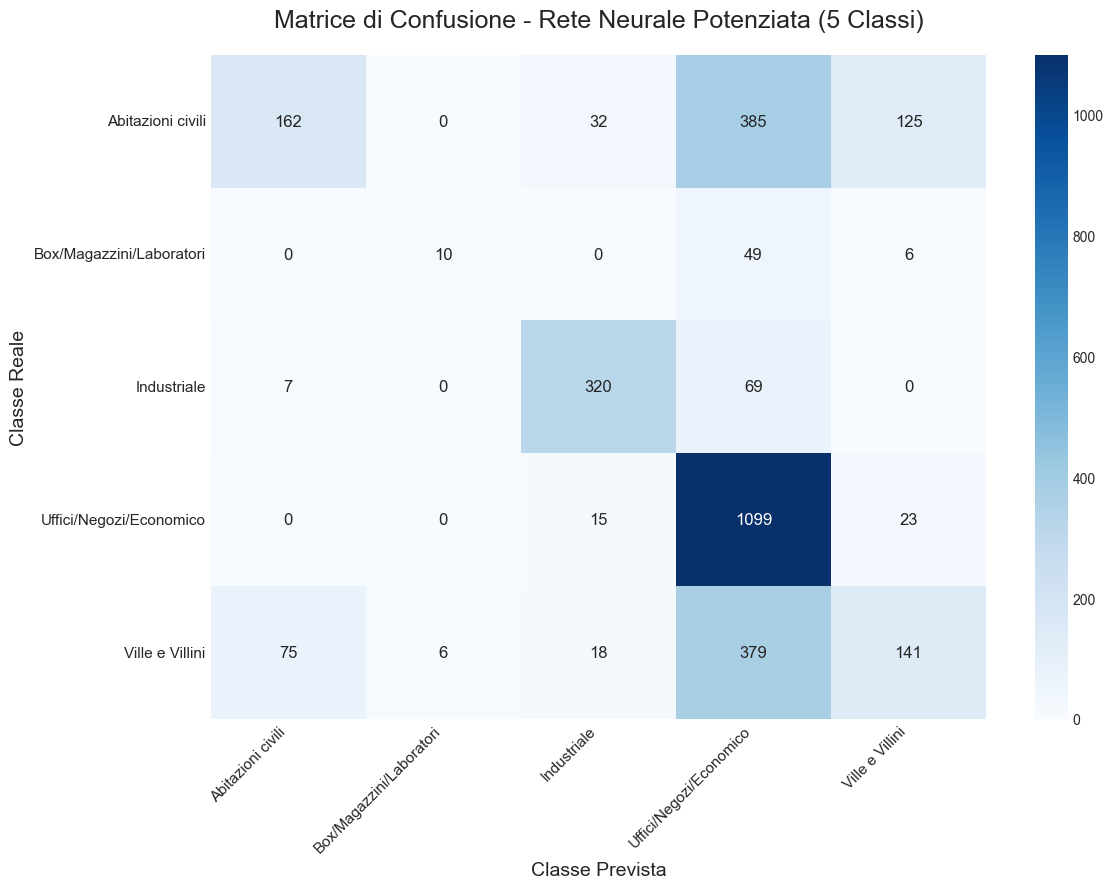

(0.59294762067785,
 '                          precision    recall  f1-score   support\n\n       Abitazioni civili       0.66      0.23      0.34       704\nBox/Magazzini/Laboratori       0.62      0.15      0.25        65\n             Industriale       0.83      0.81      0.82       396\n Uffici/Negozi/Economico       0.55      0.97      0.70      1137\n         Ville e Villini       0.48      0.23      0.31       619\n\n                accuracy                           0.59      2921\n               macro avg       0.63      0.48      0.48      2921\n            weighted avg       0.60      0.59      0.54      2921\n')

In [35]:
# =======================================================================
# 3. RI-ADDESTRAMENTO DELLA RETE NEURALE POTENZIATA (PYTORCH)
# =======================================================================
print("\n" + "="*60)
print("RI-ADDESTRAMENTO RETE NEURALE POTENZIATA (CON 5 CLASSI AGGREGATE)")
print("="*60)

# 3.1 Preprocessing dei dati
preprocessor_torch = create_preprocessor(numerical_cols, categorical_cols, text_col_name)
X_train_torch_pers = preprocessor_torch.fit_transform(X_train_pers)
X_test_torch_pers = preprocessor_torch.transform(X_test_pers)
input_size = X_train_torch_pers.shape[1]

# 3.2 Encoding delle etichette
label_encoder_pers = LabelEncoder()
y_train_enc_pers = label_encoder_pers.fit_transform(y_train_pers)
y_test_enc_pers = label_encoder_pers.transform(y_test_pers)
class_names_pers = label_encoder_pers.classes_
num_classes_pers = len(class_names_pers)
print(f"Nuove classi per PyTorch: {class_names_pers}")

# 3.3 Creazione Dataset e DataLoader
train_dataset_pers = TabularDataset(X_train_torch_pers, y_train_enc_pers, is_classification=True)
test_dataset_pers = TabularDataset(X_test_torch_pers, y_test_enc_pers, is_classification=True)
train_loader_pers = DataLoader(dataset=train_dataset_pers, batch_size=64, shuffle=True)
test_loader_pers = DataLoader(dataset=test_dataset_pers, batch_size=64, shuffle=False)

# 3.4 Inizializzazione e addestramento
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_nn_pers = ClassificationNN_v2(input_size=input_size, num_classes=num_classes_pers).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_nn_pers.parameters(), lr=0.001)

print("\n--- Inizio Addestramento Rete Neurale Potenziata ---")
for epoch in range(50):
    loss = train_model(model_nn_pers, train_loader_pers, loss_fn, optimizer, device)
    if (epoch + 1) % 10 == 0:
        print(f"Epoca {epoch+1}/50, Loss: {loss:.4f}")

# 3.5 Valutazione
print("\n--- Valutazione Rete Neurale Potenziata ---")
evaluate_classification(
    model_nn_pers, 
    test_loader_pers, 
    device,
    class_names=class_names_pers,
    model_name="Rete Neurale Potenziata (5 Classi)"
)

In [36]:
print(X_train_torch_pers.shape)

(8760, 215)


In [ ]:
import torch
import joblib

# 1. Salva i pesi del modello PyTorch addestrato
torch.save(model_nn_pers.state_dict(), 'pytorch_model_state.pth')

# 2. Salva l'oggetto preprocessor
joblib.dump(preprocessor_torch, 'preprocessor_torch.joblib')

# 3. Salva l'oggetto LabelEncoder
joblib.dump(label_encoder_pers, 'label_encoder_pers.joblib')

print("Artefatti del modello salvati con successo!")
print("File creati: 'pytorch_model_state.pth', 'preprocessor_torch.joblib', 'label_encoder_pers.joblib'")


# Ottieni la lista esatta delle colonne usate per l'addestramento
model_columns = X_train_pers.columns.tolist()

# Salva questa lista in un file. Questo è il nostro "contratto".
joblib.dump(model_columns, 'model_columns.joblib')

print("Contratto delle colonne del modello salvato con successo in 'model_columns.joblib'")
print(f"Il modello si aspetta {len(model_columns)} colonne.")

Artefatti del modello salvati con successo!
File creati: 'pytorch_model_state.pth', 'preprocessor_torch.joblib', 'label_encoder_pers.joblib'


## Geospatial Feature Engineering

In [38]:
print("--- Inizio Geospatial Feature Engineering ---")

# Assumiamo che 'gdf_geospaziale' sia il tuo GeoDataFrame con le geometrie
# e 'df_tabulare' quello con i dati OMI, come nelle celle precedenti.

# 1. Aggreghiamo le geometrie per avere una geometria unica per ogni zona OMI
if 'geometry' in gdf_geospaziale.columns:
    zone_geometrie = gdf_geospaziale.dissolve(by='zona')

    # 2. CALCOLO DELLE FEATURE GEOGRAFICHE
    # Assicuriamoci che il CRS sia proiettato
    # per calcolare area e distanza in metri/km (qui usiamo EPSG:32632 per l'Italia del nord)
    zone_geometrie_proj = zone_geometrie.to_crs("epsg:32632")

    zone_geometrie['area_km2'] = zone_geometrie_proj.geometry.area / 1_000_000
    
    # --- CORREZIONE QUI ---
    zone_geometrie['perimetro_km'] = zone_geometrie_proj.geometry.length / 1_000 # CORREZIONE: .length invece di .perimeter
    
    # Calcolo della compattezza (Polsby-Popper test)
    zone_geometrie['compattezza'] = (4 * np.pi * zone_geometrie['area_km2']) / (zone_geometrie['perimetro_km']**2)

    # Calcolo delle coordinate del centroide (in gradi decimali, CRS originale WGS84)
    zone_geometrie['centroid_lon'] = zone_geometrie.geometry.centroid.x
    zone_geometrie['centroid_lat'] = zone_geometrie.geometry.centroid.y
    
    # 3. CALCOLO DELLA DISTANZA DAL CENTRO DI VERONA
    # Coordinate approssimative dell'Arena di Verona
    centro_verona = Point(10.9940, 45.4388)
    
    centro_verona_gdf = gpd.GeoSeries([centro_verona], crs="epsg:4326").to_crs("epsg:32632")

    zone_geometrie['distanza_centro_km'] = zone_geometrie_proj.geometry.centroid.distance(centro_verona_gdf.iloc[0]) / 1_000

    print("Feature geospaziali create con successo:")
    print(zone_geometrie[['area_km2', 'perimetro_km', 'compattezza', 'centroid_lon', 'centroid_lat', 'distanza_centro_km']].head())

    # 4. UNIONE DELLE NUOVE FEATURE AL DATAFRAME PRINCIPALE
    zone_features = zone_geometrie.reset_index()
    
    if 'zona' not in df_tabulare.columns:
        df_tabulare['zona'] = df_tabulare['comune_descrizione_val'] + ' - Zona OMI ' + df_tabulare['zona_val']

    df_geospatial = pd.merge(df_tabulare, zone_features[['zona', 'area_km2', 'perimetro_km', 'compattezza', 'centroid_lon', 'centroid_lat', 'distanza_centro_km']], on='zona', how='left')

    print(f"\nDataFrame arricchito creato. Nuova shape: {df_geospatial.shape}")
else:
    print("Errore: 'gdf_geospaziale' non trovato.")

--- Inizio Geospatial Feature Engineering ---
Feature geospaziali create con successo:
                                  area_km2  perimetro_km  compattezza  \
zona                                                                    
AFFI - Zona OMI B1                5.117342     14.966888     0.287072   
AFFI - Zona OMI R1                2.850101      9.149254     0.427857   
AFFI - Zona OMI R2                1.943728      7.751300     0.406534   
ALBAREDO D39;ADIGE - Zona OMI B1  4.814553     10.895651     0.509635   
ALBAREDO D39;ADIGE - Zona OMI E1  3.977529     16.122669     0.192287   

                                  centroid_lon  centroid_lat  \
zona                                                           
AFFI - Zona OMI B1                   10.781499     45.552921   
AFFI - Zona OMI R1                   10.780825     45.566895   
AFFI - Zona OMI R2                   10.757722     45.552295   
ALBAREDO D39;ADIGE - Zona OMI B1     11.276666     45.318051   
ALBAREDO D39;ADIG

C:\Users\emmal\AppData\Local\Temp\ipykernel_14180\1797977599.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zone_geometrie['centroid_lon'] = zone_geometrie.geometry.centroid.x
C:\Users\emmal\AppData\Local\Temp\ipykernel_14180\1797977599.py:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zone_geometrie['centroid_lat'] = zone_geometrie.geometry.centroid.y


#### Ri-addestramento dei Modelli con le Nuove Feature

In [39]:


# Il DataFrame di partenza è 'df_geospatial' creato nella cella precedente.
df = df_geospatial.copy()

# 1. FEATURE ENGINEERING E CONSOLIDAMENTO COLONNE
# Questo blocco deve essere eseguito PRIMA di definire le liste di feature.
print("Eseguo Feature Engineering e consolidamento colonne...")

# Creazione target e feature numeriche/categoriche
df['prezzo_medio_mq'] = (df['compr_min'] + df['compr_max']) / 2
if 'target_class' not in df.columns:
    df = df.rename(columns={'descr_tipologia': 'target_class'})

def semestre_a_numero(s):
    try:
        anno, sem = s.split('_')
        return float(anno) + (0.5 if sem == '2' else 0.0)
    except:
        return np.nan
df['periodo_num'] = df['semestre'].apply(semestre_a_numero)

# Consolidamento delle colonne _val e _zone
for col_name in ['fascia', 'comune_descrizione', 'stato_prev', 'comune_istat', 'comune_cat', 'comune_amm']:
    col_val = f'{col_name}_val'
    col_zone = f'{col_name}_zone'
    if col_val in df.columns and col_zone in df.columns:
        df[col_name] = df[col_val].fillna(df[col_zone])
        df.drop([col_val, col_zone], axis=1, inplace=True)

# Aggregazione delle classi
mapping_tipologie_personalizzato =  {
    'Abitazioni civili': 'Abitazioni civili',  # Invariato
    'Ville e Villini': 'Ville e Villini',      # Invariato
    
    'Uffici': 'Uffici/Negozi/Economico',
    'Negozi': 'Uffici/Negozi/Economico',
    'Abitazioni di tipo economico': 'Uffici/Negozi/Economico',
    
    'Capannoni tipici': 'Industriale',
    'Capannoni industriali': 'Industriale',
    
    'Box': 'Box/Magazzini/Laboratori',
    'Magazzini': 'Box/Magazzini/Laboratori',
    'Laboratori': 'Box/Magazzini/Laboratori'
}
df['target_class_agg'] = df['target_class'].map(mapping_tipologie_personalizzato)

# 2. PULIZIA E CREAZIONE DEI DATAFRAME FINALI
# Ora che tutte le colonne sono state create, possiamo pulire i dati
df_reg_geo = df.dropna(subset=['prezzo_medio_mq']).copy()
df_class_geo = df.dropna(subset=['target_class_agg']).copy()

print("Pulizia e aggregazione completate.")

# 3. DEFINIZIONE DELLE FEATURE (ORA LE COLONNE ESISTONO)
numerical_cols_geo = [
    'periodo_num',
    'area_km2',
    'perimetro_km',
    'compattezza',
    'centroid_lon',
    'centroid_lat',
    'distanza_centro_km'
]
categorical_cols = [
    'fascia',
    'stato',
    'comune_descrizione',
    'descr_tip_prev',
    'sup_nl_loc'
]
text_col_name = 'zona_descr'

features_geo = numerical_cols_geo + categorical_cols + [text_col_name]

# 4. SUDDIVISIONE DEI DATI CON LE NUOVE FEATURE
# Per la Regressione
X_reg_geo = df_reg_geo[features_geo]
y_reg_geo = df_reg_geo['prezzo_medio_mq']
X_train_reg_geo, X_test_reg_geo, y_train_reg_geo, y_test_reg_geo = train_test_split(
    X_reg_geo, y_reg_geo, test_size=0.25, random_state=42
)

# Per la Classificazione
X_class_geo = df_class_geo[features_geo]
y_class_geo = df_class_geo['target_class_agg']
X_train_class_geo, X_test_class_geo, y_train_class_geo, y_test_class_geo = train_test_split(
    X_class_geo, y_class_geo, test_size=0.25, random_state=42, stratify=y_class_geo
)

print("\nDati arricchiti con feature geospaziali e pronti per l'addestramento.")

Eseguo Feature Engineering e consolidamento colonne...
Pulizia e aggregazione completate.

Dati arricchiti con feature geospaziali e pronti per l'addestramento.


## Modelli con features geospaziali



 ESECUZIONE MODELLI SCIKIT-LEARN BASE (con dati geo)

--- MODELLI DI REGRESSIONE ---

--- Linear Regression ---
Mean Squared Error (MSE): 133952.6655
R2 Score: 0.6475

--- Random Forest Regressor ---
Mean Squared Error (MSE): 141386.7963
R2 Score: 0.6279


c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



--- LightGBM Regressor ---
Mean Squared Error (MSE): 97354.0381
R2 Score: 0.7438

--- MODELLI DI CLASSIFICAZIONE ---

--- Logistic Regression Classifier ---
Accuracy: 0.2643
Classification Report:
                           precision    recall  f1-score   support

       Abitazioni civili       0.22      0.17      0.19       704
Box/Magazzini/Laboratori       0.03      0.18      0.04        65
             Industriale       0.14      0.10      0.12       396
 Uffici/Negozi/Economico       0.40      0.46      0.43      1137
         Ville e Villini       0.24      0.12      0.16       619

                accuracy                           0.26      2921
               macro avg       0.21      0.21      0.19      2921
            weighted avg       0.28      0.26      0.26      2921



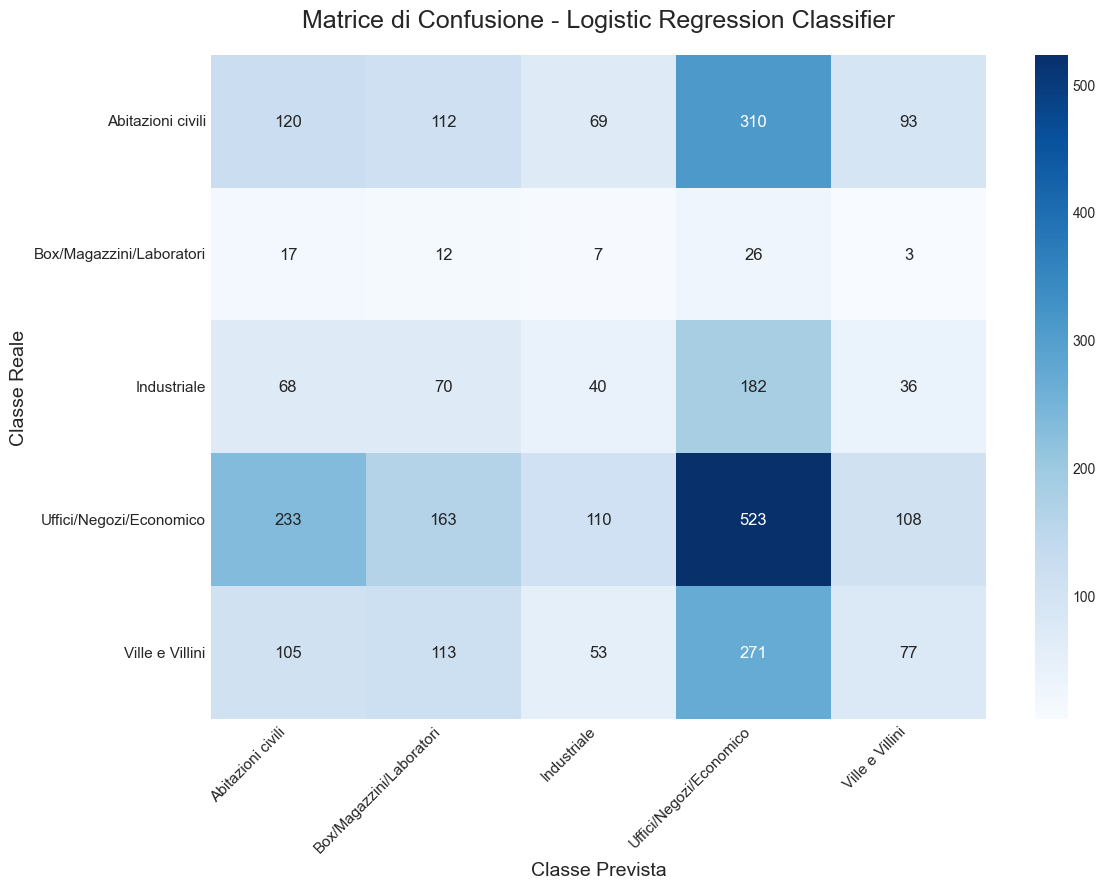


--- Random Forest Classifier ---
Accuracy: 0.2503
Classification Report:
                           precision    recall  f1-score   support

       Abitazioni civili       0.23      0.22      0.22       704
Box/Magazzini/Laboratori       0.02      0.05      0.03        65
             Industriale       0.14      0.18      0.16       396
 Uffici/Negozi/Economico       0.38      0.32      0.35      1137
         Ville e Villini       0.22      0.23      0.23       619

                accuracy                           0.25      2921
               macro avg       0.20      0.20      0.20      2921
            weighted avg       0.27      0.25      0.26      2921



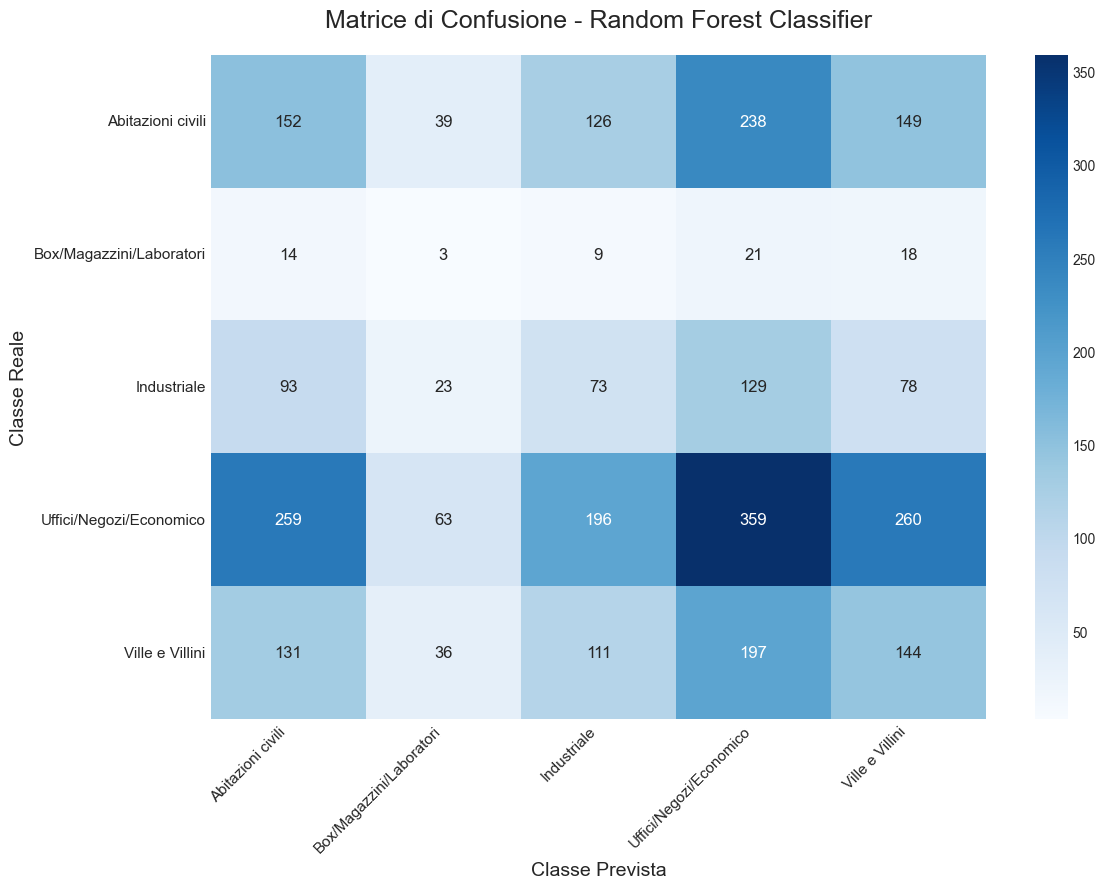

c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- LightGBM Classifier ---
Accuracy: 0.3369
Classification Report:
                           precision    recall  f1-score   support

       Abitazioni civili       0.21      0.13      0.16       704
Box/Magazzini/Laboratori       0.00      0.00      0.00        65
             Industriale       0.16      0.03      0.05       396
 Uffici/Negozi/Economico       0.39      0.72      0.51      1137
         Ville e Villini       0.21      0.11      0.14       619

                accuracy                           0.34      2921
               macro avg       0.19      0.20      0.17      2921
            weighted avg       0.27      0.34      0.27      2921



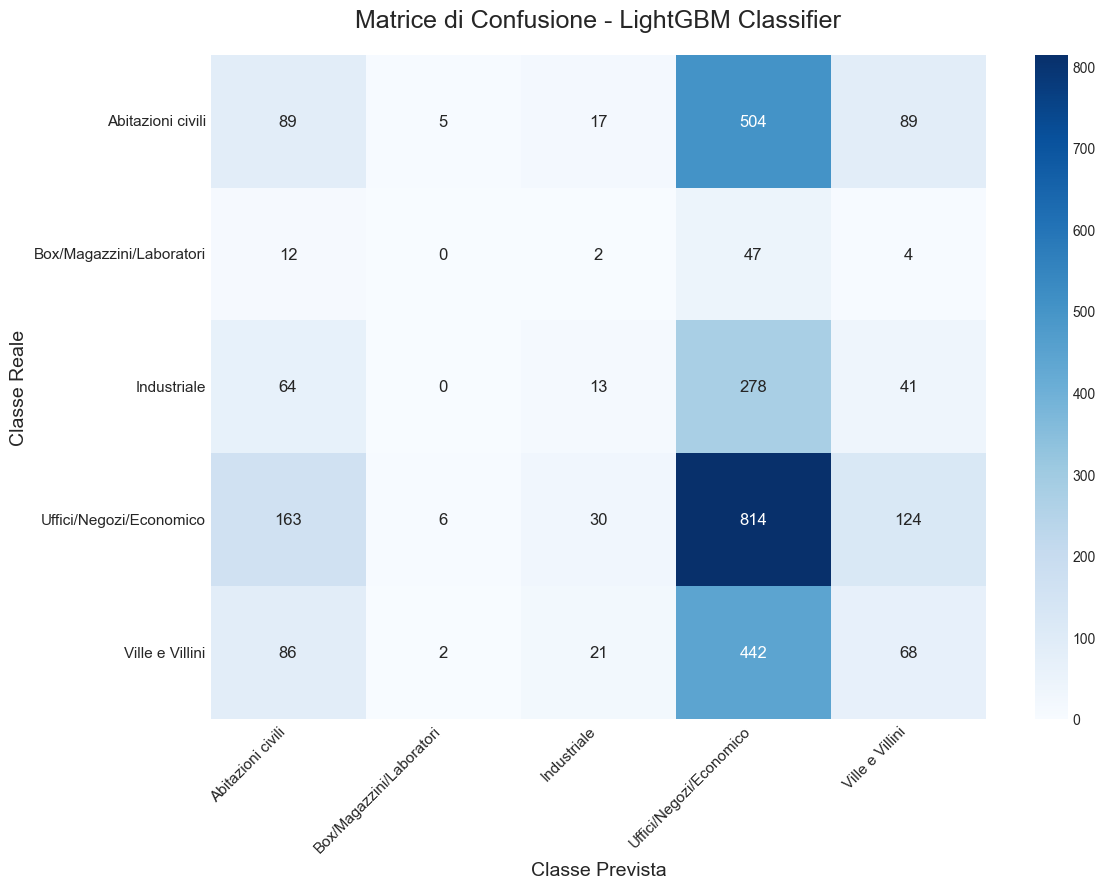


 ESECUZIONE MODELLI SCIKIT-LEARN CON TUNING (con dati geo)

--- MODELLI DI REGRESSIONE (TUNED) ---

--- Tuning Ridge Regression (Tuned) con GridSearchCV ---
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Migliori parametri trovati: {'regressor__alpha': 0.1}
Miglior punteggio CV (r2): 0.6600

--- Performance del miglior modello sul Test Set ---
Mean Squared Error (MSE): 133831.7048
R2 Score: 0.6478

--- Tuning Random Forest Regressor (Tuned) con GridSearchCV ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Migliori parametri trovati: {'regressor__max_depth': 10, 'regressor__n_estimators': 200}
Miglior punteggio CV (r2): 0.7176

--- Performance del miglior modello sul Test Set ---
Mean Squared Error (MSE): 106895.7486
R2 Score: 0.7187

--- Tuning LightGBM Regressor (Tuned) con GridSearchCV ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Migliori parametri trovati: {'regressor__learning_rate': 0.05, 'regressor__n_estimators': 250}
Miglior punte

c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



--- MODELLI DI CLASSIFICAZIONE (TUNED) ---

--- Tuning Logistic Regression Classifier (Tuned) con GridSearchCV ---
Fitting 5 folds for each of 3 candidates, totalling 15 fits

Migliori parametri trovati: {'classifier__C': 10.0}
Miglior punteggio CV (f1_weighted): 0.2593

--- Valutazione del miglior modello sul Test Set ---
Accuracy sul Test Set: 0.3598
Classification Report sul Test Set:
                           precision    recall  f1-score   support

       Abitazioni civili       0.17      0.06      0.09       704
Box/Magazzini/Laboratori       0.00      0.00      0.00        65
             Industriale       0.38      0.01      0.01       396
 Uffici/Negozi/Economico       0.38      0.86      0.53      1137
         Ville e Villini       0.21      0.03      0.06       619

                accuracy                           0.36      2921
               macro avg       0.23      0.19      0.14      2921
            weighted avg       0.29      0.36      0.24      2921



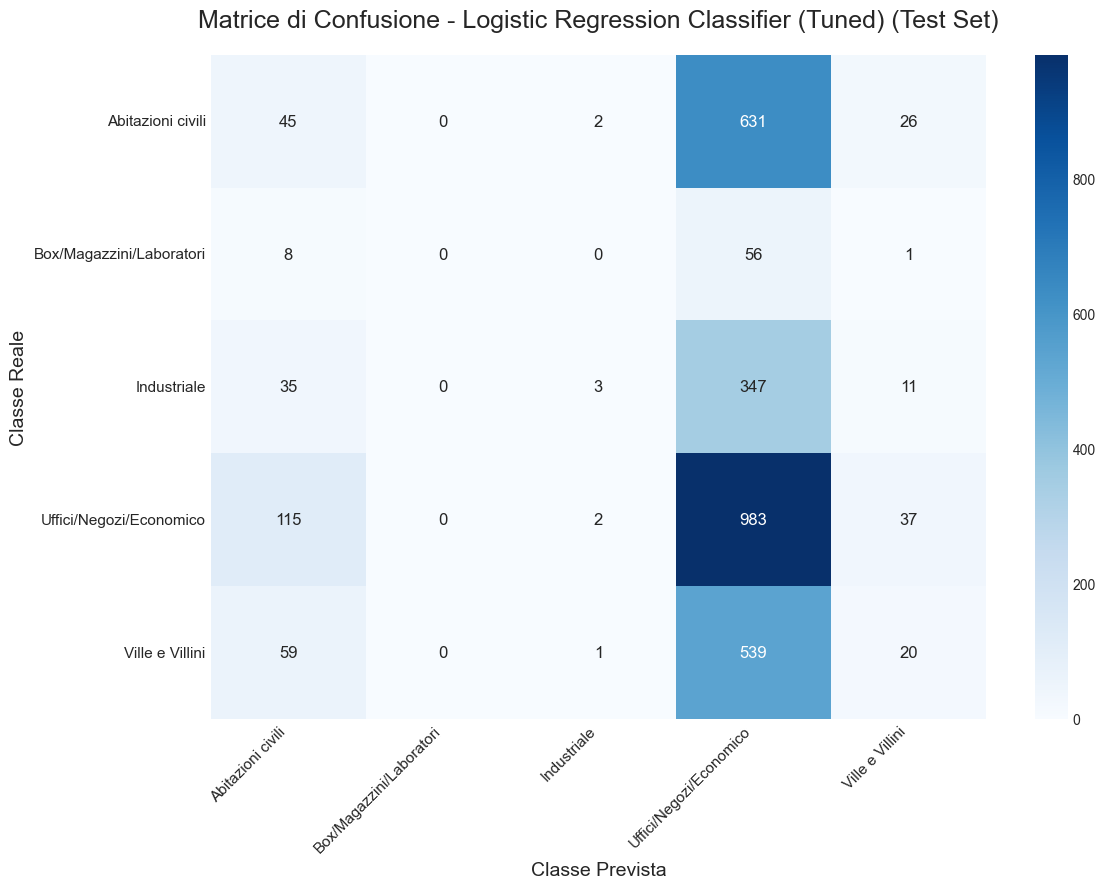


--- Tuning Random Forest Classifier (Tuned) con GridSearchCV ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Migliori parametri trovati: {'classifier__max_depth': 20, 'classifier__n_estimators': 200}
Miglior punteggio CV (f1_weighted): 0.2814

--- Valutazione del miglior modello sul Test Set ---
Accuracy sul Test Set: 0.3256
Classification Report sul Test Set:
                           precision    recall  f1-score   support

       Abitazioni civili       0.20      0.13      0.16       704
Box/Magazzini/Laboratori       0.00      0.00      0.00        65
             Industriale       0.20      0.07      0.11       396
 Uffici/Negozi/Economico       0.39      0.66      0.49      1137
         Ville e Villini       0.21      0.13      0.16       619

                accuracy                           0.33      2921
               macro avg       0.20      0.20      0.18      2921
            weighted avg       0.27      0.33      0.28      2921



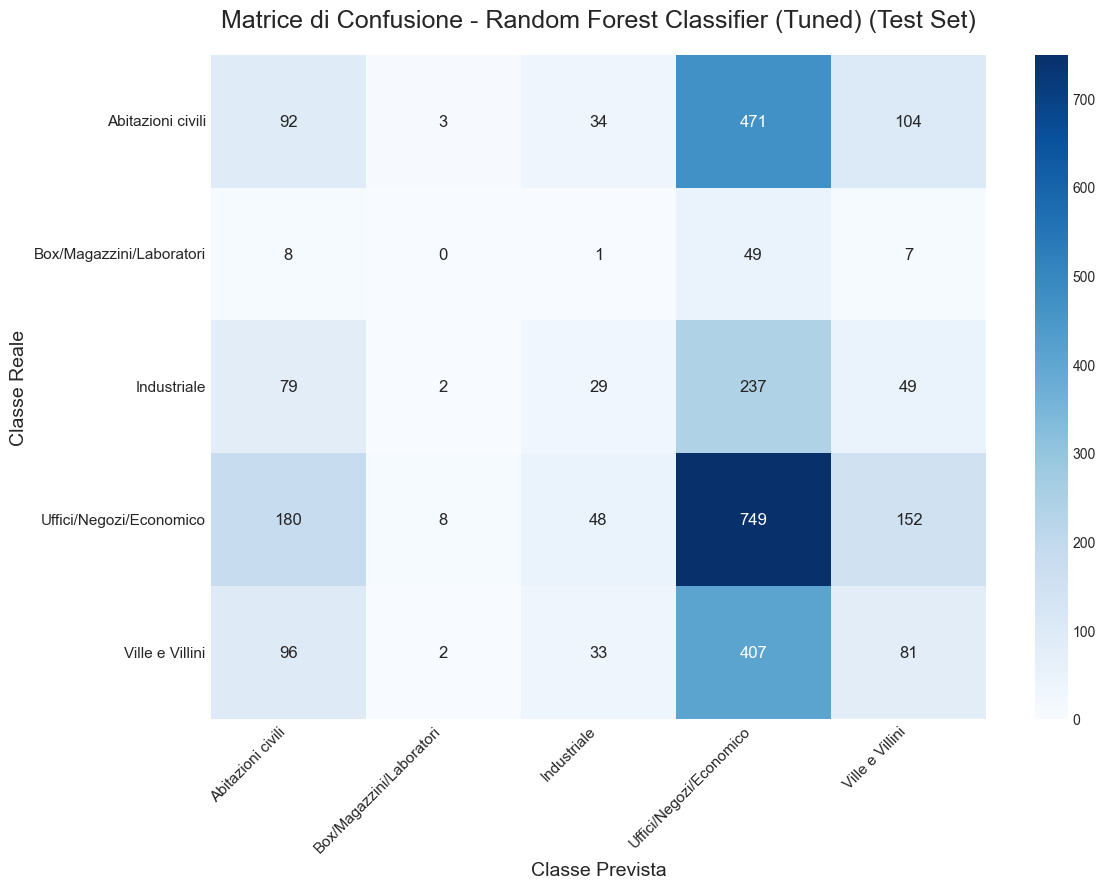


--- Tuning LightGBM Classifier (Tuned) con GridSearchCV ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Migliori parametri trovati: {'classifier__learning_rate': 0.05, 'classifier__n_estimators': 250}
Miglior punteggio CV (f1_weighted): 0.2721

--- Valutazione del miglior modello sul Test Set ---


c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy sul Test Set: 0.3259
Classification Report sul Test Set:
                           precision    recall  f1-score   support

       Abitazioni civili       0.20      0.13      0.16       704
Box/Magazzini/Laboratori       0.00      0.00      0.00        65
             Industriale       0.16      0.05      0.07       396
 Uffici/Negozi/Economico       0.38      0.68      0.49      1137
         Ville e Villini       0.22      0.12      0.15       619

                accuracy                           0.33      2921
               macro avg       0.19      0.19      0.17      2921
            weighted avg       0.27      0.33      0.27      2921



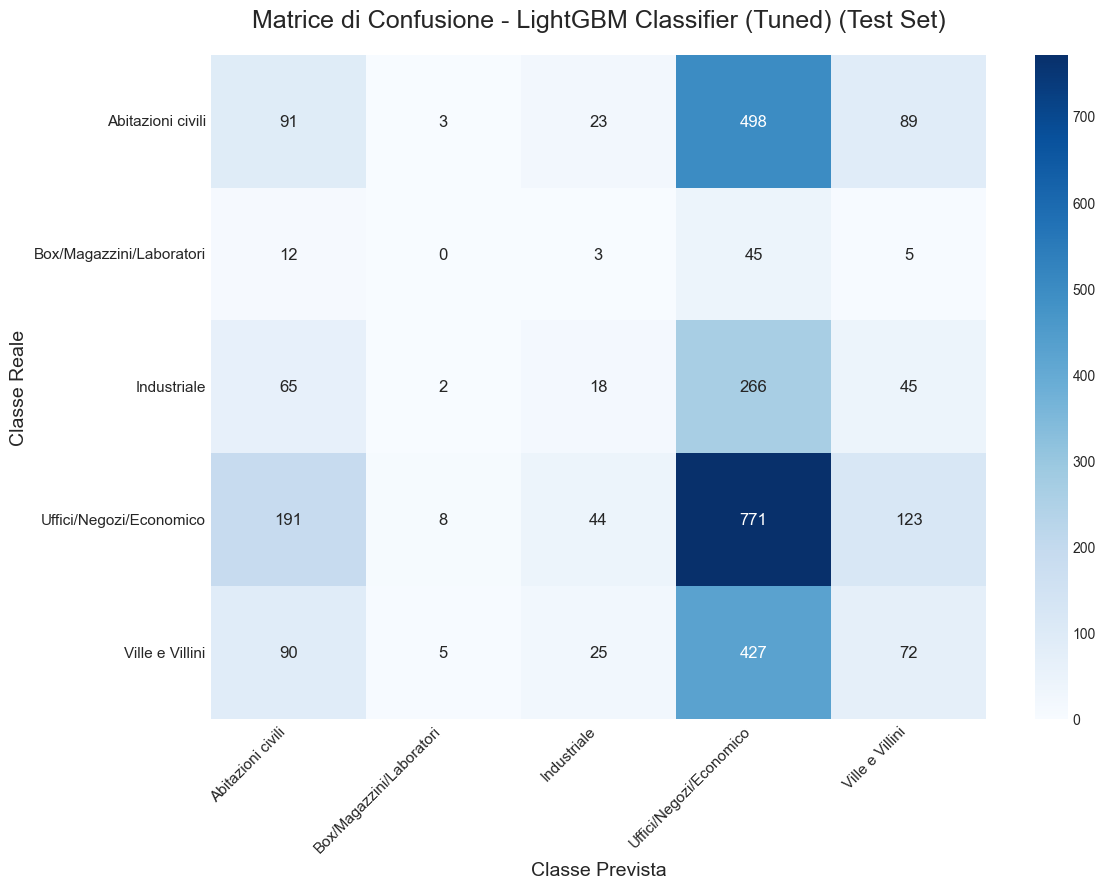


 ESECUZIONE MODELLI PYTORCH (con dati geo)
Using device: cpu

--- MODELLI PYTORCH DI REGRESSIONE ---

Training RegressionNN Base...


c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([56])) that is different to the input size (torch.Size([56, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 5/20, Loss: 429448.6629
Epoch 10/20, Loss: 429066.7548
Epoch 15/20, Loss: 428432.8953
Epoch 20/20, Loss: 428544.4325

Evaluating RegressionNN Base on test data...
MSE: 373912.4062, R2 Score: 0.0160

Training RegressionNN Enhanced...


c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\emmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([56])) that is different to the input size (torch.Size([56, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 5/20, Loss: 427691.1729
Epoch 10/20, Loss: 424813.2795
Epoch 15/20, Loss: 423828.5919
Epoch 20/20, Loss: 423356.8760

Evaluating RegressionNN Enhanced on test data...
MSE: 383794.5625, R2 Score: -0.0100

--- MODELLI PYTORCH DI CLASSIFICAZIONE ---

Training ClassificationNN Base...
Epoch 5/20, Loss: 1.3923
Epoch 10/20, Loss: 1.3752
Epoch 15/20, Loss: 1.3563
Epoch 20/20, Loss: 1.3431

Evaluating ClassificationNN Base on test data...

--- ClassificationNN Base ---
Accuracy: 0.3803
Classification Report:
                           precision    recall  f1-score   support

       Abitazioni civili       0.24      0.06      0.10       704
Box/Magazzini/Laboratori       0.00      0.00      0.00        65
             Industriale       0.50      0.01      0.01       396
 Uffici/Negozi/Economico       0.39      0.91      0.55      1137
         Ville e Villini       0.26      0.04      0.07       619

                accuracy                           0.38      2921
               macro av

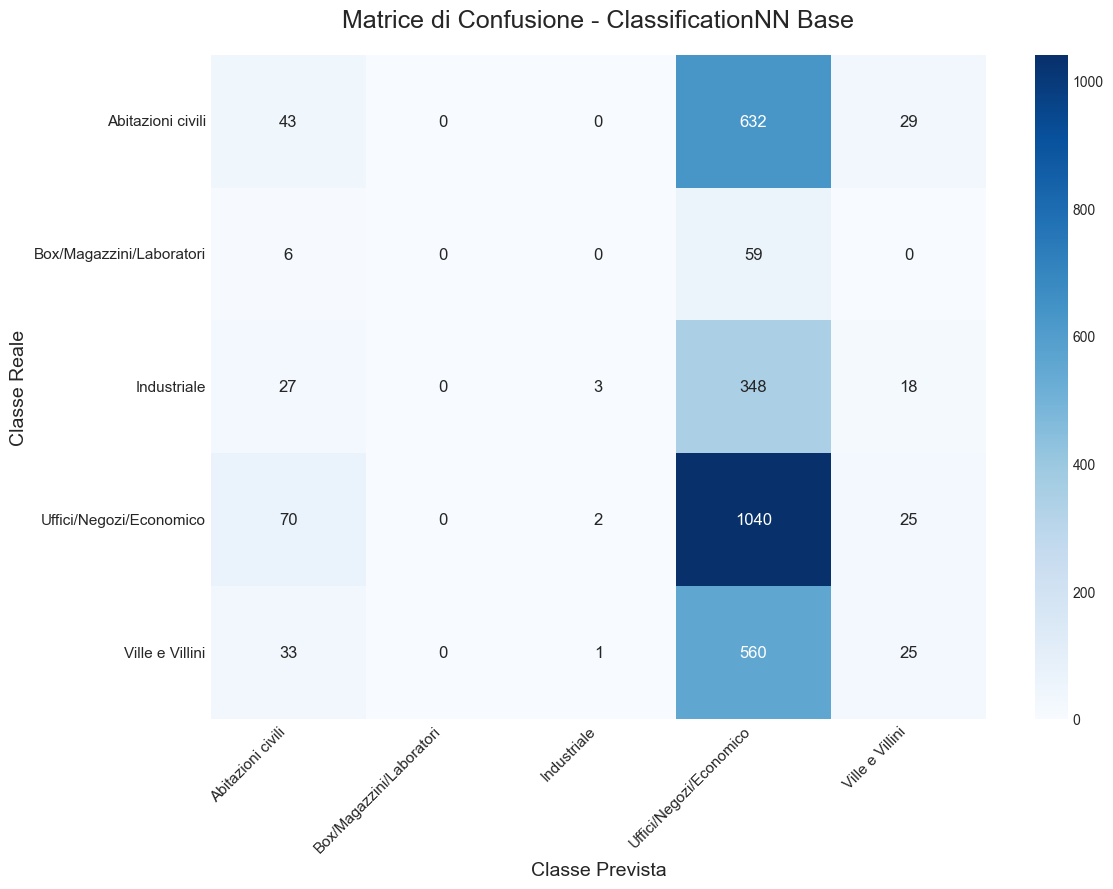


Training ClassificationNN Enhanced...
Epoch 5/20, Loss: 1.3902
Epoch 10/20, Loss: 1.3775
Epoch 15/20, Loss: 1.3633
Epoch 20/20, Loss: 1.3548

Evaluating ClassificationNN Enhanced on test data...

--- ClassificationNN Enhanced ---
Accuracy: 0.3667
Classification Report:
                           precision    recall  f1-score   support

       Abitazioni civili       0.23      0.11      0.15       704
Box/Magazzini/Laboratori       0.00      0.00      0.00        65
             Industriale       0.20      0.00      0.00       396
 Uffici/Negozi/Economico       0.39      0.84      0.53      1137
         Ville e Villini       0.26      0.06      0.10       619

                accuracy                           0.37      2921
               macro avg       0.22      0.20      0.16      2921
            weighted avg       0.29      0.37      0.26      2921



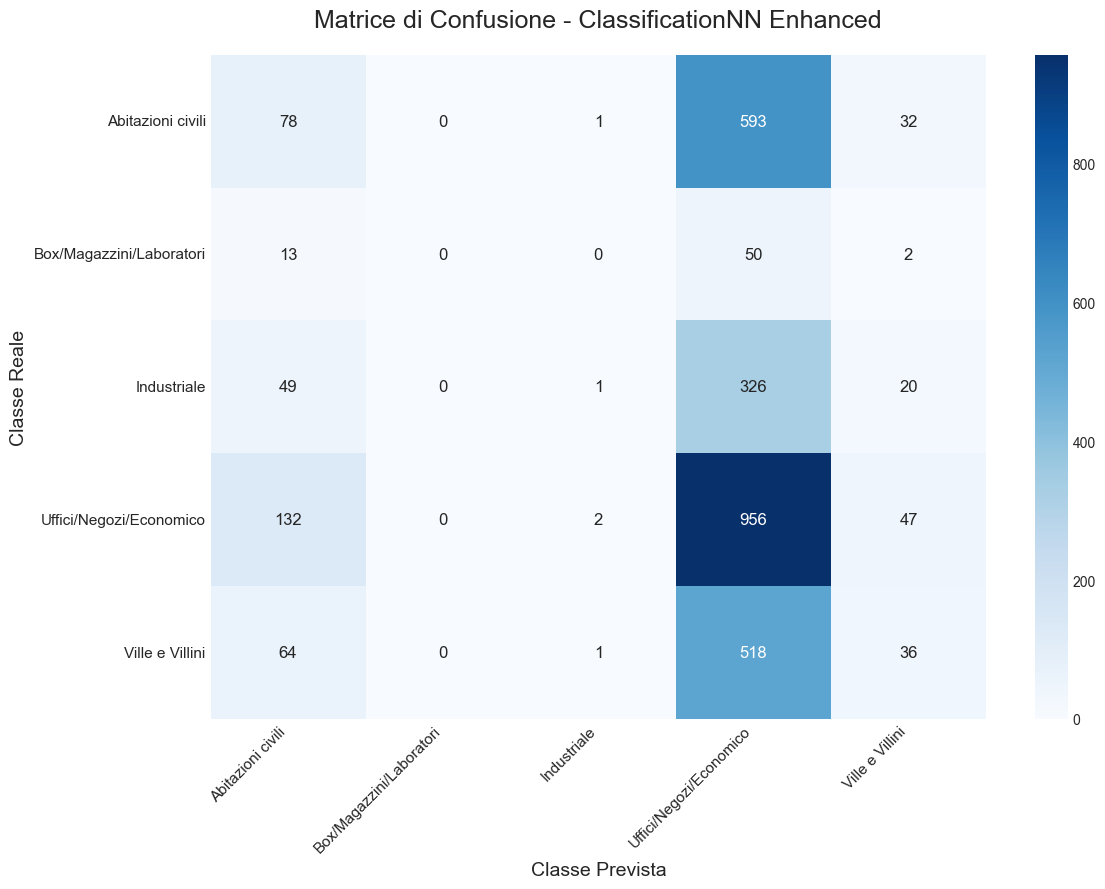

In [40]:
# --- ESECUZIONE DI TUTTE LE ANALISI GEOSPAZIALI ---
# Questa cella chiama le funzioni dallo script 'geospatial_models.py'
# per addestrare e valutare tutti i tipi di modelli sui dati arricchiti.

import geospatial_models as gm

# 1. PREPARAZIONE DEGLI INPUT
# Le liste di feature (numerical_cols_geo, etc.) e i dati (X_train_reg_geo, etc.)
# sono già stati definiti nelle celle precedenti.

# Raggruppiamo i target in un dizionario, come richiesto dalle nuove funzioni
y_train_geo = {'reg': y_train_reg_geo, 'class': y_train_class_geo}
y_test_geo = {'reg': y_test_reg_geo, 'class': y_test_class_geo}


# --- CORREZIONE QUI ---
# Definiamo la griglia dei parametri SENZA il prefisso 'regressor__' o 'classifier__'.
# Lo script si occuperà di aggiungerlo automaticamente.
param_grids = {
    'reg': {
        'ridge': {'alpha': [0.1, 1.0, 10.0]},  # CORRETTO
        'random_forest': {'n_estimators': [100, 200], 'max_depth': [10, 20]}, # CORRETTO
        'lightgbm': {'n_estimators': [150, 250], 'learning_rate': [0.01, 0.05]} # CORRETTO
    },
    'class': {
        'logistic_regression': {'C': [0.1, 1.0, 10.0]}, # CORRETTO
        'random_forest': {'n_estimators': [100, 200], 'max_depth': [10, 20]}, # CORRETTO
        'lightgbm': {'n_estimators': [150, 250], 'learning_rate': [0.01, 0.05]} # CORRETTO
    }
}
# --- FINE CORREZIONE ---


# 2. ESECUZIONE DELLE ANALISI

# --- A) Modelli Scikit-Learn Base ---
gm.run_sklearn_base_analysis(
    X_train=X_train_reg_geo,
    y_train=y_train_geo,
    X_test=X_test_reg_geo,
    y_test=y_test_geo,
    numerical_cols=numerical_cols_geo,
    categorical_cols=categorical_cols,
    text_col=text_col_name
)

# --- B) Modelli Scikit-Learn con Tuning ---
gm.run_sklearn_tuned_analysis(
    X_train=X_train_reg_geo,
    y_train=y_train_geo,
    X_test=X_test_reg_geo,
    y_test=y_test_geo,
    numerical_cols=numerical_cols_geo,
    categorical_cols=categorical_cols,
    text_col=text_col_name,
    param_grids=param_grids
)

# --- C) Modelli PyTorch ---
gm.run_pytorch_analysis(
    X_train=X_train_reg_geo,
    y_train=y_train_geo,
    X_test=X_test_reg_geo,
    y_test=y_test_geo,
    numerical_cols=numerical_cols_geo,
    categorical_cols=categorical_cols,
    text_col=text_col_name,
    epochs=20 # Puoi modificare il numero di epoche
)